# March Madness Machine Learning Project 
#### never lose your family braket challenge to your aunt who knows nothing about basketball ever again 
## James Griffin, Noah Brown 
### Brigham Young University - Machine Learning Project

###### special thanks to Dr Emily Evans and Nelson Griffiths 

In [1]:
# Importing LOTS of stuff 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#from online suggestions I was reading 
from string import ascii_letters
import seaborn as sns
import statsmodels.api as sm # for linear regression, found it on some article 

# to solve problems that I am encounterinbg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #plotting for visualization purposes of story telling 
import numpy as np

#from tqdm import tqdm

import datetime
import gc
import numpy as np
import os
import operator
import pandas as pd
#from tqdm import tqdm
import numpy as np
import seaborn as sns
sns.set_palette(sns.color_palette('hls', 7))

from statistics import mean

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import describe
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.model_selection import KFold, RepeatedKFold, GroupKFold
import random 
from random import sample

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV



You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Read In data 

In [2]:
# teams that could make the tournament all D1 teams 

teams = pd.read_csv("Teams.csv")
teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2019
1,1102,Air Force,1985,2019
2,1103,Akron,1985,2019
3,1104,Alabama,1985,2019
4,1105,Alabama A&M,2000,2019


In [3]:
# data that we created with the seeds of all teams in tournaments since 2003 ranked from 1-64. 
# we do not rank the play in teams that lose, they are not part of the field of 64 and this we do not take into 
#account the losers of the play in games.  We back up this assumption because you are not requiered to pick them in 
#the ESPN bracket challenge, which to participate, you don't have to submit until before the first round begins 
# on day 136, which is always a Thursday. 

power_seeds = pd.read_csv("PowerSeeds.csv")


power_seeds.tail()

,Season,PowerSeed,TeamName
955,2009,60,Robert Morris
956,2009,61,Chattanooga
957,2009,62,Radford
958,2009,63,ETSU
959,2009,64,Morehead St


In [4]:
# Detailed in game statistics since 2003 

tourney_deets = pd.read_csv("NCAATourneyDetailedResults.csv")
tourney_deets.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [5]:
# details of the regular season - same basic structure, except they take into account who was home 

reg_deets = pd.read_csv("RegularSeasonDetailedResults.csv")
reg_deets.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [6]:
# basic tournament details, who won and lost, score 

tourney_compact_deets =  pd.read_csv("NCAATourneyCompactResults.csv")
tourney_compact_deets.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [7]:
# teams seeding and region since 1985 

tourney_seeds = pd.read_csv("NCAATourneySeeds.csv")
tourney_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


Ok a few obsticals right off the bat, WTeamID and LteamID are the foreign keys to our teams table. This reminds me of sql how that will be a primary key and the W/LTeamID will be the foreign key. We'll connect these through the pandas pd.merge command 

In [8]:
#getting team names for the teams that made the tournament 

tourney_teams = pd.merge(teams, tourney_deets, left_on = "TeamID", right_on = "WTeamID")

tourney_teams = tourney_teams.drop(axis = 1, columns = "FirstD1Season")
tourney_teams = tourney_teams.drop(axis = 1, columns = "LastD1Season")

tourney_teams.head()

,TeamID,TeamName,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,1104,Alabama,2004,136,1104,65,1356,64,N,0,...,22,4,5,10,20,15,10,4,1,14
1,1104,Alabama,2004,138,1104,70,1390,67,N,0,...,24,8,11,22,27,12,12,2,0,31
2,1104,Alabama,2004,143,1104,80,1393,71,N,0,...,14,14,20,16,19,12,18,5,4,20
3,1104,Alabama,2006,136,1104,90,1266,85,N,0,...,22,14,19,13,15,13,12,9,4,22
4,1104,Alabama,2018,136,1104,86,1439,83,N,0,...,18,14,20,10,12,14,14,7,1,22


In [9]:
#for loosing team 

tourney_teams =  pd.merge(teams, tourney_teams, left_on = "TeamID", right_on = "LTeamID")

tourney_teams = tourney_teams.drop(axis = 1, columns = "FirstD1Season")
tourney_teams = tourney_teams.drop(axis = 1, columns = "LastD1Season")

tourney_teams.head()

,TeamID_x,TeamName_x,TeamID_y,TeamName_y,Season,DayNum,WTeamID,WScore,LTeamID,LScore,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,1102,Air Force,1228,Illinois,2006,136,1228,78,1102,69,...,27,14,18,1,14,15,11,7,1,13
1,1102,Air Force,1314,North Carolina,2004,136,1314,63,1102,52,...,25,10,13,2,19,15,16,7,2,15
2,1103,Akron,1211,Gonzaga,2009,136,1211,77,1103,64,...,23,12,18,11,15,15,8,0,1,23
3,1103,Akron,1323,Notre Dame,2011,137,1323,69,1103,56,...,21,3,6,8,24,10,8,6,4,21
4,1103,Akron,1433,VA Commonwealth,2013,136,1433,88,1103,42,...,13,11,19,9,20,5,22,2,6,12


In [10]:
# Ok, so columns with subscript x  are losing team, and teams 
# with subscript y are winning teams, 

tourney_teams = tourney_teams.rename(columns = {'TeamName_x': 'LTeam', 'TeamName_y':'WTeam'})


tourney_teams.head()

,TeamID_x,LTeam,TeamID_y,WTeam,Season,DayNum,WTeamID,WScore,LTeamID,LScore,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,1102,Air Force,1228,Illinois,2006,136,1228,78,1102,69,...,27,14,18,1,14,15,11,7,1,13
1,1102,Air Force,1314,North Carolina,2004,136,1314,63,1102,52,...,25,10,13,2,19,15,16,7,2,15
2,1103,Akron,1211,Gonzaga,2009,136,1211,77,1103,64,...,23,12,18,11,15,15,8,0,1,23
3,1103,Akron,1323,Notre Dame,2011,137,1323,69,1103,56,...,21,3,6,8,24,10,8,6,4,21
4,1103,Akron,1433,VA Commonwealth,2013,136,1433,88,1103,42,...,13,11,19,9,20,5,22,2,6,12


In [11]:
tourney_teams = tourney_teams.drop(axis = 1, columns = "TeamID_y")
tourney_teams = tourney_teams.drop(axis = 1, columns = "TeamID_x")
tourney_teams.head()

,LTeam,WTeam,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,Air Force,Illinois,2006,136,1228,78,1102,69,N,0,...,27,14,18,1,14,15,11,7,1,13
1,Air Force,North Carolina,2004,136,1314,63,1102,52,N,0,...,25,10,13,2,19,15,16,7,2,15
2,Akron,Gonzaga,2009,136,1211,77,1103,64,N,0,...,23,12,18,11,15,15,8,0,1,23
3,Akron,Notre Dame,2011,137,1323,69,1103,56,N,0,...,21,3,6,8,24,10,8,6,4,21
4,Akron,VA Commonwealth,2013,136,1433,88,1103,42,N,0,...,13,11,19,9,20,5,22,2,6,12


Importing power seeds

In [12]:
tourney_teams = pd.merge(power_seeds, tourney_teams, left_on = ["TeamName", "Season"], right_on = ["WTeam", "Season"])

tourney_teams.tail()

,Season,PowerSeed,TeamName,LTeam,WTeam,DayNum,WTeamID,WScore,LTeamID,LScore,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
978,2009,47,Wisconsin,Florida St,Wisconsin,137,1458,61,1199,59,...,13,15,18,4,29,6,15,6,4,16
979,2009,48,Arizona,Cleveland St,Arizona,139,1112,71,1156,57,...,23,10,14,12,18,3,11,7,1,18
980,2009,48,Arizona,Utah,Arizona,137,1112,84,1428,71,...,32,9,13,16,19,16,20,7,3,22
981,2009,52,Cleveland St,Wake Forest,Cleveland St,137,1156,84,1448,69,...,13,12,17,10,23,10,18,4,13,20
982,2009,64,Morehead St,Alabama St,Morehead St,134,1287,58,1106,43,...,15,5,11,9,18,4,13,7,6,18


In [13]:
# Ok, in order to join the tables again for the losing team power
#seed, i need to rename the power seed to WPowerSeed

tourney_teams = tourney_teams.rename(columns = {'PowerSeed ': 'WPSeed'})
tourney_teams.head()

,Season,WPSeed,TeamName,LTeam,WTeam,DayNum,WTeamID,WScore,LTeamID,LScore,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2017,1,Villanova,Mt St Mary's,Villanova,136,1437,76,1291,56,...,21,9,12,10,17,10,9,5,5,15
1,2017,2,Kansas,Michigan St,Kansas,139,1242,90,1277,70,...,23,12,17,5,23,13,10,3,1,14
2,2017,2,Kansas,Purdue,Kansas,143,1242,98,1345,66,...,27,8,12,9,20,17,16,6,0,18
3,2017,2,Kansas,UC Davis,Kansas,137,1242,100,1413,62,...,20,16,18,9,18,7,14,5,2,19
4,2017,3,North Carolina,Arkansas,North Carolina,139,1314,72,1116,65,...,21,5,8,8,24,9,19,10,4,20


In [14]:
tourney_teams = tourney_teams.drop(axis = 1, columns = "TeamName")
tourney_teams.head()

,Season,WPSeed,LTeam,WTeam,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2017,1,Mt St Mary's,Villanova,136,1437,76,1291,56,N,...,21,9,12,10,17,10,9,5,5,15
1,2017,2,Michigan St,Kansas,139,1242,90,1277,70,N,...,23,12,17,5,23,13,10,3,1,14
2,2017,2,Purdue,Kansas,143,1242,98,1345,66,N,...,27,8,12,9,20,17,16,6,0,18
3,2017,2,UC Davis,Kansas,137,1242,100,1413,62,N,...,20,16,18,9,18,7,14,5,2,19
4,2017,3,Arkansas,North Carolina,139,1314,72,1116,65,N,...,21,5,8,8,24,9,19,10,4,20


In [15]:
tourney_teams = pd.merge(power_seeds, tourney_teams, left_on = ["TeamName", "Season"], right_on = ["LTeam", "Season"])

In [16]:
tourney_teams.head()

tourney_teams = tourney_teams.rename(columns = {'PowerSeed ': 'LPSeed'})
tourney_teams = tourney_teams.drop(axis = 1, columns = "TeamName")

tourney_teams.head()

,Season,LPSeed,WPSeed,LTeam,WTeam,DayNum,WTeamID,WScore,LTeamID,LScore,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2017,1,32,Villanova,Wisconsin,138,1458,65,1437,62,...,16,15,21,11,19,5,8,8,1,16
1,2017,2,11,Kansas,Oregon,145,1332,74,1242,60,...,25,13,17,12,20,14,8,4,1,13
2,2017,4,3,Gonzaga,North Carolina,154,1314,71,1211,65,...,19,17,26,12,37,11,14,2,5,22
3,2017,5,41,Arizona,Xavier,143,1462,73,1112,71,...,27,10,11,14,21,14,8,4,1,18
4,2017,6,3,Kentucky,North Carolina,146,1314,75,1246,73,...,19,12,19,11,23,16,9,7,2,19


Awesone, Lets get the seed that was given, as seen in the tourney_seeds table above, the seeds come with prefixes and suffixes, what region, and if they were a play in game, an "a" or "b", we will extract these, and eonnect these to our tourney_teams data set 

In [17]:
def seed_extract(s):
    if s[-1] == 'a' or s[-1] == "b" :
        return s[1:3]
    else:
        return s[1::]
    
new = []

    
for i in tourney_seeds.Seed:
    #seed = []
    i = seed_extract(i)
    i = int(i)
    new.append(i)
    #seed.append(i)

#print(new)
    #print(seed)



In [18]:
tourney_seeds.Seed = new 

tourney_seeds.head()

,Season,Seed,TeamID
0,1985,1,1207
1,1985,2,1210
2,1985,3,1228
3,1985,4,1260
4,1985,5,1374


In [19]:
tourney_teams =  pd.merge(tourney_seeds, tourney_teams, left_on = ["TeamID", "Season"], right_on = ["WTeamID", 'Season'])

tourney_teams.tail()

,Season,Seed,TeamID,LPSeed,WPSeed,LTeam,WTeam,DayNum,WTeamID,WScore,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
938,2017,4,1139,50,14,Winthrop,Butler,136,1139,76,...,25,5,10,3,24,12,9,6,1,22
939,2017,6,1153,42,22,Kansas St,Cincinnati,137,1153,75,...,18,12,15,9,14,10,7,7,2,19
940,2017,8,1116,34,30,Seton Hall,Arkansas,137,1116,77,...,17,13,21,21,25,10,15,6,4,18
941,2017,10,1455,26,38,Dayton,Wichita St,137,1455,64,...,22,15,20,10,19,11,6,6,3,23
942,2017,12,1292,18,46,Minnesota,MTSU,136,1292,81,...,21,18,21,4,20,15,8,5,3,22


In [20]:
#changing seed to WSeed
tourney_teams = tourney_teams.rename(columns = {'Seed': 'WTeamSeed'})

tourney_teams = tourney_teams.drop(axis = 1, columns = "TeamID")

#geting LTeamSeed
tourney_teams =  pd.merge(tourney_seeds, tourney_teams, left_on = ["TeamID", "Season"], right_on = ["LTeamID", 'Season'])
tourney_teams = tourney_teams.rename(columns = {'Seed': 'LTeamSeed'})
tourney_teams = tourney_teams.drop(axis = 1, columns = "TeamID")
tourney_teams.head()

,Season,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum,WTeamID,WScore,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,1,3,3,10,Oklahoma,Syracuse,146,1393,63,...,28,6,11,14,14,10,19,13,4,16
1,2003,2,10,6,38,Wake Forest,Auburn,139,1120,68,...,23,18,21,12,23,5,18,7,7,23
2,2003,4,12,14,46,Louisville,Butler,139,1139,79,...,25,4,4,8,19,13,14,8,2,21
3,2003,5,12,18,46,Mississippi St,Butler,137,1139,47,...,21,8,14,8,22,10,10,6,4,13
4,2003,6,3,22,10,Oklahoma St,Syracuse,139,1393,68,...,19,9,19,11,27,16,22,8,4,19


I want to see if I can add the rankings table to this data set and see if that will be useful, however I am worried that these rankings are only done for regular season games, because the tournament then reseeds and make it difficult, thus it will probably better to use tournament seed as a column and then a predictive feature. Although the tournament rarely goes chalk, 1 seeds are indeed much better than other seeds and do win more than most others, for full statistical analysis on the seeds and winning percentage, please watch this video which was helpful in our methodology aproach. https://www.youtube.com/watch?v=K_jJNfb3T04

March veterans will instinctivelly go to the 5-12 match ups when looking at upsets, in the pasy 34 years, at least one 12 has one their first round game, also the 6-11 match ups, 11 seeds actually has a winning record of 56% against the 6 seeds, and in the past 3 years the 11 has won 8 of the last 12 match ups.

However fun the upsets may be, 3 one seeds have past the round of 32 and to the "Sweet 16" 31 of the last 34 seasons, but it is very unlikely that the 1,2,3 and 4 seeds all make the second weekend in the same region, this only happens 12.5% of the time. And here inlies the beauty of March, in 32 of the last 34 years at least one team seeded 10th or worst has made the sweet 16, the trick will be determening which double diget seed to pick and which top seeds to eliminate early.

In [21]:
# reading in MASSIVE data set with rankings 

'''
This data fram contains several different ranking systems all 
of which are similar from the year 2003, these are similar 
but are different in the way they are calculated and in their historical 
predictive preformance.  We are going to use the SAG ranking,
because it is the one that predicts the best according to to our research.
'''

rankings = pd.read_csv("MasseyOrdinals.csv")

SAG_ranking = rankings.loc[rankings['SystemName'] == "SAG"]
SAG_ranking.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
3622,2003,37,SAG,1102,114
3623,2003,37,SAG,1103,193
3624,2003,37,SAG,1104,11
3625,2003,37,SAG,1105,310
3626,2003,37,SAG,1106,257


Another observation: In order to test our model, we will not have any of the tournament data like we have above, because that data will be gathered simultaneously with the games being played, so we will need to create lots of features and use regular seasaon data, from THIS season to predict THIS tournament, so we will not be able to train on past tournament data because we do not have tournament data from this season. 

Therefore we will configure our data for our regular season data in the same way that we did for our tournament data 

## Feature Engineering 

Given that we cannot use tournament data to predict tournament games, our statistical columns in our tourney_teams data will not be used.  We will create several features in order to have a data set to use for predictions 


In [22]:
testd = tourney_teams

testd = testd.drop(axis = 1, columns = ['WScore', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'])

testd.head()

,Season,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum,WTeamID,LTeamID
0,2003,1,3,3,10,Oklahoma,Syracuse,146,1393,1328
1,2003,2,10,6,38,Wake Forest,Auburn,139,1120,1448
2,2003,4,12,14,46,Louisville,Butler,139,1139,1257
3,2003,5,12,18,46,Mississippi St,Butler,137,1139,1280
4,2003,6,3,22,10,Oklahoma St,Syracuse,139,1393,1329


#### feature 1
College basketball has, with the growth of TV revenue and distribution formed into power conference over the last several years.  These "Power" conferences are the SEC, BIG 10, Big 12, ACC, Pac 10 which turned into the Pac 12 and Big East, which although not considered one in football, is still considered a basketball power conference.  This could be potentially sticky as conference allignments have changed over the years, for example, a non P-6 team, the University of Utah, went from a group of 5 conference, the Mountain West to the expanded Pac 12, back in 2011, we will explore the data below and create a feature for conference affiliation 

In [23]:
conf = pd.read_csv("TeamConferences.csv")

power_conf = ["acc", 'sec', "big_east", "big_ten", 
              "big_twelve", "pac_ten", "pac_twelve"]

p6 = []
 
for i in conf.ConfAbbrev:
    if i in power_conf:
        p6.append(1)
    else:
        p6.append(0)
        

conf['p6'] = p6

conf.head()

,Season,TeamID,ConfAbbrev,p6
0,1985,1114,a_sun,0
1,1985,1147,a_sun,0
2,1985,1204,a_sun,0
3,1985,1209,a_sun,0
4,1985,1215,a_sun,0


In [24]:
testd =  pd.merge(conf, testd, left_on = ["TeamID", "Season"], right_on = ["WTeamID", 'Season'])

testd.head()

,Season,TeamID,ConfAbbrev,p6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum,WTeamID,LTeamID
0,2003,1462,a_ten,0,14,3,55,11,Troy,Xavier,137,1462,1407
1,2003,1181,acc,1,11,3,41,9,C Michigan,Duke,138,1181,1141
2,2003,1181,acc,1,14,3,53,9,Colorado St,Duke,136,1181,1161
3,2003,1268,acc,1,3,6,11,23,Xavier,Maryland,139,1268,1462
4,2003,1268,acc,1,11,6,43,23,UNC Wilmington,Maryland,137,1268,1423


In [25]:
testd = testd.rename(columns = {'p6': 'WP6'})
testd = testd.drop(axis = 1, columns = ["ConfAbbrev", "TeamID"])
testd.head()

,Season,WP6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum,WTeamID,LTeamID
0,2003,0,14,3,55,11,Troy,Xavier,137,1462,1407
1,2003,1,11,3,41,9,C Michigan,Duke,138,1181,1141
2,2003,1,14,3,53,9,Colorado St,Duke,136,1181,1161
3,2003,1,3,6,11,23,Xavier,Maryland,139,1268,1462
4,2003,1,11,6,43,23,UNC Wilmington,Maryland,137,1268,1423


In [26]:
testd =  pd.merge(conf, testd, left_on = ["TeamID", "Season"], right_on = ["LTeamID", 'Season'])
testd = testd.rename(columns = {'p6': 'LP6'})
testd = testd.drop(axis = 1, columns = ["ConfAbbrev", "TeamID"])
testd.head()

,Season,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum,WTeamID,LTeamID
0,2003,0,0,14,3,55,11,Troy,Xavier,137,1462,1407
1,2003,0,0,4,13,16,52,Dayton,Tulsa,136,1409,1173
2,2003,0,1,7,10,26,38,St Joseph's PA,Auburn,137,1120,1386
3,2003,0,1,3,6,11,23,Xavier,Maryland,139,1268,1462
4,2003,1,1,3,2,9,5,Duke,Kansas,143,1242,1181


### feature 2: 
32 of the 64 spots available in the tournament go to conference tournament winners, many of these conferences are not P6 and are "one bid leagues", however some are not.  Teams that do not win their conferences are get into the tournament with "at large bids". We will create a feature to find teams that won their conference titles, and recieved an automatic bid. A 1 will denote confernce tournament champion, else 0 
---- caviat the Ivy league sends their regular season not their conference champion, we will investigate the data to see if that is consistant with our data. 

In [27]:
conf_tour = pd.read_csv("ConferenceTourneyGames.csv")
conf_tour.head()

,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2001,a_sun,121,1194,1144
1,2001,a_sun,121,1416,1240
2,2001,a_sun,122,1209,1194
3,2001,a_sun,122,1359,1239
4,2001,a_sun,122,1391,1273


In [28]:
'''
Many of the tournament titles are played on "Selection Sunday"
the day the tournament is seeded.  others are played throughout
"Championship Week". We will need to find a way to group by 
conference and select the winner on the last day a game was played 
for a particular conference 

'''

conf_champ = conf_tour.groupby(["Season", "ConfAbbrev"])["DayNum"].max() 

conf_champ = pd.DataFrame(conf_champ)
conf_champ.head()



DayNum
Season ConfAbbrev        
2001   a_sun          124
       a_ten          131
       acc            132
       aec            131
       big_east       131

In [29]:
#awesome going to try and merge tables to then get back to WTeamID 

conf_champ = pd.merge(conf_champ, conf_tour, left_on = ["Season", "ConfAbbrev", "DayNum"], right_on = ["Season", "ConfAbbrev", "DayNum"])

conf_champ.head()

,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2001,a_sun,124,1209,1407
1,2001,a_ten,131,1396,1269
2,2001,acc,132,1181,1314
3,2001,aec,131,1220,1174
4,2001,big_east,131,1130,1338


In [30]:
conf_champ["ConfChamp"] = 1

conf_champ.head()

,Season,ConfAbbrev,DayNum,WTeamID,LTeamID,ConfChamp
0,2001,a_sun,124,1209,1407,1
1,2001,a_ten,131,1396,1269,1
2,2001,acc,132,1181,1314,1
3,2001,aec,131,1220,1174,1
4,2001,big_east,131,1130,1338,1


In [31]:
testd.shape

(943, 12)

In [32]:
testd.head()

,Season,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum,WTeamID,LTeamID
0,2003,0,0,14,3,55,11,Troy,Xavier,137,1462,1407
1,2003,0,0,4,13,16,52,Dayton,Tulsa,136,1409,1173
2,2003,0,1,7,10,26,38,St Joseph's PA,Auburn,137,1120,1386
3,2003,0,1,3,6,11,23,Xavier,Maryland,139,1268,1462
4,2003,1,1,3,2,9,5,Duke,Kansas,143,1242,1181


In [33]:
testd = pd.merge(testd, conf_champ, on = ["Season", "WTeamID"], how = "left")


In [34]:
testd.head()

,Season,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum_x,WTeamID,LTeamID_x,ConfAbbrev,DayNum_y,LTeamID_y,ConfChamp
0,2003,0,0,14,3,55,11,Troy,Xavier,137,1462,1407,NaN,NaN,NaN,NaN
1,2003,0,0,4,13,16,52,Dayton,Tulsa,136,1409,1173,wac,131.0,1305.0,1.0
2,2003,0,1,7,10,26,38,St Joseph's PA,Auburn,137,1120,1386,NaN,NaN,NaN,NaN
3,2003,0,1,3,6,11,23,Xavier,Maryland,139,1268,1462,NaN,NaN,NaN,NaN
4,2003,1,1,3,2,9,5,Duke,Kansas,143,1242,1181,NaN,NaN,NaN,NaN


In [35]:
testd.shape

(943, 16)

In [36]:
#perfect, I did a left join on that to get the team and if they won their conference champion 
# I will drop these columns then repeat for my LTeamID

testd = testd.drop(axis = 1, columns = ["ConfAbbrev", "DayNum_y", "LTeamID_y"])

testd.head()

,Season,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum_x,WTeamID,LTeamID_x,ConfChamp
0,2003,0,0,14,3,55,11,Troy,Xavier,137,1462,1407,NaN
1,2003,0,0,4,13,16,52,Dayton,Tulsa,136,1409,1173,1.0
2,2003,0,1,7,10,26,38,St Joseph's PA,Auburn,137,1120,1386,NaN
3,2003,0,1,3,6,11,23,Xavier,Maryland,139,1268,1462,NaN
4,2003,1,1,3,2,9,5,Duke,Kansas,143,1242,1181,NaN


In [37]:
# filling in null data with 0s instead of NA 

testd.loc[testd["ConfChamp"].isnull(), "ConfChamp"] = 0


testd = testd.rename(columns = {'ConfChamp': 'WConfChamp', "LTeamID_x": "LTeamID"})


testd.head()

,Season,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum_x,WTeamID,LTeamID,WConfChamp
0,2003,0,0,14,3,55,11,Troy,Xavier,137,1462,1407,0.0
1,2003,0,0,4,13,16,52,Dayton,Tulsa,136,1409,1173,1.0
2,2003,0,1,7,10,26,38,St Joseph's PA,Auburn,137,1120,1386,0.0
3,2003,0,1,3,6,11,23,Xavier,Maryland,139,1268,1462,0.0
4,2003,1,1,3,2,9,5,Duke,Kansas,143,1242,1181,0.0


In [38]:
# ok doing the same for my losing teams 
testd = pd.merge(testd, conf_champ, on = ["Season", "LTeamID"], how = "left")

testd.head()


,Season,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum_x,WTeamID_x,LTeamID,WConfChamp,ConfAbbrev,DayNum,WTeamID_y,ConfChamp
0,2003,0,0,14,3,55,11,Troy,Xavier,137,1462,1407,0.0,NaN,NaN,NaN,NaN
1,2003,0,0,4,13,16,52,Dayton,Tulsa,136,1409,1173,1.0,NaN,NaN,NaN,NaN
2,2003,0,1,7,10,26,38,St Joseph's PA,Auburn,137,1120,1386,0.0,NaN,NaN,NaN,NaN
3,2003,0,1,3,6,11,23,Xavier,Maryland,139,1268,1462,0.0,NaN,NaN,NaN,NaN
4,2003,1,1,3,2,9,5,Duke,Kansas,143,1242,1181,0.0,NaN,NaN,NaN,NaN


In [39]:
#cleaning up columns 
testd = testd.drop(axis = 1, columns = ["ConfAbbrev", "DayNum", "WTeamID_y"])
testd.head()


,Season,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum_x,WTeamID_x,LTeamID,WConfChamp,ConfChamp
0,2003,0,0,14,3,55,11,Troy,Xavier,137,1462,1407,0.0,NaN
1,2003,0,0,4,13,16,52,Dayton,Tulsa,136,1409,1173,1.0,NaN
2,2003,0,1,7,10,26,38,St Joseph's PA,Auburn,137,1120,1386,0.0,NaN
3,2003,0,1,3,6,11,23,Xavier,Maryland,139,1268,1462,0.0,NaN
4,2003,1,1,3,2,9,5,Duke,Kansas,143,1242,1181,0.0,NaN


In [40]:
testd.loc[testd["ConfChamp"].isnull(), "ConfChamp"] = 0

testd = testd.rename(columns = {'ConfChamp': 'LConfChamp', "WTeamID_x": "WTeamID", "DayNum_x": "DayNum"})


testd.head()

,Season,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum,WTeamID,LTeamID,WConfChamp,LConfChamp
0,2003,0,0,14,3,55,11,Troy,Xavier,137,1462,1407,0.0,0.0
1,2003,0,0,4,13,16,52,Dayton,Tulsa,136,1409,1173,1.0,0.0
2,2003,0,1,7,10,26,38,St Joseph's PA,Auburn,137,1120,1386,0.0,0.0
3,2003,0,1,3,6,11,23,Xavier,Maryland,139,1268,1462,0.0,0.0
4,2003,1,1,3,2,9,5,Duke,Kansas,143,1242,1181,0.0,0.0


## Feature 3 Record from regular season 

In [41]:
# I want to be able to find their season averages for defense and get the record for each team
# grouping season and team ID and counting how many times that ID appeared in the column
#that will give number of wins 

reg_WT_wins = reg_deets.groupby(["Season", "WTeamID"])["WTeamID"].count() 
reg_WT_wins = pd.DataFrame(reg_WT_wins)
reg_WT_wins.head()

WTeamID
Season WTeamID         
2003   1102          12
       1103          13
       1104          17
       1105           7
       1106          13

In [42]:
#re name column so we can merge 
reg_WT_wins = reg_WT_wins.rename(columns = {'WTeamID': 'W_NumWins'})
reg_WT_wins.head()

testd = pd.merge(testd, reg_WT_wins, on = ["Season", "WTeamID"], how = "left")
testd.head()
#testd = pd.merge(reg_WT_wins, testd, left_on = ["WTeamID", "Season"], right_on = ["WTeamID", "Season"])


,Season,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum,WTeamID,LTeamID,WConfChamp,LConfChamp,W_NumWins
0,2003,0,0,14,3,55,11,Troy,Xavier,137,1462,1407,0.0,0.0,25
1,2003,0,0,4,13,16,52,Dayton,Tulsa,136,1409,1173,1.0,0.0,22
2,2003,0,1,7,10,26,38,St Joseph's PA,Auburn,137,1120,1386,0.0,0.0,19
3,2003,0,1,3,6,11,23,Xavier,Maryland,139,1268,1462,0.0,0.0,19
4,2003,1,1,3,2,9,5,Duke,Kansas,143,1242,1181,0.0,0.0,23


In [43]:
#now seeing how many times they lost 

reg_WT_loss = reg_deets.groupby(["Season", "LTeamID"])["WTeamID"].count() 
reg_WT_loss = pd.DataFrame(reg_WT_loss)
reg_WT_loss.head()

WTeamID
Season LTeamID         
2003   1102          16
       1103          14
       1104          11
       1105          19
       1106          15

In [44]:
# and renaming to merge 

reg_WT_loss = reg_WT_loss.rename(columns = {'WTeamID': 'W_NumLoss'})
reg_WT_loss.head()

#testd = pd.merge(reg_WT_loss, testd, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])

W_NumLoss
Season LTeamID           
2003   1102            16
       1103            14
       1104            11
       1105            19
       1106            15

In [45]:
# winning team losing and winning record now in, 

testd = pd.merge(reg_WT_loss, testd, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])

testd.head()

,Season,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum,WTeamID,LTeamID,WConfChamp,LConfChamp,W_NumWins
0,2003,3,0,1,16,1,61,4,Vermont,Arizona,136,1112,1436,0.0,0.0,25
1,2003,3,1,1,5,1,17,4,Notre Dame,Arizona,143,1112,1323,0.0,0.0,25
2,2003,3,0,1,9,1,33,4,Gonzaga,Arizona,138,1112,1211,0.0,1.0,25
3,2003,11,0,1,7,10,25,37,Memphis,Arizona St,136,1113,1272,0.0,0.0,18
4,2003,11,0,1,7,10,26,38,St Joseph's PA,Auburn,137,1120,1386,0.0,0.0,19


Getting losing team regular season record 

In [46]:
# again group by season, teamID how mayn times they won 

reg_LT_wins = reg_deets.groupby(["Season", "WTeamID"])["WTeamID"].count() 
reg_LT_wins = pd.DataFrame(reg_LT_wins)
reg_LT_wins.head()

WTeamID
Season WTeamID         
2003   1102          12
       1103          13
       1104          17
       1105           7
       1106          13

In [47]:
reg_LT_wins = reg_LT_wins.rename(columns = {'WTeamID': 'L_NumWins'})

In [48]:
#and merge 
testd = pd.merge(reg_LT_wins, testd, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum,WTeamID,LTeamID,WConfChamp,LConfChamp,W_NumWins
0,2003,17,12,1,1,10,7,40,28,Alabama,Indiana,137,1231,1104,0.0,0.0,20
1,2003,25,7,1,1,1,2,4,5,Arizona,Kansas,145,1242,1112,0.0,0.0,23
2,2003,18,7,1,1,10,2,37,5,Arizona St,Kansas,138,1242,1113,0.0,0.0,23
3,2003,19,5,1,1,10,3,38,10,Auburn,Syracuse,144,1393,1120,0.0,0.0,24
4,2003,20,6,0,0,13,4,50,14,Austin Peay,Louisville,137,1257,1122,1.0,0.0,24


In [49]:
#and coung the losses for the losing team in the regular season 


reg_LT_loss = reg_deets.groupby(["Season", "LTeamID"])["WTeamID"].count() 
reg_LT_loss = pd.DataFrame(reg_LT_loss)
reg_LT_loss.head()

reg_LT_loss = reg_LT_loss.rename(columns = {'WTeamID': 'L_Numlosses'})
reg_LT_loss.head()


L_Numlosses
Season LTeamID             
2003   1102              16
       1103              14
       1104              11
       1105              19
       1106              15

In [50]:
#merge 

testd = pd.merge(reg_LT_loss, testd, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum,WTeamID,WConfChamp,LConfChamp,W_NumWins
0,2003,1104,11,17,12,1,1,10,7,40,28,Alabama,Indiana,137,1231,0.0,0.0,20
1,2003,1112,3,25,7,1,1,1,2,4,5,Arizona,Kansas,145,1242,0.0,0.0,23
2,2003,1113,11,18,7,1,1,10,2,37,5,Arizona St,Kansas,138,1242,0.0,0.0,23
3,2003,1120,11,19,5,1,1,10,3,38,10,Auburn,Syracuse,144,1393,0.0,0.0,24
4,2003,1122,7,20,6,0,0,13,4,50,14,Austin Peay,Louisville,137,1257,1.0,0.0,24


OK, so we ran into some major issues with our training data, we are getting like a 97% prediction rate, we came back and looked at our code and found a couple of things, 1 our season averages for our winning teams, were only taken from their winning games 

In [51]:
# creating target outcome 

testd["power_seed_diff"] = testd["WPSeed"] - testd["LPSeed"]

# so if this is negative, it means that the favorite won, 
#and if positive, it means the favorite lost 

target = []
for i in testd.power_seed_diff:
    if i < 0:
        target.append(1)
    else:
        target.append(0)

testd["target"] = target

testd.head()



,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,WPSeed,LTeam,WTeam,DayNum,WTeamID,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target
0,2003,1104,11,17,12,1,1,10,7,40,28,Alabama,Indiana,137,1231,0.0,0.0,20,-12,1
1,2003,1112,3,25,7,1,1,1,2,4,5,Arizona,Kansas,145,1242,0.0,0.0,23,1,0
2,2003,1113,11,18,7,1,1,10,2,37,5,Arizona St,Kansas,138,1242,0.0,0.0,23,-32,1
3,2003,1120,11,19,5,1,1,10,3,38,10,Auburn,Syracuse,144,1393,0.0,0.0,24,-28,1
4,2003,1122,7,20,6,0,0,13,4,50,14,Austin Peay,Louisville,137,1257,1.0,0.0,24,-36,1


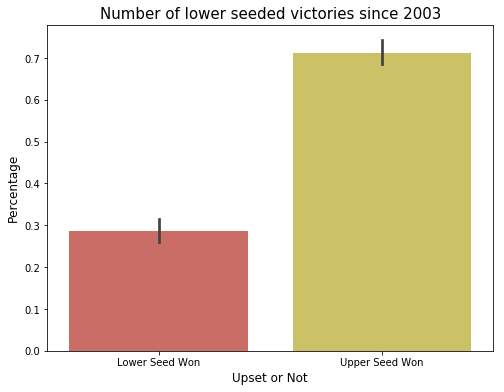

In [52]:
upset = []
favorite = []

for i in testd.target:
    if i > 0:
        favorite.append(1)
        upset.append(0)
    else:
        upset.append(1)
        favorite.append(0)

data = pd.DataFrame({"upset":upset, "favorite":favorite})

f, ax = plt.subplots(figsize=(8, 6))
plot = sns.barplot(data = data)
plt.xlabel('Upset or Not', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Number of lower seeded victories since 2003', fontsize=15)
plt.xticks([0, 1],
           ['Lower Seed Won', 'Upper Seed Won'])
plt.show()
        
        

In [53]:
print(testd.columns)

Index(['Season', 'LTeamID', 'L_Numlosses', 'L_NumWins', 'W_NumLoss', 'LP6',
       'WP6', 'LTeamSeed', 'WTeamSeed', 'LPSeed', 'WPSeed', 'LTeam', 'WTeam',
       'DayNum', 'WTeamID', 'WConfChamp', 'LConfChamp', 'W_NumWins',
       'power_seed_diff', 'target'],
      dtype='object')


## Fourth group of Features 
These will all be in the same vain.  These are going to be regular season averages for several statistical categories, field goal percentage, three point percentage, thre pointers made, steals, defensive rebounds, offensive rebounds, free throw percentage, average points per game, average blocks, average turnovers, point differential, opponents 3p percentage, wins, losses.  We know that the more features we create, the more prone we will be to over fitting, however, we feel that these will be key indicators, and that if we do end up over fitting our model, we can always features out. 


It will not simply be a simple merge however, because of how the data is constructed, we will need to take the average of the teams for when they won, weight them by their number of wins and do the same for their losses and then take their weighted average.  We will then drop the columns used to create the averages because those columns will at that point, not be giving us any new information and we will want to avoid over fitting.  This will be similar to the process above, rather laboreus

### creating feild goal percentage 
#### first for winning team, then for losing team 

In [54]:
#going into regular season details, grouping by season and WteamID, which will tell me in the games that 
#each team won, how many Feild goals did they attempt, then take the mean of that 

W_season_FGA_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WFGA"].mean() 
W_season_FGA_in_wins = pd.DataFrame(W_season_FGA_in_wins)
W_season_FGA_in_wins.head()

WFGA
Season WTeamID           
2003   1102     40.000000
       1103     55.384615
       1104     58.352941
       1105     61.857143
       1106     53.846154

In [55]:
# same as above, how many fgs did the winning team make on average when they win 

W_season_FGM_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WFGM"].mean() 
W_season_FGM_in_wins = pd.DataFrame(W_season_FGM_in_wins)
W_season_FGM_in_wins.head()

WFGM
Season WTeamID           
2003   1102     22.583333
       1103     30.000000
       1104     25.823529
       1105     25.571429
       1106     24.769231

In [56]:
# now for the games that they lost,if a team were to ever go undefeated in the regular season, we would fill in a zero
# but this hasn't happend Since indiana did it in 1976 

L_season_FGM_in_loss = reg_deets.groupby(["Season", "LTeamID"])["LFGM"].mean() 
L_season_FGM_in_loss = pd.DataFrame(L_season_FGM_in_loss)
#L_season_FGPM_in_loss = L_season_FGPM_in_loss.rename(columns = {'LTeamID': 'WTeamID'})

L_season_FGM_in_loss.head()

LFGM
Season LTeamID           
2003   1102     16.562500
       1103     24.500000
       1104     21.272727
       1105     23.947368
       1106     22.266667

In [57]:
#feild goals attempted in losses 

L_season_FGA_in_loss = reg_deets.groupby(["Season", "LTeamID"])["LFGA"].mean() 
L_season_FGA_in_loss = pd.DataFrame(L_season_FGA_in_loss)
L_season_FGA_in_loss.head()

LFGA
Season LTeamID           
2003   1102     39.625000
       1103     56.285714
       1104     55.363636
       1105     61.526316
       1106     56.533333

In [58]:
#merging tables to create features 
testd = pd.merge(testd, W_season_FGM_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,LTeam,WTeam,DayNum,WTeamID,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,WFGM
0,2003,1104,11,17,12,1,1,10,7,40,...,Alabama,Indiana,137,1231,0.0,0.0,20,-12,1,24.750000
1,2003,1112,3,25,7,1,1,1,2,4,...,Arizona,Kansas,145,1242,0.0,0.0,23,1,0,32.130435
2,2003,1113,11,18,7,1,1,10,2,37,...,Arizona St,Kansas,138,1242,0.0,0.0,23,-32,1,32.130435
3,2003,1181,6,24,7,1,1,3,2,9,...,Duke,Kansas,143,1242,0.0,0.0,23,-4,1,32.130435
4,2003,1266,5,23,7,0,1,3,2,12,...,Marquette,Kansas,152,1242,0.0,0.0,23,-7,1,32.130435


In [59]:
# feild goals made and missed for the winning team, now we need to weight those by record to find their true 
# feild goal percentage 
testd = pd.merge(testd, L_season_FGM_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WTeam,DayNum,WTeamID,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,WFGM,LFGM
0,2003,1104,11,17,12,1,1,10,7,40,...,Indiana,137,1231,0.0,0.0,20,-12,1,24.750000,21.25
1,2003,1112,3,25,7,1,1,1,2,4,...,Kansas,145,1242,0.0,0.0,23,1,0,32.130435,24.00
2,2003,1113,11,18,7,1,1,10,2,37,...,Kansas,138,1242,0.0,0.0,23,-32,1,32.130435,24.00
3,2003,1181,6,24,7,1,1,3,2,9,...,Kansas,143,1242,0.0,0.0,23,-4,1,32.130435,24.00
4,2003,1266,5,23,7,0,1,3,2,12,...,Kansas,152,1242,0.0,0.0,23,-7,1,32.130435,24.00


In [60]:
# true average weighted by record 
testd["AVG_FGM"] = (testd["WFGM"]*testd["W_NumWins"] + testd["LFGM"]*testd["W_NumLoss"])/(testd["W_NumWins"]+testd["W_NumLoss"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,DayNum,WTeamID,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,WFGM,LFGM,AVG_FGM
0,2003,1104,11,17,12,1,1,10,7,40,...,137,1231,0.0,0.0,20,-12,1,24.750000,21.25,23.437500
1,2003,1112,3,25,7,1,1,1,2,4,...,145,1242,0.0,0.0,23,1,0,32.130435,24.00,30.233333
2,2003,1113,11,18,7,1,1,10,2,37,...,138,1242,0.0,0.0,23,-32,1,32.130435,24.00,30.233333
3,2003,1181,6,24,7,1,1,3,2,9,...,143,1242,0.0,0.0,23,-4,1,32.130435,24.00,30.233333
4,2003,1266,5,23,7,0,1,3,2,12,...,152,1242,0.0,0.0,23,-7,1,32.130435,24.00,30.233333


In [61]:
# attempts in wins 
testd = pd.merge(testd, W_season_FGA_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])

testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WTeamID,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,WFGM,LFGM,AVG_FGM,WFGA
0,2003,1104,11,17,12,1,1,10,7,40,...,1231,0.0,0.0,20,-12,1,24.750000,21.25,23.437500,56.500000
1,2003,1112,3,25,7,1,1,1,2,4,...,1242,0.0,0.0,23,1,0,32.130435,24.00,30.233333,62.173913
2,2003,1113,11,18,7,1,1,10,2,37,...,1242,0.0,0.0,23,-32,1,32.130435,24.00,30.233333,62.173913
3,2003,1181,6,24,7,1,1,3,2,9,...,1242,0.0,0.0,23,-4,1,32.130435,24.00,30.233333,62.173913
4,2003,1266,5,23,7,0,1,3,2,12,...,1242,0.0,0.0,23,-7,1,32.130435,24.00,30.233333,62.173913


In [62]:
testd = pd.merge(testd, L_season_FGA_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])


In [63]:

testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,WFGM,LFGM,AVG_FGM,WFGA,LFGA
0,2003,1104,11,17,12,1,1,10,7,40,...,0.0,0.0,20,-12,1,24.750000,21.25,23.437500,56.500000,52.333333
1,2003,1112,3,25,7,1,1,1,2,4,...,0.0,0.0,23,1,0,32.130435,24.00,30.233333,62.173913,62.714286
2,2003,1113,11,18,7,1,1,10,2,37,...,0.0,0.0,23,-32,1,32.130435,24.00,30.233333,62.173913,62.714286
3,2003,1181,6,24,7,1,1,3,2,9,...,0.0,0.0,23,-4,1,32.130435,24.00,30.233333,62.173913,62.714286
4,2003,1266,5,23,7,0,1,3,2,12,...,0.0,0.0,23,-7,1,32.130435,24.00,30.233333,62.173913,62.714286


In [64]:
# true average feild goals attempted weighted by wins and losses in the regular season, 

testd["AVG_FGA"] = (testd["WFGA"]*testd["W_NumWins"] + testd["LFGA"]*testd["W_NumLoss"])/(testd["W_NumWins"]+testd["W_NumLoss"])

#testd["AVG_FGM"] = (testd["WFGM"]*testd["W_NumWins"] + testd["LFGM"]*testd["W_NumLoss"])/(testd["W_NumWins"]+testd["W_NumLoss"])

testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,LConfChamp,W_NumWins,power_seed_diff,target,WFGM,LFGM,AVG_FGM,WFGA,LFGA,AVG_FGA
0,2003,1104,11,17,12,1,1,10,7,40,...,0.0,20,-12,1,24.750000,21.25,23.437500,56.500000,52.333333,54.9375
1,2003,1112,3,25,7,1,1,1,2,4,...,0.0,23,1,0,32.130435,24.00,30.233333,62.173913,62.714286,62.3000
2,2003,1113,11,18,7,1,1,10,2,37,...,0.0,23,-32,1,32.130435,24.00,30.233333,62.173913,62.714286,62.3000
3,2003,1181,6,24,7,1,1,3,2,9,...,0.0,23,-4,1,32.130435,24.00,30.233333,62.173913,62.714286,62.3000
4,2003,1266,5,23,7,0,1,3,2,12,...,0.0,23,-7,1,32.130435,24.00,30.233333,62.173913,62.714286,62.3000


In [65]:
#these columns now tell me the same thing, so I wil drop them 
testd = testd.drop(axis = 1, columns = ["WFGM", "LFGM", "WFGA", "LFGA"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WTeam,DayNum,WTeamID,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,AVG_FGM,AVG_FGA
0,2003,1104,11,17,12,1,1,10,7,40,...,Indiana,137,1231,0.0,0.0,20,-12,1,23.437500,54.9375
1,2003,1112,3,25,7,1,1,1,2,4,...,Kansas,145,1242,0.0,0.0,23,1,0,30.233333,62.3000
2,2003,1113,11,18,7,1,1,10,2,37,...,Kansas,138,1242,0.0,0.0,23,-32,1,30.233333,62.3000
3,2003,1181,6,24,7,1,1,3,2,9,...,Kansas,143,1242,0.0,0.0,23,-4,1,30.233333,62.3000
4,2003,1266,5,23,7,0,1,3,2,12,...,Kansas,152,1242,0.0,0.0,23,-7,1,30.233333,62.3000


In [66]:
# feature for Winning team regular season fg% now created -- wow that was more work than I thought it would be 
testd["W_FG%"] = testd["AVG_FGM"] / testd["AVG_FGA"]
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,DayNum,WTeamID,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,AVG_FGM,AVG_FGA,W_FG%
0,2003,1104,11,17,12,1,1,10,7,40,...,137,1231,0.0,0.0,20,-12,1,23.437500,54.9375,0.426621
1,2003,1112,3,25,7,1,1,1,2,4,...,145,1242,0.0,0.0,23,1,0,30.233333,62.3000,0.485286
2,2003,1113,11,18,7,1,1,10,2,37,...,138,1242,0.0,0.0,23,-32,1,30.233333,62.3000,0.485286
3,2003,1181,6,24,7,1,1,3,2,9,...,143,1242,0.0,0.0,23,-4,1,30.233333,62.3000,0.485286
4,2003,1266,5,23,7,0,1,3,2,12,...,152,1242,0.0,0.0,23,-7,1,30.233333,62.3000,0.485286


now creating the same feature but for the losing team 


In [67]:
## merging table to get the average winning field goal percentage for the team that lost in march

testd = pd.merge(testd, W_season_FGM_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WTeamID,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,AVG_FGM,AVG_FGA,W_FG%,WFGM
0,2003,1104,11,17,12,1,1,10,7,40,...,1231,0.0,0.0,20,-12,1,23.437500,54.9375,0.426621,25.823529
1,2003,1112,3,25,7,1,1,1,2,4,...,1242,0.0,0.0,23,1,0,30.233333,62.3000,0.485286,30.640000
2,2003,1113,11,18,7,1,1,10,2,37,...,1242,0.0,0.0,23,-32,1,30.233333,62.3000,0.485286,29.055556
3,2003,1181,6,24,7,1,1,3,2,9,...,1242,0.0,0.0,23,-4,1,30.233333,62.3000,0.485286,27.875000
4,2003,1266,5,23,7,0,1,3,2,12,...,1242,0.0,0.0,23,-7,1,30.233333,62.3000,0.485286,27.391304


In [68]:
# going to re name this so I don't get this mixed up 
# Losing teams Winning FG Made 
testd = testd.rename(columns = {'WFGM': 'LWFGM'})
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WTeamID,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,AVG_FGM,AVG_FGA,W_FG%,LWFGM
0,2003,1104,11,17,12,1,1,10,7,40,...,1231,0.0,0.0,20,-12,1,23.437500,54.9375,0.426621,25.823529
1,2003,1112,3,25,7,1,1,1,2,4,...,1242,0.0,0.0,23,1,0,30.233333,62.3000,0.485286,30.640000
2,2003,1113,11,18,7,1,1,10,2,37,...,1242,0.0,0.0,23,-32,1,30.233333,62.3000,0.485286,29.055556
3,2003,1181,6,24,7,1,1,3,2,9,...,1242,0.0,0.0,23,-4,1,30.233333,62.3000,0.485286,27.875000
4,2003,1266,5,23,7,0,1,3,2,12,...,1242,0.0,0.0,23,-7,1,30.233333,62.3000,0.485286,27.391304


In [69]:
#creating the losing team in march regular season fgm for when they lost 
testd = pd.merge(testd, L_season_FGM_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,AVG_FGM,AVG_FGA,W_FG%,LWFGM,LFGM
0,2003,1104,11,17,12,1,1,10,7,40,...,0.0,0.0,20,-12,1,23.437500,54.9375,0.426621,25.823529,21.272727
1,2003,1112,3,25,7,1,1,1,2,4,...,0.0,0.0,23,1,0,30.233333,62.3000,0.485286,30.640000,27.666667
2,2003,1113,11,18,7,1,1,10,2,37,...,0.0,0.0,23,-32,1,30.233333,62.3000,0.485286,29.055556,24.181818
3,2003,1181,6,24,7,1,1,3,2,9,...,0.0,0.0,23,-4,1,30.233333,62.3000,0.485286,27.875000,25.333333
4,2003,1266,5,23,7,0,1,3,2,12,...,0.0,0.0,23,-7,1,30.233333,62.3000,0.485286,27.391304,26.400000


In [70]:
#Losing team feild goal attempts in losses 

testd = pd.merge(testd, L_season_FGA_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,LConfChamp,W_NumWins,power_seed_diff,target,AVG_FGM,AVG_FGA,W_FG%,LWFGM,LFGM,LFGA
0,2003,1104,11,17,12,1,1,10,7,40,...,0.0,20,-12,1,23.437500,54.9375,0.426621,25.823529,21.272727,55.363636
1,2003,1112,3,25,7,1,1,1,2,4,...,0.0,23,1,0,30.233333,62.3000,0.485286,30.640000,27.666667,73.000000
2,2003,1113,11,18,7,1,1,10,2,37,...,0.0,23,-32,1,30.233333,62.3000,0.485286,29.055556,24.181818,58.454545
3,2003,1181,6,24,7,1,1,3,2,9,...,0.0,23,-4,1,30.233333,62.3000,0.485286,27.875000,25.333333,63.333333
4,2003,1266,5,23,7,0,1,3,2,12,...,0.0,23,-7,1,30.233333,62.3000,0.485286,27.391304,26.400000,62.400000


In [71]:
# losing teams feild goal percentage in wins 

L_season_FGA_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WFGA"].mean() 
L_season_FGA_in_wins = pd.DataFrame(L_season_FGA_in_wins)

L_season_FGA_in_wins = L_season_FGA_in_wins.rename(columns = {'WFGA': 'LWFGA'})
L_season_FGA_in_wins.head()

LWFGA
Season WTeamID           
2003   1102     40.000000
       1103     55.384615
       1104     58.352941
       1105     61.857143
       1106     53.846154

In [72]:
#creating that last feature to then be able to create the true feild goal percentage for the losing team 

testd = pd.merge(testd, L_season_FGA_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,W_NumWins,power_seed_diff,target,AVG_FGM,AVG_FGA,W_FG%,LWFGM,LFGM,LFGA,LWFGA
0,2003,1104,11,17,12,1,1,10,7,40,...,20,-12,1,23.437500,54.9375,0.426621,25.823529,21.272727,55.363636,58.352941
1,2003,1112,3,25,7,1,1,1,2,4,...,23,1,0,30.233333,62.3000,0.485286,30.640000,27.666667,73.000000,64.840000
2,2003,1113,11,18,7,1,1,10,2,37,...,23,-32,1,30.233333,62.3000,0.485286,29.055556,24.181818,58.454545,55.944444
3,2003,1181,6,24,7,1,1,3,2,9,...,23,-4,1,30.233333,62.3000,0.485286,27.875000,25.333333,63.333333,59.583333
4,2003,1266,5,23,7,0,1,3,2,12,...,23,-7,1,30.233333,62.3000,0.485286,27.391304,26.400000,62.400000,54.913043


In [73]:
testd["L_FG%"] = (testd["LWFGM"]*testd["L_NumWins"]+testd["LFGM"]*testd["L_Numlosses"])/(testd["LFGA"]*testd["L_Numlosses"]+testd["LWFGA"]*testd["L_NumWins"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,power_seed_diff,target,AVG_FGM,AVG_FGA,W_FG%,LWFGM,LFGM,LFGA,LWFGA,L_FG%
0,2003,1104,11,17,12,1,1,10,7,40,...,-12,1,23.437500,54.9375,0.426621,25.823529,21.272727,55.363636,58.352941,0.420362
1,2003,1112,3,25,7,1,1,1,2,4,...,1,0,30.233333,62.3000,0.485286,30.640000,27.666667,73.000000,64.840000,0.461413
2,2003,1113,11,18,7,1,1,10,2,37,...,-32,1,30.233333,62.3000,0.485286,29.055556,24.181818,58.454545,55.944444,0.478182
3,2003,1181,6,24,7,1,1,3,2,9,...,-4,1,30.233333,62.3000,0.485286,27.875000,25.333333,63.333333,59.583333,0.453591
4,2003,1266,5,23,7,0,1,3,2,12,...,-7,1,30.233333,62.3000,0.485286,27.391304,26.400000,62.400000,54.913043,0.483810


In [74]:
#because we do not want to over fit, and there is't really any new
#information gained from columns that give the output of our FG% 
#averages, we will drop these from our data set. 

testd = testd.drop(axis = 1, columns = ["AVG_FGM", "AVG_FGA", "LWFGM", "LFGM", "LFGA", "LWFGA"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WTeam,DayNum,WTeamID,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,W_FG%,L_FG%
0,2003,1104,11,17,12,1,1,10,7,40,...,Indiana,137,1231,0.0,0.0,20,-12,1,0.426621,0.420362
1,2003,1112,3,25,7,1,1,1,2,4,...,Kansas,145,1242,0.0,0.0,23,1,0,0.485286,0.461413
2,2003,1113,11,18,7,1,1,10,2,37,...,Kansas,138,1242,0.0,0.0,23,-32,1,0.485286,0.478182
3,2003,1181,6,24,7,1,1,3,2,9,...,Kansas,143,1242,0.0,0.0,23,-4,1,0.485286,0.453591
4,2003,1266,5,23,7,0,1,3,2,12,...,Kansas,152,1242,0.0,0.0,23,-7,1,0.485286,0.483810


##### Creating free throw percentage 

In [75]:
#again using regular season stats, grouping by WTeamID, taking the mean of 
# made free throws of games won 

W_season_FTM_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WFTM"].mean() 
W_season_FTM_in_wins = pd.DataFrame(W_season_FTM_in_wins)
W_season_FTM_in_wins.head()

WFTM
Season WTeamID           
2003   1102     13.583333
       1103     22.307692
       1104     16.000000
       1105     19.142857
       1106     12.923077

In [76]:
# and the average attempts for games won 

W_season_FTA_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WFTA"].mean() 
W_season_FTA_in_wins = pd.DataFrame(W_season_FTA_in_wins)
W_season_FTA_in_wins.head()

WFTA
Season WTeamID           
2003   1102     20.750000
       1103     30.923077
       1104     22.529412
       1105     25.714286
       1106     20.769231

In [77]:
# average number of attempts when lost 

L_season_FTA_in_loss = reg_deets.groupby(["Season", "LTeamID"])["LFTA"].mean() 
L_season_FTA_in_loss = pd.DataFrame(L_season_FTA_in_loss)
L_season_FTA_in_loss.head()

LFTA
Season LTeamID           
2003   1102     14.375000
       1103     21.142857
       1104     18.454545
       1105     20.421053
       1106     12.733333

In [78]:
# average made free throws when lost 

L_season_FTM_in_loss = reg_deets.groupby(["Season", "LTeamID"])["LFTM"].mean() 
L_season_FTM_in_loss = pd.DataFrame(L_season_FTM_in_loss)
L_season_FTM_in_loss.head()

LFTM
Season LTeamID           
2003   1102      9.312500
       1103     16.000000
       1104     13.090909
       1105     14.052632
       1106      8.666667

In [79]:
#merging with FTM from winning teams onto the winning team 

testd = pd.merge(testd, W_season_FTM_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])

In [80]:
#re-naiming the column so I don't get lost, Wining team Winning Free Throws Made 
testd = testd.rename(columns = {'WFTM': 'WWFTM'})
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,DayNum,WTeamID,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,W_FG%,L_FG%,WWFTM
0,2003,1104,11,17,12,1,1,10,7,40,...,137,1231,0.0,0.0,20,-12,1,0.426621,0.420362,17.800000
1,2003,1112,3,25,7,1,1,1,2,4,...,145,1242,0.0,0.0,23,1,0,0.485286,0.461413,16.304348
2,2003,1113,11,18,7,1,1,10,2,37,...,138,1242,0.0,0.0,23,-32,1,0.485286,0.478182,16.304348
3,2003,1181,6,24,7,1,1,3,2,9,...,143,1242,0.0,0.0,23,-4,1,0.485286,0.453591,16.304348
4,2003,1266,5,23,7,0,1,3,2,12,...,152,1242,0.0,0.0,23,-7,1,0.485286,0.483810,16.304348


In [81]:
# now getting the attempts from winning games in regular season

testd = pd.merge(testd, W_season_FTA_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])

testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WTeamID,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,W_FG%,L_FG%,WWFTM,WFTA
0,2003,1104,11,17,12,1,1,10,7,40,...,1231,0.0,0.0,20,-12,1,0.426621,0.420362,17.800000,24.750000
1,2003,1112,3,25,7,1,1,1,2,4,...,1242,0.0,0.0,23,1,0,0.485286,0.461413,16.304348,24.347826
2,2003,1113,11,18,7,1,1,10,2,37,...,1242,0.0,0.0,23,-32,1,0.485286,0.478182,16.304348,24.347826
3,2003,1181,6,24,7,1,1,3,2,9,...,1242,0.0,0.0,23,-4,1,0.485286,0.453591,16.304348,24.347826
4,2003,1266,5,23,7,0,1,3,2,12,...,1242,0.0,0.0,23,-7,1,0.485286,0.483810,16.304348,24.347826


In [82]:
# makes from losses for winning team 
testd = pd.merge(testd, L_season_FTM_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])

In [83]:
#attempts from losses for winning team 
testd = pd.merge(testd, L_season_FTA_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,LConfChamp,W_NumWins,power_seed_diff,target,W_FG%,L_FG%,WWFTM,WFTA,LFTM,LFTA
0,2003,1104,11,17,12,1,1,10,7,40,...,0.0,20,-12,1,0.426621,0.420362,17.800000,24.750000,13.333333,19.083333
1,2003,1112,3,25,7,1,1,1,2,4,...,0.0,23,1,0,0.485286,0.461413,16.304348,24.347826,15.285714,23.428571
2,2003,1113,11,18,7,1,1,10,2,37,...,0.0,23,-32,1,0.485286,0.478182,16.304348,24.347826,15.285714,23.428571
3,2003,1181,6,24,7,1,1,3,2,9,...,0.0,23,-4,1,0.485286,0.453591,16.304348,24.347826,15.285714,23.428571
4,2003,1266,5,23,7,0,1,3,2,12,...,0.0,23,-7,1,0.485286,0.483810,16.304348,24.347826,15.285714,23.428571


In [84]:
#testd = testd.drop(axis = 1, columns = ["AVG_FGM", "AVG_FGA"])

#testd["WFT%"] = (testd["WFTM"]*testd["W_NumWins"] + testd["LFTM"]*testd["W_NumLoss"])/(testd["W_NumWins"]*testd["WFTA"]+testd["W_NumLoss"]*testd["LFTA"])

In [85]:
#creating feature for winning teams FT%
testd["WFT%"] = (testd["WWFTM"]*testd["W_NumWins"] + testd["LFTM"]*testd["W_NumLoss"])/(testd["W_NumWins"]*testd["WFTA"]+testd["W_NumLoss"]*testd["LFTA"])

testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,W_NumWins,power_seed_diff,target,W_FG%,L_FG%,WWFTM,WFTA,LFTM,LFTA,WFT%
0,2003,1104,11,17,12,1,1,10,7,40,...,20,-12,1,0.426621,0.420362,17.800000,24.750000,13.333333,19.083333,0.712707
1,2003,1112,3,25,7,1,1,1,2,4,...,23,1,0,0.485286,0.461413,16.304348,24.347826,15.285714,23.428571,0.665746
2,2003,1113,11,18,7,1,1,10,2,37,...,23,-32,1,0.485286,0.478182,16.304348,24.347826,15.285714,23.428571,0.665746
3,2003,1181,6,24,7,1,1,3,2,9,...,23,-4,1,0.485286,0.453591,16.304348,24.347826,15.285714,23.428571,0.665746
4,2003,1266,5,23,7,0,1,3,2,12,...,23,-7,1,0.485286,0.483810,16.304348,24.347826,15.285714,23.428571,0.665746


In [86]:
#dropping columns for wining team 

testd = testd.drop(axis = 1, columns = ["WWFTM", "WFTA", "LFTM", "LFTA"])

In [87]:
#now doing the same but for losing teams in the regular season. 
#games where the losing team in march won in the regular season, mean of 
# FGA and FGM 
L_season_FTA_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WFTA"].mean() 
L_season_FTA_in_wins = pd.DataFrame(L_season_FTA_in_wins)

L_season_FTM_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WFTM"].mean() 
L_season_FTM_in_wins = pd.DataFrame(L_season_FTM_in_wins)

L_season_FTM_in_wins.head()

WFTM
Season WTeamID           
2003   1102     13.583333
       1103     22.307692
       1104     16.000000
       1105     19.142857
       1106     12.923077

In [88]:
#games where the losing team in march lost in the regular season, mean of 
# FGA and FGM 

L_season_FTA_in_loss = reg_deets.groupby(["Season", "LTeamID"])["LFTA"].mean() 
L_season_FTA_in_loss = pd.DataFrame(L_season_FTA_in_loss)

L_season_FTM_in_loss = reg_deets.groupby(["Season", "LTeamID"])["LFTM"].mean() 
L_season_FTM_in_loss = pd.DataFrame(L_season_FTM_in_loss)

L_season_FTM_in_loss.head()

LFTM
Season LTeamID           
2003   1102      9.312500
       1103     16.000000
       1104     13.090909
       1105     14.052632
       1106      8.666667

In [89]:
#merging with FTM from losing teams onto the winning team 

testd = pd.merge(testd, L_season_FTA_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
testd = pd.merge(testd, L_season_FTM_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,W_FG%,L_FG%,WFT%,WFTA,WFTM
0,2003,1104,11,17,12,1,1,10,7,40,...,0.0,0.0,20,-12,1,0.426621,0.420362,0.712707,22.529412,16.000000
1,2003,1112,3,25,7,1,1,1,2,4,...,0.0,0.0,23,1,0,0.485286,0.461413,0.665746,25.280000,17.840000
2,2003,1113,11,18,7,1,1,10,2,37,...,0.0,0.0,23,-32,1,0.485286,0.478182,0.665746,28.111111,19.055556
3,2003,1181,6,24,7,1,1,3,2,9,...,0.0,0.0,23,-4,1,0.485286,0.453591,0.665746,29.083333,20.958333
4,2003,1266,5,23,7,0,1,3,2,12,...,0.0,0.0,23,-7,1,0.485286,0.483810,0.665746,24.956522,18.869565


In [90]:
testd = testd.rename(columns = {'WFTM': 'LWFTM', "WFTA":"LWFTA"})
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,W_FG%,L_FG%,WFT%,LWFTA,LWFTM
0,2003,1104,11,17,12,1,1,10,7,40,...,0.0,0.0,20,-12,1,0.426621,0.420362,0.712707,22.529412,16.000000
1,2003,1112,3,25,7,1,1,1,2,4,...,0.0,0.0,23,1,0,0.485286,0.461413,0.665746,25.280000,17.840000
2,2003,1113,11,18,7,1,1,10,2,37,...,0.0,0.0,23,-32,1,0.485286,0.478182,0.665746,28.111111,19.055556
3,2003,1181,6,24,7,1,1,3,2,9,...,0.0,0.0,23,-4,1,0.485286,0.453591,0.665746,29.083333,20.958333
4,2003,1266,5,23,7,0,1,3,2,12,...,0.0,0.0,23,-7,1,0.485286,0.483810,0.665746,24.956522,18.869565


In [91]:
#now for games they lost 
testd = pd.merge(testd, L_season_FTM_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
testd = pd.merge(testd, L_season_FTA_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,W_NumWins,power_seed_diff,target,W_FG%,L_FG%,WFT%,LWFTA,LWFTM,LFTM,LFTA
0,2003,1104,11,17,12,1,1,10,7,40,...,20,-12,1,0.426621,0.420362,0.712707,22.529412,16.000000,13.090909,18.454545
1,2003,1112,3,25,7,1,1,1,2,4,...,23,1,0,0.485286,0.461413,0.665746,25.280000,17.840000,15.000000,22.666667
2,2003,1113,11,18,7,1,1,10,2,37,...,23,-32,1,0.485286,0.478182,0.665746,28.111111,19.055556,15.090909,23.090909
3,2003,1181,6,24,7,1,1,3,2,9,...,23,-4,1,0.485286,0.453591,0.665746,29.083333,20.958333,15.666667,24.000000
4,2003,1266,5,23,7,0,1,3,2,12,...,23,-7,1,0.485286,0.483810,0.665746,24.956522,18.869565,15.000000,17.400000


In [92]:
#creating total free throw percentage for losing team 

testd["LFT%"] = (testd["LWFTM"]*testd["L_NumWins"] + testd["LFTM"]*testd["L_Numlosses"])/(testd["LWFTA"]*testd["L_NumWins"] + testd["LFTA"]*testd["L_Numlosses"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,power_seed_diff,target,W_FG%,L_FG%,WFT%,LWFTA,LWFTM,LFTM,LFTA,LFT%
0,2003,1104,11,17,12,1,1,10,7,40,...,-12,1,0.426621,0.420362,0.712707,22.529412,16.000000,13.090909,18.454545,0.709898
1,2003,1112,3,25,7,1,1,1,2,4,...,1,0,0.485286,0.461413,0.665746,25.280000,17.840000,15.000000,22.666667,0.701429
2,2003,1113,11,18,7,1,1,10,2,37,...,-32,1,0.485286,0.478182,0.665746,28.111111,19.055556,15.090909,23.090909,0.669737
3,2003,1181,6,24,7,1,1,3,2,9,...,-4,1,0.485286,0.453591,0.665746,29.083333,20.958333,15.666667,24.000000,0.709026
4,2003,1266,5,23,7,0,1,3,2,12,...,-7,1,0.485286,0.483810,0.665746,24.956522,18.869565,15.000000,17.400000,0.770045


In [93]:
testd = testd.drop(axis = 1, columns = ["LWFTA", "LWFTM", "LFTM", "LFTA"])

###### It is often said that the three point shot is college basketballs great equalizer, and that certaintly appears to be the case in March. To verify this point we will repeat the process done above, but for three point feild goals specifically.  Overall field goal percentage takes into account three point feild goals, however we believe that this will be a usefull feature and we will include it in our model at least initially. 

In [94]:
#grouping by season and team id for 3point feild goals 

W_season_3PM_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WFGM3"].mean() 
W_season_3PM_in_wins = pd.DataFrame(W_season_3PM_in_wins)

W_season_3PA_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WFGA3"].mean() 
W_season_3PA_in_wins = pd.DataFrame(W_season_3PA_in_wins)

W_season_3PA_in_wins.head()



WFGA3
Season WTeamID           
2003   1102     21.583333
       1103     14.384615
       1104     20.823529
       1105     22.428571
       1106     15.923077

In [95]:
#winning team in march averages in regular season losses 
W_season_3PM_in_loss = reg_deets.groupby(["Season", "LTeamID"])["LFGM3"].mean() 
W_season_3PM_in_loss = pd.DataFrame(W_season_3PM_in_loss)

W_season_3PA_in_loss = reg_deets.groupby(["Season", "LTeamID"])["LFGA3"].mean() 
W_season_3PA_in_loss = pd.DataFrame(W_season_3PA_in_loss)

W_season_3PA_in_loss.head()


LFGA3
Season LTeamID           
2003   1102     20.250000
       1103     17.642857
       1104     18.363636
       1105     20.157895
       1106     19.133333

In [96]:
#merging winning teams with winning games 

testd = pd.merge(testd, W_season_3PM_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
testd = pd.merge(testd, W_season_3PA_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,LConfChamp,W_NumWins,power_seed_diff,target,W_FG%,L_FG%,WFT%,LFT%,WFGM3,WFGA3
0,2003,1104,11,17,12,1,1,10,7,40,...,0.0,20,-12,1,0.426621,0.420362,0.712707,0.709898,8.150000,21.95000
1,2003,1112,3,25,7,1,1,1,2,4,...,0.0,23,1,0,0.485286,0.461413,0.665746,0.701429,4.956522,13.73913
2,2003,1113,11,18,7,1,1,10,2,37,...,0.0,23,-32,1,0.485286,0.478182,0.665746,0.669737,4.956522,13.73913
3,2003,1181,6,24,7,1,1,3,2,9,...,0.0,23,-4,1,0.485286,0.453591,0.665746,0.709026,4.956522,13.73913
4,2003,1266,5,23,7,0,1,3,2,12,...,0.0,23,-7,1,0.485286,0.483810,0.665746,0.770045,4.956522,13.73913


In [97]:
#merging 
testd = pd.merge(testd, W_season_3PM_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
testd = pd.merge(testd, W_season_3PA_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,power_seed_diff,target,W_FG%,L_FG%,WFT%,LFT%,WFGM3,WFGA3,LFGM3,LFGA3
0,2003,1104,11,17,12,1,1,10,7,40,...,-12,1,0.426621,0.420362,0.712707,0.709898,8.150000,21.95000,6.500000,21.083333
1,2003,1112,3,25,7,1,1,1,2,4,...,1,0,0.485286,0.461413,0.665746,0.701429,4.956522,13.73913,4.285714,15.428571
2,2003,1113,11,18,7,1,1,10,2,37,...,-32,1,0.485286,0.478182,0.665746,0.669737,4.956522,13.73913,4.285714,15.428571
3,2003,1181,6,24,7,1,1,3,2,9,...,-4,1,0.485286,0.453591,0.665746,0.709026,4.956522,13.73913,4.285714,15.428571
4,2003,1266,5,23,7,0,1,3,2,12,...,-7,1,0.485286,0.483810,0.665746,0.770045,4.956522,13.73913,4.285714,15.428571


In [98]:
#create feature for winning team
testd["W3%"] = (testd["WFGM3"]*testd["W_NumWins"]+testd["LFGM3"]*testd["W_NumLoss"])/(testd["WFGA3"]*testd["W_NumWins"]+testd["LFGA3"]*testd["W_NumLoss"])
testd = testd.drop(axis = 1, columns = ["WFGM3", "WFGA3", "LFGA3", "LFGM3"])
testd.head()


,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WConfChamp,LConfChamp,W_NumWins,power_seed_diff,target,W_FG%,L_FG%,WFT%,LFT%,W3%
0,2003,1104,11,17,12,1,1,10,7,40,...,0.0,0.0,20,-12,1,0.426621,0.420362,0.712707,0.709898,0.348266
1,2003,1112,3,25,7,1,1,1,2,4,...,0.0,0.0,23,1,0,0.485286,0.461413,0.665746,0.701429,0.339623
2,2003,1113,11,18,7,1,1,10,2,37,...,0.0,0.0,23,-32,1,0.485286,0.478182,0.665746,0.669737,0.339623
3,2003,1181,6,24,7,1,1,3,2,9,...,0.0,0.0,23,-4,1,0.485286,0.453591,0.665746,0.709026,0.339623
4,2003,1266,5,23,7,0,1,3,2,12,...,0.0,0.0,23,-7,1,0.485286,0.483810,0.665746,0.770045,0.339623


In [99]:
#Now calculating 3P% for losing team 
# start by grouping by season again and by the games that team won 
L_season_3PM_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WFGM3"].mean() 
L_season_3PM_in_wins = pd.DataFrame(L_season_3PM_in_wins)

L_season_3PA_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WFGA3"].mean() 
L_season_3PA_in_wins = pd.DataFrame(L_season_3PA_in_wins)

L_season_3PA_in_wins.head()

WFGA3
Season WTeamID           
2003   1102     21.583333
       1103     14.384615
       1104     20.823529
       1105     22.428571
       1106     15.923077

In [100]:
#winning team in march averages in regular season losses 
L_season_3PM_in_loss = reg_deets.groupby(["Season", "LTeamID"])["LFGM3"].mean() 
L_season_3PM_in_loss = pd.DataFrame(L_season_3PM_in_loss)

L_season_3PA_in_loss = reg_deets.groupby(["Season", "LTeamID"])["LFGA3"].mean() 
L_season_3PA_in_loss = pd.DataFrame(L_season_3PA_in_loss)

L_season_3PA_in_loss.head()

LFGA3
Season LTeamID           
2003   1102     20.250000
       1103     17.642857
       1104     18.363636
       1105     20.157895
       1106     19.133333

In [101]:
#merging winning team with their winning regular season average 

testd = pd.merge(testd, L_season_3PM_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
testd = pd.merge(testd, L_season_3PA_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,W_NumWins,power_seed_diff,target,W_FG%,L_FG%,WFT%,LFT%,W3%,WFGM3,WFGA3
0,2003,1104,11,17,12,1,1,10,7,40,...,20,-12,1,0.426621,0.420362,0.712707,0.709898,0.348266,7.058824,20.823529
1,2003,1112,3,25,7,1,1,1,2,4,...,23,1,0,0.485286,0.461413,0.665746,0.701429,0.339623,7.080000,19.240000
2,2003,1113,11,18,7,1,1,10,2,37,...,23,-32,1,0.485286,0.478182,0.665746,0.669737,0.339623,3.555556,11.055556
3,2003,1181,6,24,7,1,1,3,2,9,...,23,-4,1,0.485286,0.453591,0.665746,0.709026,0.339623,7.291667,19.291667
4,2003,1266,5,23,7,0,1,3,2,12,...,23,-7,1,0.485286,0.483810,0.665746,0.770045,0.339623,5.608696,14.652174


In [102]:
testd = pd.merge(testd, L_season_3PM_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,power_seed_diff,target,W_FG%,L_FG%,WFT%,LFT%,W3%,WFGM3,WFGA3,LFGM3
0,2003,1104,11,17,12,1,1,10,7,40,...,-12,1,0.426621,0.420362,0.712707,0.709898,0.348266,7.058824,20.823529,5.272727
1,2003,1112,3,25,7,1,1,1,2,4,...,1,0,0.485286,0.461413,0.665746,0.701429,0.339623,7.080000,19.240000,6.666667
2,2003,1113,11,18,7,1,1,10,2,37,...,-32,1,0.485286,0.478182,0.665746,0.669737,0.339623,3.555556,11.055556,4.727273
3,2003,1181,6,24,7,1,1,3,2,9,...,-4,1,0.485286,0.453591,0.665746,0.709026,0.339623,7.291667,19.291667,7.500000
4,2003,1266,5,23,7,0,1,3,2,12,...,-7,1,0.485286,0.483810,0.665746,0.770045,0.339623,5.608696,14.652174,6.600000


In [103]:
testd = pd.merge(testd, L_season_3PA_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,target,W_FG%,L_FG%,WFT%,LFT%,W3%,WFGM3,WFGA3,LFGM3,LFGA3
0,2003,1104,11,17,12,1,1,10,7,40,...,1,0.426621,0.420362,0.712707,0.709898,0.348266,7.058824,20.823529,5.272727,18.363636
1,2003,1112,3,25,7,1,1,1,2,4,...,0,0.485286,0.461413,0.665746,0.701429,0.339623,7.080000,19.240000,6.666667,27.000000
2,2003,1113,11,18,7,1,1,10,2,37,...,1,0.485286,0.478182,0.665746,0.669737,0.339623,3.555556,11.055556,4.727273,15.090909
3,2003,1181,6,24,7,1,1,3,2,9,...,1,0.485286,0.453591,0.665746,0.709026,0.339623,7.291667,19.291667,7.500000,25.833333
4,2003,1266,5,23,7,0,1,3,2,12,...,1,0.485286,0.483810,0.665746,0.770045,0.339623,5.608696,14.652174,6.600000,18.000000


In [104]:
testd["L3%"] = (testd["WFGM3"]*testd["L_NumWins"]+testd["LFGM3"]*testd["L_Numlosses"])/(testd["WFGA3"]*testd["L_NumWins"]+testd["LFGA3"]*testd["L_Numlosses"])
testd.drop(axis = 1, columns = ["WFGM3", "WFGA3", "LFGM3", "LFGA3"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,W_FG%,L_FG%,WFT%,LFT%,W3%,WFGM3,WFGA3,LFGM3,LFGA3,L3%
0,2003,1104,11,17,12,1,1,10,7,40,...,0.426621,0.420362,0.712707,0.709898,0.348266,7.058824,20.823529,5.272727,18.363636,0.320144
1,2003,1112,3,25,7,1,1,1,2,4,...,0.485286,0.461413,0.665746,0.701429,0.339623,7.080000,19.240000,6.666667,27.000000,0.350534
2,2003,1113,11,18,7,1,1,10,2,37,...,0.485286,0.478182,0.665746,0.669737,0.339623,3.555556,11.055556,4.727273,15.090909,0.317808
3,2003,1181,6,24,7,1,1,3,2,9,...,0.485286,0.453591,0.665746,0.709026,0.339623,7.291667,19.291667,7.500000,25.833333,0.355987
4,2003,1266,5,23,7,0,1,3,2,12,...,0.485286,0.483810,0.665746,0.770045,0.339623,5.608696,14.652174,6.600000,18.000000,0.379391


### Rebounding/ assists, other statistical categories 

In [105]:
### winning team regular season average devensive rebounds in wins 

W_season_DR_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WDR"].mean() 
W_season_DR_in_wins = pd.DataFrame(W_season_DR_in_wins)
W_season_DR_in_wins.head()

WDR
Season WTeamID           
2003   1102     19.333333
       1103     21.461538
       1104     26.411765
       1105     25.857143
       1106     28.000000

In [106]:
#winning team average defensive rebounds in losses 

W_season_DR_in_loss = reg_deets.groupby(["Season", "WTeamID"])["LDR"].mean() 
W_season_DR_in_loss = pd.DataFrame(W_season_DR_in_loss)
W_season_DR_in_loss.head()


LDR
Season WTeamID           
2003   1102     18.000000
       1103     20.076923
       1104     22.882353
       1105     23.571429
       1106     19.615385

In [107]:
#merging tables with DR in wins 
testd = pd.merge(testd, W_season_DR_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,L_FG%,WFT%,LFT%,W3%,WFGM3,WFGA3,LFGM3,LFGA3,L3%,WDR
0,2003,1104,11,17,12,1,1,10,7,40,...,0.420362,0.712707,0.709898,0.348266,7.058824,20.823529,5.272727,18.363636,0.320144,28.150000
1,2003,1112,3,25,7,1,1,1,2,4,...,0.461413,0.665746,0.701429,0.339623,7.080000,19.240000,6.666667,27.000000,0.350534,27.478261
2,2003,1113,11,18,7,1,1,10,2,37,...,0.478182,0.665746,0.669737,0.339623,3.555556,11.055556,4.727273,15.090909,0.317808,27.478261
3,2003,1181,6,24,7,1,1,3,2,9,...,0.453591,0.665746,0.709026,0.339623,7.291667,19.291667,7.500000,25.833333,0.355987,27.478261
4,2003,1266,5,23,7,0,1,3,2,12,...,0.483810,0.665746,0.770045,0.339623,5.608696,14.652174,6.600000,18.000000,0.379391,27.478261


In [108]:
#merging with DR in losses 
testd = pd.merge(testd, W_season_DR_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WFT%,LFT%,W3%,WFGM3,WFGA3,LFGM3,LFGA3,L3%,WDR,LDR
0,2003,1104,11,17,12,1,1,10,7,40,...,0.712707,0.709898,0.348266,7.058824,20.823529,5.272727,18.363636,0.320144,28.150000,24.450000
1,2003,1112,3,25,7,1,1,1,2,4,...,0.665746,0.701429,0.339623,7.080000,19.240000,6.666667,27.000000,0.350534,27.478261,21.086957
2,2003,1113,11,18,7,1,1,10,2,37,...,0.665746,0.669737,0.339623,3.555556,11.055556,4.727273,15.090909,0.317808,27.478261,21.086957
3,2003,1181,6,24,7,1,1,3,2,9,...,0.665746,0.709026,0.339623,7.291667,19.291667,7.500000,25.833333,0.355987,27.478261,21.086957
4,2003,1266,5,23,7,0,1,3,2,12,...,0.665746,0.770045,0.339623,5.608696,14.652174,6.600000,18.000000,0.379391,27.478261,21.086957


In [109]:
#Winning team averaage rebounds 
testd["W_Avg_DR"] = (testd["WDR"]*testd["W_NumWins"]+testd["LDR"]*testd["W_NumLoss"])/(testd["W_NumWins"]+testd["W_NumLoss"])
testd.head()


,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,LFT%,W3%,WFGM3,WFGA3,LFGM3,LFGA3,L3%,WDR,LDR,W_Avg_DR
0,2003,1104,11,17,12,1,1,10,7,40,...,0.709898,0.348266,7.058824,20.823529,5.272727,18.363636,0.320144,28.150000,24.450000,26.762500
1,2003,1112,3,25,7,1,1,1,2,4,...,0.701429,0.339623,7.080000,19.240000,6.666667,27.000000,0.350534,27.478261,21.086957,25.986957
2,2003,1113,11,18,7,1,1,10,2,37,...,0.669737,0.339623,3.555556,11.055556,4.727273,15.090909,0.317808,27.478261,21.086957,25.986957
3,2003,1181,6,24,7,1,1,3,2,9,...,0.709026,0.339623,7.291667,19.291667,7.500000,25.833333,0.355987,27.478261,21.086957,25.986957
4,2003,1266,5,23,7,0,1,3,2,12,...,0.770045,0.339623,5.608696,14.652174,6.600000,18.000000,0.379391,27.478261,21.086957,25.986957


In [110]:
testd = testd.drop(axis = 1, columns = ["WDR", "LDR"])

In [111]:
#Creating the same for our losers in march, starting wiht them winning in reg season
L_season_DR_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WDR"].mean() 
L_season_DR_in_wins = pd.DataFrame(L_season_DR_in_wins)
L_season_DR_in_wins = L_season_DR_in_wins.rename(columns = {'WDR': 'LWDR'})
L_season_DR_in_wins.head()

LWDR
Season WTeamID           
2003   1102     19.333333
       1103     21.461538
       1104     26.411765
       1105     25.857143
       1106     28.000000

In [112]:
# losiong team games lost 

L_season_DR_in_loss = reg_deets.groupby(["Season", "WTeamID"])["LDR"].mean() 
L_season_DR_in_loss = pd.DataFrame(W_season_DR_in_loss)
L_season_DR_in_loss = L_season_DR_in_loss.rename(columns = {'LDR': 'LLDR'})
L_season_DR_in_loss.head()

LLDR
Season WTeamID           
2003   1102     18.000000
       1103     20.076923
       1104     22.882353
       1105     23.571429
       1106     19.615385

In [113]:
#merging 
testd = pd.merge(testd, L_season_DR_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
testd = pd.merge(testd, L_season_DR_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,LFT%,W3%,WFGM3,WFGA3,LFGM3,LFGA3,L3%,W_Avg_DR,LWDR,LLDR
0,2003,1104,11,17,12,1,1,10,7,40,...,0.709898,0.348266,7.058824,20.823529,5.272727,18.363636,0.320144,26.762500,26.411765,22.882353
1,2003,1112,3,25,7,1,1,1,2,4,...,0.701429,0.339623,7.080000,19.240000,6.666667,27.000000,0.350534,25.986957,28.160000,22.560000
2,2003,1113,11,18,7,1,1,10,2,37,...,0.669737,0.339623,3.555556,11.055556,4.727273,15.090909,0.317808,25.986957,25.222222,18.444444
3,2003,1181,6,24,7,1,1,3,2,9,...,0.709026,0.339623,7.291667,19.291667,7.500000,25.833333,0.355987,25.986957,24.125000,21.625000
4,2003,1266,5,23,7,0,1,3,2,12,...,0.770045,0.339623,5.608696,14.652174,6.600000,18.000000,0.379391,25.986957,24.304348,17.347826


In [114]:
testd["L_Avg_DR"] = (testd["LWDR"]*testd["L_NumWins"]+testd["LLDR"]*testd["L_Numlosses"])/(testd["L_NumWins"]+testd["L_Numlosses"])

testd = testd.drop(axis =1, columns = ["LWDR", "LLDR"])

testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WFT%,LFT%,W3%,WFGM3,WFGA3,LFGM3,LFGA3,L3%,W_Avg_DR,L_Avg_DR
0,2003,1104,11,17,12,1,1,10,7,40,...,0.712707,0.709898,0.348266,7.058824,20.823529,5.272727,18.363636,0.320144,26.762500,25.025210
1,2003,1112,3,25,7,1,1,1,2,4,...,0.665746,0.701429,0.339623,7.080000,19.240000,6.666667,27.000000,0.350534,25.986957,27.560000
2,2003,1113,11,18,7,1,1,10,2,37,...,0.665746,0.669737,0.339623,3.555556,11.055556,4.727273,15.090909,0.317808,25.986957,22.651341
3,2003,1181,6,24,7,1,1,3,2,9,...,0.665746,0.709026,0.339623,7.291667,19.291667,7.500000,25.833333,0.355987,25.986957,23.625000
4,2003,1266,5,23,7,0,1,3,2,12,...,0.665746,0.770045,0.339623,5.608696,14.652174,6.600000,18.000000,0.379391,25.986957,23.062112


###### offensive rebounds 

In [115]:
#finding the average offensive boards for winning teams in march when they won in 
# the regular season 

W_season_OR_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WOR"].mean() 
W_season_OR_in_wins = pd.DataFrame(W_season_OR_in_wins)
W_season_OR_in_wins.head()

WOR
Season WTeamID           
2003   1102      3.833333
       1103      9.384615
       1104     13.529412
       1105     14.571429
       1106     12.769231

In [116]:
#winning team average offensive rebounds in losses 

W_season_OR_in_loss = reg_deets.groupby(["Season", "WTeamID"])["LOR"].mean() 
W_season_OR_in_loss = pd.DataFrame(W_season_OR_in_loss)
W_season_OR_in_loss.head()

LOR
Season WTeamID           
2003   1102     10.583333
       1103     13.384615
       1104     11.235294
       1105     13.142857
       1106     11.461538

In [117]:
#merging tables with OR in wins 
testd = pd.merge(testd, W_season_OR_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,LFT%,W3%,WFGM3,WFGA3,LFGM3,LFGA3,L3%,W_Avg_DR,L_Avg_DR,WOR
0,2003,1104,11,17,12,1,1,10,7,40,...,0.709898,0.348266,7.058824,20.823529,5.272727,18.363636,0.320144,26.762500,25.025210,11.850000
1,2003,1112,3,25,7,1,1,1,2,4,...,0.701429,0.339623,7.080000,19.240000,6.666667,27.000000,0.350534,25.986957,27.560000,13.869565
2,2003,1113,11,18,7,1,1,10,2,37,...,0.669737,0.339623,3.555556,11.055556,4.727273,15.090909,0.317808,25.986957,22.651341,13.869565
3,2003,1181,6,24,7,1,1,3,2,9,...,0.709026,0.339623,7.291667,19.291667,7.500000,25.833333,0.355987,25.986957,23.625000,13.869565
4,2003,1266,5,23,7,0,1,3,2,12,...,0.770045,0.339623,5.608696,14.652174,6.600000,18.000000,0.379391,25.986957,23.062112,13.869565


In [118]:
#merging with OR in losses 
testd = pd.merge(testd, W_season_OR_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,W3%,WFGM3,WFGA3,LFGM3,LFGA3,L3%,W_Avg_DR,L_Avg_DR,WOR,LOR
0,2003,1104,11,17,12,1,1,10,7,40,...,0.348266,7.058824,20.823529,5.272727,18.363636,0.320144,26.762500,25.025210,11.850000,11.950000
1,2003,1112,3,25,7,1,1,1,2,4,...,0.339623,7.080000,19.240000,6.666667,27.000000,0.350534,25.986957,27.560000,13.869565,12.086957
2,2003,1113,11,18,7,1,1,10,2,37,...,0.339623,3.555556,11.055556,4.727273,15.090909,0.317808,25.986957,22.651341,13.869565,12.086957
3,2003,1181,6,24,7,1,1,3,2,9,...,0.339623,7.291667,19.291667,7.500000,25.833333,0.355987,25.986957,23.625000,13.869565,12.086957
4,2003,1266,5,23,7,0,1,3,2,12,...,0.339623,5.608696,14.652174,6.600000,18.000000,0.379391,25.986957,23.062112,13.869565,12.086957


In [119]:
#creating feature for average offensive rebounds in regular season weighted by record 
testd["W_Avg_OR"] = (testd["WOR"]*testd["W_NumWins"]+testd["LOR"]*testd["W_NumLoss"])/(testd["W_NumWins"]+testd["W_NumLoss"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WFGM3,WFGA3,LFGM3,LFGA3,L3%,W_Avg_DR,L_Avg_DR,WOR,LOR,W_Avg_OR
0,2003,1104,11,17,12,1,1,10,7,40,...,7.058824,20.823529,5.272727,18.363636,0.320144,26.762500,25.025210,11.850000,11.950000,11.887500
1,2003,1112,3,25,7,1,1,1,2,4,...,7.080000,19.240000,6.666667,27.000000,0.350534,25.986957,27.560000,13.869565,12.086957,13.453623
2,2003,1113,11,18,7,1,1,10,2,37,...,3.555556,11.055556,4.727273,15.090909,0.317808,25.986957,22.651341,13.869565,12.086957,13.453623
3,2003,1181,6,24,7,1,1,3,2,9,...,7.291667,19.291667,7.500000,25.833333,0.355987,25.986957,23.625000,13.869565,12.086957,13.453623
4,2003,1266,5,23,7,0,1,3,2,12,...,5.608696,14.652174,6.600000,18.000000,0.379391,25.986957,23.062112,13.869565,12.086957,13.453623


In [120]:
testd = testd.drop(axis = 1, columns = ["WOR", "LOR"])

In [121]:
#Creating the same for our losers in march, starting wiht them winning in reg season
L_season_OR_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WOR"].mean() 
L_season_OR_in_wins = pd.DataFrame(L_season_OR_in_wins)
#L_season_OR_in_wins = L_season_OR_in_wins.rename(columns = {'WDR': 'LWOR'})
L_season_OR_in_wins.head()

WOR
Season WTeamID           
2003   1102      3.833333
       1103      9.384615
       1104     13.529412
       1105     14.571429
       1106     12.769231

In [122]:
# losiong team games lost 

L_season_OR_in_loss = reg_deets.groupby(["Season", "WTeamID"])["LOR"].mean() 
L_season_OR_in_loss = pd.DataFrame(L_season_OR_in_loss)
L_season_OR_in_loss = L_season_OR_in_loss.rename(columns = {'LOR': 'LLOR'})
L_season_OR_in_loss.head()

LLOR
Season WTeamID           
2003   1102     10.583333
       1103     13.384615
       1104     11.235294
       1105     13.142857
       1106     11.461538

In [123]:
#merging 
testd = pd.merge(testd, L_season_OR_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
testd = pd.merge(testd, L_season_OR_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WFGM3,WFGA3,LFGM3,LFGA3,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,WOR,LLOR
0,2003,1104,11,17,12,1,1,10,7,40,...,7.058824,20.823529,5.272727,18.363636,0.320144,26.762500,25.025210,11.887500,13.529412,11.235294
1,2003,1112,3,25,7,1,1,1,2,4,...,7.080000,19.240000,6.666667,27.000000,0.350534,25.986957,27.560000,13.453623,14.840000,13.000000
2,2003,1113,11,18,7,1,1,10,2,37,...,3.555556,11.055556,4.727273,15.090909,0.317808,25.986957,22.651341,13.453623,14.000000,11.222222
3,2003,1181,6,24,7,1,1,3,2,9,...,7.291667,19.291667,7.500000,25.833333,0.355987,25.986957,23.625000,13.453623,13.375000,12.166667
4,2003,1266,5,23,7,0,1,3,2,12,...,5.608696,14.652174,6.600000,18.000000,0.379391,25.986957,23.062112,13.453623,13.086957,12.565217


In [124]:
testd["L_Avg_OR"] = (testd["WOR"]*testd["L_NumWins"]+testd["LLOR"]*testd["L_Numlosses"])/(testd["L_NumWins"]+testd["L_Numlosses"])

testd = testd.drop(axis =1, columns = ["WOR", "LLOR"])

testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,W3%,WFGM3,WFGA3,LFGM3,LFGA3,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR
0,2003,1104,11,17,12,1,1,10,7,40,...,0.348266,7.058824,20.823529,5.272727,18.363636,0.320144,26.762500,25.025210,11.887500,12.628151
1,2003,1112,3,25,7,1,1,1,2,4,...,0.339623,7.080000,19.240000,6.666667,27.000000,0.350534,25.986957,27.560000,13.453623,14.642857
2,2003,1113,11,18,7,1,1,10,2,37,...,0.339623,3.555556,11.055556,4.727273,15.090909,0.317808,25.986957,22.651341,13.453623,12.946360
3,2003,1181,6,24,7,1,1,3,2,9,...,0.339623,7.291667,19.291667,7.500000,25.833333,0.355987,25.986957,23.625000,13.453623,13.133333
4,2003,1266,5,23,7,0,1,3,2,12,...,0.339623,5.608696,14.652174,6.600000,18.000000,0.379391,25.986957,23.062112,13.453623,12.993789


###### There is a platitude in basketball that "Defense wins championships" to see if this is indeed the case we will also include steals and opponents turnovers as our last features before we test our model.  If we need to come back, we will in order to better tune our model. 

In [125]:
# I am going to group by season, and winning team and find how many turnovers the other team had 

W_OP_TO_avg_in_wins = reg_deets.groupby(["Season", "WTeamID"])["LTO"].mean() 
W_OP_TO_avg_in_wins = pd.DataFrame(W_OP_TO_avg_in_wins)
W_OP_TO_avg_in_wins = W_OP_TO_avg_in_wins.rename(columns = {'LTO': 'W_Op_turn'})
W_OP_TO_avg_in_wins.head()

W_Op_turn
Season WTeamID           
2003   1102     14.166667
       1103     16.000000
       1104     15.117647
       1105     22.000000
       1106     15.923077

In [126]:
# winning teams opposition of turnovers when they lose 

W_OP_TO_avg_in_loss = reg_deets.groupby(["Season", "LTeamID"])["WTO"].mean() 
W_OP_TO_avg_in_loss = pd.DataFrame(W_OP_TO_avg_in_loss)
#W_OP_TO_avg_in_loss = W_steals_avg.rename(columns = {'LTO': 'W_Op_turn_L'})
W_OP_TO_avg_in_loss.head()

WTO
Season LTeamID           
2003   1102     12.062500
       1103     14.714286
       1104     11.909091
       1105     17.631579
       1106     14.333333

In [127]:
#merging on wteamid and season

testd = pd.merge(testd, W_OP_TO_avg_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WFGM3,WFGA3,LFGM3,LFGA3,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_Op_turn
0,2003,1104,11,17,12,1,1,10,7,40,...,7.058824,20.823529,5.272727,18.363636,0.320144,26.762500,25.025210,11.887500,12.628151,11.300000
1,2003,1112,3,25,7,1,1,1,2,4,...,7.080000,19.240000,6.666667,27.000000,0.350534,25.986957,27.560000,13.453623,14.642857,17.913043
2,2003,1113,11,18,7,1,1,10,2,37,...,3.555556,11.055556,4.727273,15.090909,0.317808,25.986957,22.651341,13.453623,12.946360,17.913043
3,2003,1181,6,24,7,1,1,3,2,9,...,7.291667,19.291667,7.500000,25.833333,0.355987,25.986957,23.625000,13.453623,13.133333,17.913043
4,2003,1266,5,23,7,0,1,3,2,12,...,5.608696,14.652174,6.600000,18.000000,0.379391,25.986957,23.062112,13.453623,12.993789,17.913043


In [128]:
testd = pd.merge(testd, W_OP_TO_avg_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WFGA3,LFGM3,LFGA3,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_Op_turn,WTO
0,2003,1104,11,17,12,1,1,10,7,40,...,20.823529,5.272727,18.363636,0.320144,26.762500,25.025210,11.887500,12.628151,11.300000,9.166667
1,2003,1112,3,25,7,1,1,1,2,4,...,19.240000,6.666667,27.000000,0.350534,25.986957,27.560000,13.453623,14.642857,17.913043,15.285714
2,2003,1113,11,18,7,1,1,10,2,37,...,11.055556,4.727273,15.090909,0.317808,25.986957,22.651341,13.453623,12.946360,17.913043,15.285714
3,2003,1181,6,24,7,1,1,3,2,9,...,19.291667,7.500000,25.833333,0.355987,25.986957,23.625000,13.453623,13.133333,17.913043,15.285714
4,2003,1266,5,23,7,0,1,3,2,12,...,14.652174,6.600000,18.000000,0.379391,25.986957,23.062112,13.453623,12.993789,17.913043,15.285714


In [129]:
testd["W_op_avg_to"] = (testd["W_Op_turn"]*testd["W_NumWins"]+testd["WTO"]*testd["L_Numlosses"])/(testd["W_NumWins"]+ testd["L_Numlosses"])
testd = testd.drop(axis = 1, columns = ["W_Op_turn", "WTO"])
#testd.head()

In [130]:
#getting averages for losing team first in games they won 

L_OP_TO_avg_in_wins = reg_deets.groupby(["Season", "WTeamID"])["LTO"].mean() 
L_OP_TO_avg_in_wins = pd.DataFrame(L_OP_TO_avg_in_wins)
L_OP_TO_avg_in_wins = L_OP_TO_avg_in_wins.rename(columns = {'LTO': 'L_Op_turn'})
L_OP_TO_avg_in_wins.head()

L_Op_turn
Season WTeamID           
2003   1102     14.166667
       1103     16.000000
       1104     15.117647
       1105     22.000000
       1106     15.923077

In [131]:
#and when they lost 

L_OP_TO_avg_in_loss = reg_deets.groupby(["Season", "LTeamID"])["WTO"].mean() 
L_OP_TO_avg_in_loss = pd.DataFrame(L_OP_TO_avg_in_loss)
L_OP_TO_avg_in_loss = L_OP_TO_avg_in_loss.rename(columns = {'LTO': 'W_Op_turn_L'})
L_OP_TO_avg_in_loss.head()

WTO
Season LTeamID           
2003   1102     12.062500
       1103     14.714286
       1104     11.909091
       1105     17.631579
       1106     14.333333

In [132]:
#merge tables 
testd = pd.merge(testd, L_OP_TO_avg_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
testd = pd.merge(testd, L_OP_TO_avg_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,LFGM3,LFGA3,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_Op_turn,WTO
0,2003,1104,11,17,12,1,1,10,7,40,...,5.272727,18.363636,0.320144,26.762500,25.025210,11.887500,12.628151,10.543011,11.300000,9.166667
1,2003,1112,3,25,7,1,1,1,2,4,...,6.666667,27.000000,0.350534,25.986957,27.560000,13.453623,14.642857,17.609890,17.913043,15.285714
2,2003,1113,11,18,7,1,1,10,2,37,...,4.727273,15.090909,0.317808,25.986957,22.651341,13.453623,12.946360,17.063025,17.913043,15.285714
3,2003,1181,6,24,7,1,1,3,2,9,...,7.500000,25.833333,0.355987,25.986957,23.625000,13.453623,13.133333,17.369458,17.913043,15.285714
4,2003,1266,5,23,7,0,1,3,2,12,...,6.600000,18.000000,0.379391,25.986957,23.062112,13.453623,12.993789,17.443878,17.913043,15.285714


In [133]:
#creating feature 
testd["L_op_avg_to"] = (testd["L_Op_turn"]*testd["L_NumWins"]+testd["WTO"]*testd["L_Numlosses"])/(testd["L_NumWins"]+testd["L_Numlosses"])
testd = testd.drop(axis = 1, columns = ["WTO", "L_Op_turn"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,WFGA3,LFGM3,LFGA3,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to
0,2003,1104,11,17,12,1,1,10,7,40,...,20.823529,5.272727,18.363636,0.320144,26.762500,25.025210,11.887500,12.628151,10.543011,10.461905
1,2003,1112,3,25,7,1,1,1,2,4,...,19.240000,6.666667,27.000000,0.350534,25.986957,27.560000,13.453623,14.642857,17.609890,17.631544
2,2003,1113,11,18,7,1,1,10,2,37,...,11.055556,4.727273,15.090909,0.317808,25.986957,22.651341,13.453623,12.946360,17.063025,16.916470
3,2003,1181,6,24,7,1,1,3,2,9,...,19.291667,7.500000,25.833333,0.355987,25.986957,23.625000,13.453623,13.133333,17.369458,17.387578
4,2003,1266,5,23,7,0,1,3,2,12,...,14.652174,6.600000,18.000000,0.379391,25.986957,23.062112,13.453623,12.993789,17.443878,17.443878


###### going back to the addage that defense wins championships, we will examin both the average points scored and points given up per team per year in both wins and losses.  We will distinguish these as averages points scored and average points given up.  It is not alltogether apperant weather one will be more correlated or predictive.  Often teams who do not score as much play very good defesne, this years final four team Virginia is a good example of this.  They score some of the lowest points per game in the country, but play some of the best defesne, and are still in the field, where teams that are more run and gun may be worse off, we will create these below and add them to the data set 

In [134]:
#again grouping by season, and winning team ID and seeing on average 
#how much the losing team scored 

W_OP_PTS_avg_in_wins = reg_deets.groupby(["Season", "WTeamID"])["LScore"].mean() 
W_OP_PTS_avg_in_wins = pd.DataFrame(W_OP_PTS_avg_in_wins)
W_OP_PTS_avg_in_wins = W_OP_PTS_avg_in_wins.rename(columns = {'LScore': 'W_op_pts_w'})
W_OP_PTS_avg_in_wins.head()

W_op_pts_w
Season WTeamID            
2003   1102      53.166667
       1103      78.384615
       1104      61.529412
       1105      66.428571
       1106      57.923077

In [135]:
#essentially the same but when they lose 

W_OP_PTS_avg_in_loss = reg_deets.groupby(["Season", "LTeamID"])["WScore"].mean() 
W_OP_PTS_avg_in_loss = pd.DataFrame(W_OP_PTS_avg_in_loss)
W_OP_PTS_avg_in_loss = W_OP_PTS_avg_in_loss.rename(columns = {'WScore': 'W_op_pts_l'})
W_OP_PTS_avg_in_loss.head()

W_op_pts_l
Season LTeamID            
2003   1102      59.875000
       1103      77.928571
       1104      70.363636
       1105      80.421053
       1106      68.800000

In [136]:
#merging tables for winning teams oppos points when they win

testd = pd.merge(testd, W_OP_PTS_avg_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,LFGM3,LFGA3,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_op_pts_w
0,2003,1104,11,17,12,1,1,10,7,40,...,5.272727,18.363636,0.320144,26.762500,25.025210,11.887500,12.628151,10.543011,10.461905,62.900000
1,2003,1112,3,25,7,1,1,1,2,4,...,6.666667,27.000000,0.350534,25.986957,27.560000,13.453623,14.642857,17.609890,17.631544,63.521739
2,2003,1113,11,18,7,1,1,10,2,37,...,4.727273,15.090909,0.317808,25.986957,22.651341,13.453623,12.946360,17.063025,16.916470,63.521739
3,2003,1181,6,24,7,1,1,3,2,9,...,7.500000,25.833333,0.355987,25.986957,23.625000,13.453623,13.133333,17.369458,17.387578,63.521739
4,2003,1266,5,23,7,0,1,3,2,12,...,6.600000,18.000000,0.379391,25.986957,23.062112,13.453623,12.993789,17.443878,17.443878,63.521739


In [137]:
#merging with the winners in march when they lost 
testd = pd.merge(testd, W_OP_PTS_avg_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,LFGA3,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_op_pts_w,W_op_pts_l
0,2003,1104,11,17,12,1,1,10,7,40,...,18.363636,0.320144,26.762500,25.025210,11.887500,12.628151,10.543011,10.461905,62.900000,73.833333
1,2003,1112,3,25,7,1,1,1,2,4,...,27.000000,0.350534,25.986957,27.560000,13.453623,14.642857,17.609890,17.631544,63.521739,75.714286
2,2003,1113,11,18,7,1,1,10,2,37,...,15.090909,0.317808,25.986957,22.651341,13.453623,12.946360,17.063025,16.916470,63.521739,75.714286
3,2003,1181,6,24,7,1,1,3,2,9,...,25.833333,0.355987,25.986957,23.625000,13.453623,13.133333,17.369458,17.387578,63.521739,75.714286
4,2003,1266,5,23,7,0,1,3,2,12,...,18.000000,0.379391,25.986957,23.062112,13.453623,12.993789,17.443878,17.443878,63.521739,75.714286


In [138]:
#creating feature 

testd["W_ops_avg_pts"] = (testd["W_op_pts_w"]*testd["W_NumWins"]+testd["W_op_pts_l"]*testd["W_NumLoss"])/(testd["W_NumWins"]+testd["W_NumLoss"])
testd.head()
testd = testd.drop(axis = 1, columns = ["W_op_pts_l", "W_op_pts_w"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,LFGM3,LFGA3,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts
0,2003,1104,11,17,12,1,1,10,7,40,...,5.272727,18.363636,0.320144,26.762500,25.025210,11.887500,12.628151,10.543011,10.461905,67.000000
1,2003,1112,3,25,7,1,1,1,2,4,...,6.666667,27.000000,0.350534,25.986957,27.560000,13.453623,14.642857,17.609890,17.631544,66.366667
2,2003,1113,11,18,7,1,1,10,2,37,...,4.727273,15.090909,0.317808,25.986957,22.651341,13.453623,12.946360,17.063025,16.916470,66.366667
3,2003,1181,6,24,7,1,1,3,2,9,...,7.500000,25.833333,0.355987,25.986957,23.625000,13.453623,13.133333,17.369458,17.387578,66.366667
4,2003,1266,5,23,7,0,1,3,2,12,...,6.600000,18.000000,0.379391,25.986957,23.062112,13.453623,12.993789,17.443878,17.443878,66.366667


In [139]:
#now for losing team 

L_OP_PTS_avg_in_wins = reg_deets.groupby(["Season", "WTeamID"])["LScore"].mean() 
L_OP_PTS_avg_in_wins = pd.DataFrame(L_OP_PTS_avg_in_wins)
L_OP_PTS_avg_in_wins = L_OP_PTS_avg_in_wins.rename(columns = {'LScore': 'L_op_pts_w'})
L_OP_PTS_avg_in_wins.head()


#essentially the same but when they lose 

L_OP_PTS_avg_in_loss = reg_deets.groupby(["Season", "LTeamID"])["WScore"].mean() 
L_OP_PTS_avg_in_loss = pd.DataFrame(L_OP_PTS_avg_in_loss)
L_OP_PTS_avg_in_loss = L_OP_PTS_avg_in_loss.rename(columns = {'WScore': 'L_op_pts_l'})
L_OP_PTS_avg_in_loss.head()


L_op_pts_l
Season LTeamID            
2003   1102      59.875000
       1103      77.928571
       1104      70.363636
       1105      80.421053
       1106      68.800000

In [140]:
testd = pd.merge(testd, L_OP_PTS_avg_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,LFGA3,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts,L_op_pts_w
0,2003,1104,11,17,12,1,1,10,7,40,...,18.363636,0.320144,26.762500,25.025210,11.887500,12.628151,10.543011,10.461905,67.000000,62.900000
1,2003,1112,3,25,7,1,1,1,2,4,...,27.000000,0.350534,25.986957,27.560000,13.453623,14.642857,17.609890,17.631544,66.366667,63.521739
2,2003,1113,11,18,7,1,1,10,2,37,...,15.090909,0.317808,25.986957,22.651341,13.453623,12.946360,17.063025,16.916470,66.366667,63.521739
3,2003,1181,6,24,7,1,1,3,2,9,...,25.833333,0.355987,25.986957,23.625000,13.453623,13.133333,17.369458,17.387578,66.366667,63.521739
4,2003,1266,5,23,7,0,1,3,2,12,...,18.000000,0.379391,25.986957,23.062112,13.453623,12.993789,17.443878,17.443878,66.366667,63.521739


In [141]:
#merging with the winners in march when they lost 
testd = pd.merge(testd, L_OP_PTS_avg_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts,L_op_pts_w,L_op_pts_l
0,2003,1104,11,17,12,1,1,10,7,40,...,0.320144,26.762500,25.025210,11.887500,12.628151,10.543011,10.461905,67.000000,62.900000,73.833333
1,2003,1112,3,25,7,1,1,1,2,4,...,0.350534,25.986957,27.560000,13.453623,14.642857,17.609890,17.631544,66.366667,63.521739,75.714286
2,2003,1113,11,18,7,1,1,10,2,37,...,0.317808,25.986957,22.651341,13.453623,12.946360,17.063025,16.916470,66.366667,63.521739,75.714286
3,2003,1181,6,24,7,1,1,3,2,9,...,0.355987,25.986957,23.625000,13.453623,13.133333,17.369458,17.387578,66.366667,63.521739,75.714286
4,2003,1266,5,23,7,0,1,3,2,12,...,0.379391,25.986957,23.062112,13.453623,12.993789,17.443878,17.443878,66.366667,63.521739,75.714286


In [142]:
testd["L_ops_avg_pts"] = (testd["L_op_pts_w"]*testd["L_NumWins"]+testd["L_op_pts_l"]*testd["L_Numlosses"])/(testd["L_NumWins"]+testd["L_Numlosses"])
testd.head()
testd = testd.drop(axis = 1, columns = ["L_op_pts_l", "L_op_pts_w"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,LFGA3,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts,L_ops_avg_pts
0,2003,1104,11,17,12,1,1,10,7,40,...,18.363636,0.320144,26.762500,25.025210,11.887500,12.628151,10.543011,10.461905,67.000000,67.195238
1,2003,1112,3,25,7,1,1,1,2,4,...,27.000000,0.350534,25.986957,27.560000,13.453623,14.642857,17.609890,17.631544,66.366667,64.828083
2,2003,1113,11,18,7,1,1,10,2,37,...,15.090909,0.317808,25.986957,22.651341,13.453623,12.946360,17.063025,16.916470,66.366667,68.146498
3,2003,1181,6,24,7,1,1,3,2,9,...,25.833333,0.355987,25.986957,23.625000,13.453623,13.133333,17.369458,17.387578,66.366667,65.960248
4,2003,1266,5,23,7,0,1,3,2,12,...,18.000000,0.379391,25.986957,23.062112,13.453623,12.993789,17.443878,17.443878,66.366667,65.698980


In [143]:

#again grouping by season, and winning team ID and seeing on average 
#how much they scored 

W_avg_pts_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WScore"].mean() 
W_avg_pts_in_wins = pd.DataFrame(W_avg_pts_in_wins)
W_avg_pts_in_wins = W_avg_pts_in_wins.rename(columns = {'WScore': 'W_avg_pts_w'})
W_avg_pts_in_wins.head()

W_avg_pts_w
Season WTeamID             
2003   1102       68.750000
       1103       87.769231
       1104       74.705882
       1105       79.428571
       1106       68.307692

In [144]:
#essentially the same but when they lose 

W_avg_pts_in_loss = reg_deets.groupby(["Season", "LTeamID"])["LScore"].mean() 
W_avg_pts_in_loss = pd.DataFrame(W_avg_pts_in_loss)
W_avg_pts_in_loss = W_avg_pts_in_loss.rename(columns = {'LScore': 'W_avg_pts_l'})
W_avg_pts_in_loss.head()

W_avg_pts_l
Season LTeamID             
2003   1102       48.625000
       1103       70.428571
       1104       60.909091
       1105       68.947368
       1106       59.533333

In [145]:
#merging tables for winning teams oppos points when they win

testd = pd.merge(testd, W_avg_pts_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts,L_ops_avg_pts,W_avg_pts_w
0,2003,1104,11,17,12,1,1,10,7,40,...,0.320144,26.762500,25.025210,11.887500,12.628151,10.543011,10.461905,67.000000,67.195238,75.450000
1,2003,1112,3,25,7,1,1,1,2,4,...,0.350534,25.986957,27.560000,13.453623,14.642857,17.609890,17.631544,66.366667,64.828083,85.521739
2,2003,1113,11,18,7,1,1,10,2,37,...,0.317808,25.986957,22.651341,13.453623,12.946360,17.063025,16.916470,66.366667,68.146498,85.521739
3,2003,1181,6,24,7,1,1,3,2,9,...,0.355987,25.986957,23.625000,13.453623,13.133333,17.369458,17.387578,66.366667,65.960248,85.521739
4,2003,1266,5,23,7,0,1,3,2,12,...,0.379391,25.986957,23.062112,13.453623,12.993789,17.443878,17.443878,66.366667,65.698980,85.521739


In [146]:
#merging tables for winning teams oppos points when they win

testd = pd.merge(testd, W_avg_pts_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts,L_ops_avg_pts,W_avg_pts_w,W_avg_pts_l
0,2003,1104,11,17,12,1,1,10,7,40,...,26.762500,25.025210,11.887500,12.628151,10.543011,10.461905,67.000000,67.195238,75.450000,62.333333
1,2003,1112,3,25,7,1,1,1,2,4,...,25.986957,27.560000,13.453623,14.642857,17.609890,17.631544,66.366667,64.828083,85.521739,67.571429
2,2003,1113,11,18,7,1,1,10,2,37,...,25.986957,22.651341,13.453623,12.946360,17.063025,16.916470,66.366667,68.146498,85.521739,67.571429
3,2003,1181,6,24,7,1,1,3,2,9,...,25.986957,23.625000,13.453623,13.133333,17.369458,17.387578,66.366667,65.960248,85.521739,67.571429
4,2003,1266,5,23,7,0,1,3,2,12,...,25.986957,23.062112,13.453623,12.993789,17.443878,17.443878,66.366667,65.698980,85.521739,67.571429


In [147]:
#feature Creation 

testd["W_avg_pts"] = (testd["W_avg_pts_w"]*testd["W_NumWins"]+testd["W_avg_pts_l"]*testd["W_NumLoss"])/(testd["W_NumWins"]+testd["W_NumLoss"])
testd.head()
testd = testd.drop(axis = 1, columns = ["W_avg_pts_w", "W_avg_pts_l"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts,L_ops_avg_pts,W_avg_pts
0,2003,1104,11,17,12,1,1,10,7,40,...,0.320144,26.762500,25.025210,11.887500,12.628151,10.543011,10.461905,67.000000,67.195238,70.531250
1,2003,1112,3,25,7,1,1,1,2,4,...,0.350534,25.986957,27.560000,13.453623,14.642857,17.609890,17.631544,66.366667,64.828083,81.333333
2,2003,1113,11,18,7,1,1,10,2,37,...,0.317808,25.986957,22.651341,13.453623,12.946360,17.063025,16.916470,66.366667,68.146498,81.333333
3,2003,1181,6,24,7,1,1,3,2,9,...,0.355987,25.986957,23.625000,13.453623,13.133333,17.369458,17.387578,66.366667,65.960248,81.333333
4,2003,1266,5,23,7,0,1,3,2,12,...,0.379391,25.986957,23.062112,13.453623,12.993789,17.443878,17.443878,66.366667,65.698980,81.333333


In [148]:
#average points for losing team when they won regular seaosn 

L_avg_pts_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WScore"].mean() 
L_avg_pts_in_wins = pd.DataFrame(L_avg_pts_in_wins)
L_avg_pts_in_wins = L_avg_pts_in_wins.rename(columns = {'WScore': 'L_avg_pts_w'})
L_avg_pts_in_wins.head()


#essentially the same but when they lose 

L_avg_pts_in_loss = reg_deets.groupby(["Season", "LTeamID"])["LScore"].mean() 
L_avg_pts_in_loss = pd.DataFrame(L_avg_pts_in_loss)
L_avg_pts_in_loss = L_avg_pts_in_loss.rename(columns = {'LScore': 'L_avg_pts_l'})
L_avg_pts_in_loss.head()


L_avg_pts_l
Season LTeamID             
2003   1102       48.625000
       1103       70.428571
       1104       60.909091
       1105       68.947368
       1106       59.533333

In [149]:
#merging tables for winning teams oppos points when they win

testd = pd.merge(testd, L_avg_pts_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts,L_ops_avg_pts,W_avg_pts,L_avg_pts_w
0,2003,1104,11,17,12,1,1,10,7,40,...,26.762500,25.025210,11.887500,12.628151,10.543011,10.461905,67.000000,67.195238,70.531250,74.705882
1,2003,1112,3,25,7,1,1,1,2,4,...,25.986957,27.560000,13.453623,14.642857,17.609890,17.631544,66.366667,64.828083,81.333333,86.200000
2,2003,1113,11,18,7,1,1,10,2,37,...,25.986957,22.651341,13.453623,12.946360,17.063025,16.916470,66.366667,68.146498,81.333333,80.722222
3,2003,1181,6,24,7,1,1,3,2,9,...,25.986957,23.625000,13.453623,13.133333,17.369458,17.387578,66.366667,65.960248,81.333333,84.000000
4,2003,1266,5,23,7,0,1,3,2,12,...,25.986957,23.062112,13.453623,12.993789,17.443878,17.443878,66.366667,65.698980,81.333333,79.260870


In [150]:
#merge again 
testd = pd.merge(testd, L_avg_pts_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts,L_ops_avg_pts,W_avg_pts,L_avg_pts_w,L_avg_pts_l
0,2003,1104,11,17,12,1,1,10,7,40,...,25.025210,11.887500,12.628151,10.543011,10.461905,67.000000,67.195238,70.531250,74.705882,60.909091
1,2003,1112,3,25,7,1,1,1,2,4,...,27.560000,13.453623,14.642857,17.609890,17.631544,66.366667,64.828083,81.333333,86.200000,77.000000
2,2003,1113,11,18,7,1,1,10,2,37,...,22.651341,13.453623,12.946360,17.063025,16.916470,66.366667,68.146498,81.333333,80.722222,68.181818
3,2003,1181,6,24,7,1,1,3,2,9,...,23.625000,13.453623,13.133333,17.369458,17.387578,66.366667,65.960248,81.333333,84.000000,73.833333
4,2003,1266,5,23,7,0,1,3,2,12,...,23.062112,13.453623,12.993789,17.443878,17.443878,66.366667,65.698980,81.333333,79.260870,74.400000


In [151]:
#feature creation
testd["L_avg_pts"] = (testd["L_avg_pts_w"]*testd["L_NumWins"]+testd["L_avg_pts_l"]*testd["L_Numlosses"])/(testd["L_NumWins"]+testd["L_Numlosses"])
testd.head()
testd = testd.drop(axis = 1, columns = ["L_avg_pts_w", "L_avg_pts_l"])
testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts,L_ops_avg_pts,W_avg_pts,L_avg_pts
0,2003,1104,11,17,12,1,1,10,7,40,...,26.762500,25.025210,11.887500,12.628151,10.543011,10.461905,67.000000,67.195238,70.531250,69.285714
1,2003,1112,3,25,7,1,1,1,2,4,...,25.986957,27.560000,13.453623,14.642857,17.609890,17.631544,66.366667,64.828083,81.333333,85.214286
2,2003,1113,11,18,7,1,1,10,2,37,...,25.986957,22.651341,13.453623,12.946360,17.063025,16.916470,66.366667,68.146498,81.333333,75.965517
3,2003,1181,6,24,7,1,1,3,2,9,...,25.986957,23.625000,13.453623,13.133333,17.369458,17.387578,66.366667,65.960248,81.333333,81.966667
4,2003,1266,5,23,7,0,1,3,2,12,...,25.986957,23.062112,13.453623,12.993789,17.443878,17.443878,66.366667,65.698980,81.333333,78.392857


###### last feature, round of the tournament: 
the data is configured that the first round of the tournament is always played on days 136 and 137, and the second on 138 and 139.  The third and fourth round, commonly known as the Sweet 16 and Eleit 8 is played on the, "second weekend" which is Thursday to Sunday, 143-144 and then 145-146 respectively.  The final four is always played on day 152 and the championship game is always played on day 154.  To create this feature we will need to import another data table, and run a for loop / if statement to join tables.   

In [152]:
rounds = pd.read_csv("NCAATourneySeedRoundSlots.csv")
rounds.head()

,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
0,W01,1,R1W1,136,137
1,W01,2,R2W1,138,139
2,W01,3,R3W1,143,144
3,W01,4,R4W1,145,146
4,W01,5,R5WX,152,152


In [153]:
rounds = []

for i in testd.DayNum:
    if i == 136 or i == 137:
        rounds.append(1)
    elif i == 138 or i == 139:
        rounds.append(2)
    elif i == 143 or i == 144:
        rounds.append(3)
    elif i == 145 or i == 146:
        rounds.append(4)
    elif i == 154:
        rounds.append(5)
    else:
        rounds.append(6)

rounds
testd["tourney_round"] = rounds 

In [154]:
round_64 = []
round_32 = []
sweet_16 = []
eleit_8 = []
final_4 = []
champ = []

for i in testd.DayNum:
    if i == 136 or i == 137:
        round_64.append(1)
        round_32.append(0)
        sweet_16.append(0)
        eleit_8.append(0)
        final_4.append(0)
        champ.append(0)
    elif i == 138 or i == 139:
        round_64.append(0)
        round_32.append(1)
        sweet_16.append(0)
        eleit_8.append(0)
        final_4.append(0)
        champ.append(0)
    elif i == 143 or i == 144:
        round_64.append(0)
        round_32.append(0)
        sweet_16.append(1)
        eleit_8.append(0)
        final_4.append(0)
        champ.append(0)
    elif i == 145 or i == 146:
        round_64.append(0)
        round_32.append(0)
        sweet_16.append(0)
        eleit_8.append(1)
        final_4.append(0)
        champ.append(0)
    elif i == 154:
        round_64.append(0)
        round_32.append(0)
        sweet_16.append(0)
        eleit_8.append(0)
        final_4.append(1)
        champ.append(0)
    else:
        round_64.append(0)
        round_32.append(0)
        sweet_16.append(0)
        eleit_8.append(0)
        final_4.append(0)
        champ.append(1)

#round_64

In [155]:
testd["round_64"] = round_64
testd["round_32"] = round_32
testd["sweet_16"] = sweet_16
testd["eleit_8"] = eleit_8
testd["final_4"] = final_4
testd["champ"] = champ

testd.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeamSeed,WTeamSeed,LPSeed,...,L_ops_avg_pts,W_avg_pts,L_avg_pts,tourney_round,round_64,round_32,sweet_16,eleit_8,final_4,champ
0,2003,1104,11,17,12,1,1,10,7,40,...,67.195238,70.531250,69.285714,1,1,0,0,0,0,0
1,2003,1112,3,25,7,1,1,1,2,4,...,64.828083,81.333333,85.214286,4,0,0,0,1,0,0
2,2003,1113,11,18,7,1,1,10,2,37,...,68.146498,81.333333,75.965517,2,0,1,0,0,0,0
3,2003,1181,6,24,7,1,1,3,2,9,...,65.960248,81.333333,81.966667,3,0,0,1,0,0,0
4,2003,1266,5,23,7,0,1,3,2,12,...,65.698980,81.333333,78.392857,6,0,0,0,0,0,1


# a little data visualization 

In [156]:
numeric_features = testd.select_dtypes(include=[np.number])

corr = numeric_features.corr()

# The first five features are the most positively correlated Target
print("most  positively correlated columns")
print (corr['target'].sort_values(ascending=False)[:13])


print("")

print("most negative corr ")
print (corr['target'].sort_values(ascending=False)[-10:])

most  positively correlated columns
target           1.000000
LPSeed           0.619050
LTeamSeed        0.618989
W_NumWins        0.366764
L_Numlosses      0.293897
WP6              0.293216
W_avg_pts        0.239815
W_Avg_DR         0.197170
W_FG%            0.187508
L_ops_avg_pts    0.156558
W_Avg_OR         0.134305
W3%              0.122820
round_64         0.067168
Name: target, dtype: float64

most negative corr 
L_FG%             -0.148230
L_Avg_OR          -0.162409
L_Avg_DR          -0.180630
L_avg_pts         -0.192312
L_NumWins         -0.326169
W_NumLoss         -0.348563
LP6               -0.377391
WTeamSeed         -0.647073
WPSeed            -0.653035
power_seed_diff   -0.790421
Name: target, dtype: float64


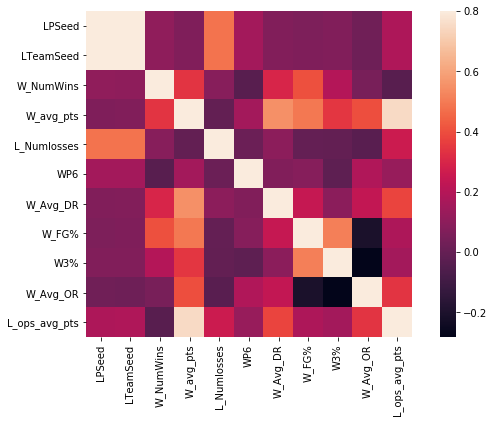

In [157]:
high_corr = testd[['LPSeed', 'LTeamSeed', 'W_NumWins', "W_avg_pts",
                          'L_Numlosses', 'WP6', 'W_Avg_DR', 'W_FG%', 'W3%', "W_Avg_OR", "L_ops_avg_pts"]]
corr_mat = high_corr.corr()
f, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(corr_mat,vmax=.8,square=True)

## Some observations: 
there appears to be alot of auto correlation in our data which is not surprising.  It is pretty obvious that Feild goal percentage will be correlated with three point feild goal percentage, I was surpised to see that the number of losses for a losing team was positively correlated with their seed, which was cool. It was also very interesting to note that the Number of wins a team has was not correlated at all to if they were in a power conference, or their three point percentage.  Part of it may be that teams not in power conferences do not compeate against as good of competition so their stats are artificially high, but that was a little surprising for me. 

Another interesting note, that the defensive rebounds and your regular season scoring average are very highly correlated as well.  Makes sense

for the negatively correlated variables, it was interesting to see the correlation between seeding, the winning teams number of losses and if the losing team was not P5.  Very interesting there. 

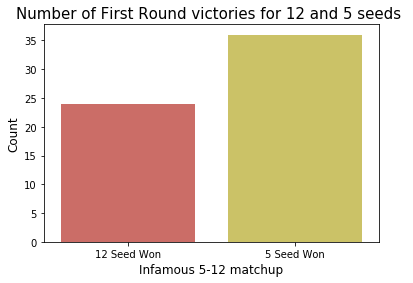

In [158]:
#looking at my 5 12 matchups - famous for first round upsets 

#looking at my 5 12 matchups - famous for first round upsets 


upsets = testd.loc[((testd['WTeamSeed'] == 5) | (testd['WTeamSeed']==12)) & (testd['round_64']==1)]
sns.countplot(upsets['target'])
plt.xlabel('Infamous 5-12 matchup', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of First Round victories for 12 and 5 seeds ', fontsize=15)
plt.xticks([0, 1],
           ['12 Seed Won', '5 Seed Won'])
plt.show()

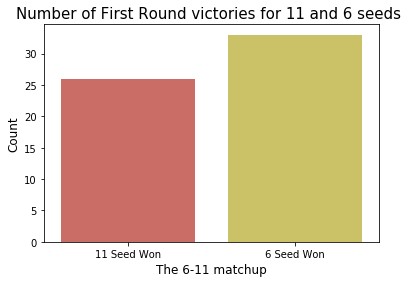

In [159]:
#looking at my 6 11 matchups - famous for first round upsets 


upsets = testd.loc[((testd['WTeamSeed'] == 6) | (testd['WTeamSeed']==11)) & (testd['round_64']==1)]
sns.countplot(upsets['target'])
plt.xlabel('The 6-11 matchup', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of First Round victories for 11 and 6 seeds ', fontsize=15)
plt.xticks([0, 1],
           ['11 Seed Won', '6 Seed Won'])
plt.show()

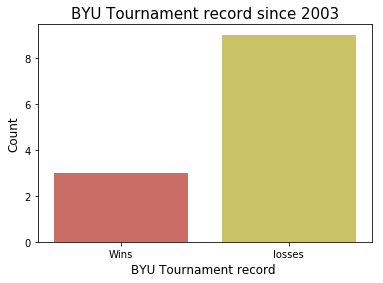

In [160]:
BYU = testd.loc[((testd['WTeamID'] == 1140) | (testd['LTeamID']==1140))]
sns.countplot(BYU['target'])
plt.xlabel('BYU Tournament record ', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('BYU Tournament record since 2003', fontsize=15)
plt.xticks([0, 1],
           ['Wins', 'losses'])
plt.show()

In [161]:
#print(testd.columns)

In [162]:
index = 0
for i in testd.columns:
    print(i,index)
    index+=1


Season 0
LTeamID 1
L_Numlosses 2
L_NumWins 3
W_NumLoss 4
LP6 5
WP6 6
LTeamSeed 7
WTeamSeed 8
LPSeed 9
WPSeed 10
LTeam 11
WTeam 12
DayNum 13
WTeamID 14
WConfChamp 15
LConfChamp 16
W_NumWins 17
power_seed_diff 18
target 19
W_FG% 20
L_FG% 21
WFT% 22
LFT% 23
W3% 24
WFGM3 25
WFGA3 26
LFGM3 27
LFGA3 28
L3% 29
W_Avg_DR 30
L_Avg_DR 31
W_Avg_OR 32
L_Avg_OR 33
W_op_avg_to 34
L_op_avg_to 35
W_ops_avg_pts 36
L_ops_avg_pts 37
W_avg_pts 38
L_avg_pts 39
tourney_round 40
round_64 41
round_32 42
sweet_16 43
eleit_8 44
final_4 45
champ 46


In [163]:
td = testd.values
#print(td[0:10])
for i in range(0,len(td)):
    if td[i][14] < td[i][1]:
        td[i][1], td[i][2], td[i][14], td[i][4] = td[i][14], td[i][4], td[i][1], td[i][2]
        td[i][3], td[i][5], td[i][17], td[i][6] = td[i][17], td[i][6], td[i][3], td[i][5]
        td[i][7], td[i][9], td[i][8], td[i][10] = td[i][8], td[i][10], td[i][7], td[i][9]
        td[i][11], td[i][15], td[i][12], td[i][16] = td[i][12], td[i][16], td[i][11], td[i][15]

        td[i][21], td[i][23], td[i][20], td[i][22] = td[i][20], td[i][22], td[i][21], td[i][23]
        td[i][29], td[i][27], td[i][24], td[i][25] = td[i][24], td[i][25], td[i][29], td[i][27]
        td[i][28], td[i][31], td[i][26], td[i][30] = td[i][26], td[i][30], td[i][28], td[i][31]
        td[i][33], td[i][32], td[i][34], td[i][35] = td[i][32], td[i][33], td[i][35], td[i][34]
        td[i][36], td[i][37], td[i][38], td[i][39] = td[i][37], td[i][36], td[i][39], td[i][38]
        
        #print('change')       
testd = pd.DataFrame({'Season':td[:,0], 'LTeamID':td[:,1], 'L_Numlosses':td[:,2], 'L_NumWins':td[:,3], 'W_NumLoss':td[:,4], 'LP6':td[:,5],
       'WP6':td[:,6], 'LTeamSeed':td[:,7], 'WTeamSeed':td[:,8], 'LPSeed':td[:,9], 'WPSeed':td[:,10], 'LTeam':td[:,11], 'WTeam':td[:,12],
       'DayNum':td[:,13], 'WTeamID':td[:,14], 'WConfChamp':td[:,15], 'LConfChamp':td[:,16], 'W_NumWins':td[:,17],
       'power_seed_diff':td[:,18], 'target':td[:,19], 'W_FG%':td[:,20], 'L_FG%':td[:,21], 'WFT%':td[:,22], 'LFT%':td[:,23], 'W3%':td[:,24],
       'WFGM3':td[:,25], 'WFGA3':td[:,26], 'LFGM3':td[:,27], 'LFGA3':td[:,28], 'L3%':td[:,29], 'W_Avg_DR':td[:,30], 'L_Avg_DR':td[:,31],
       'W_Avg_OR':td[:,32],'L_Avg_OR':td[:,33],'W_op_avg_to':td[:,34], 'L_op_avg_to':td[:,35],  'W_ops_avg_pts':td[:,36], 'L_ops_avg_pts':td[:,37],'W_avg_pts':td[:,38], 'L_avg_pts':td[:,39], 'tourney_round':td[:,40],
       'round_64':td[:,41], 'round_32':td[:,42], 'sweet_16':td[:,43], 'eleit_8':td[:,44], 'final_4':td[:,45], 'champ':td[:,46]})

In [164]:
df1 = testd[testd["Season"] == 2003]
df2 = testd[testd["Season"] == 2004]
df3 = testd[testd["Season"] == 2005]
df4 = testd[testd["Season"] == 2006]
df5 = testd[testd["Season"] == 2007]
df6 = testd[testd["Season"] == 2008]
df7 = testd[testd["Season"] == 2009]
df8 = testd[testd["Season"] == 2010]
df9 = testd[testd["Season"] == 2011]
df10 = testd[testd["Season"] == 2012]
df11 = testd[testd["Season"] == 2013]
df12 = testd[testd["Season"] == 2014]
df13 = testd[testd["Season"] == 2015]
df14 = testd[testd["Season"] == 2016]
df15 = testd[testd["Season"] == 2017]

trainlist = [df1,df2,df4,df5,df7,df8,df10,df11,df13,df14]
testlist = [df3,df6,df9,df12,df15]
train = pd.concat(trainlist)
test = pd.concat(testlist)
val = pd.concat(trainlist + testlist)
y_val = val.target
y_val = y_val.astype('int')
val = val.drop(axis=1, columns = ['target','LTeam','WTeam', 'power_seed_diff','tourney_round','DayNum','WFGM3','WFGA3','LFGM3','LFGA3'])

y_train = train.target
y_train=y_train.astype('int')
y_test = test.target
y_test=y_test.astype('int')
x_train = train.drop(axis = 1, columns = ['target','LTeam','WTeam', 'power_seed_diff','tourney_round','DayNum','WFGM3','WFGA3','LFGM3','LFGA3'])
test = test.drop(axis=1, columns = ['target','LTeam','WTeam', 'power_seed_diff','tourney_round','DayNum','WFGM3','WFGA3','LFGM3','LFGA3'])

In [165]:
param_dictionary = {'class_weight':['balanced'], 'max_depth':[5], 'n_estimators':[300]}
clf = RandomForestClassifier()
gs = GridSearchCV(clf, param_dictionary, scoring = 'f1', verbose = 2)
gs.fit(x_train, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] class_weight=balanced, max_depth=5, n_estimators=300 ............


C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=balanced, max_depth=5, n_estimators=300, total=   0.2s
[CV] class_weight=balanced, max_depth=5, n_estimators=300 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  class_weight=balanced, max_depth=5, n_estimators=300, total=   0.2s
[CV] class_weight=balanced, max_depth=5, n_estimators=300 ............
[CV]  class_weight=balanced, max_depth=5, n_estimators=300, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'class_weight': ['balanced'], 'max_depth': [5], 'n_estimators': [300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [166]:
gs.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.28471788]),
 'std_fit_time': array([0.02722107]),
 'mean_score_time': array([0.01949573]),
 'std_score_time': array([0.0010212]),
 'param_class_weight': masked_array(data=['balanced'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[300],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 300}],
 'split0_test_score': array([0.79487179]),
 'split1_test_score': array([0.75254237]),
 'split2_test_score': array([0.74647887]),
 'mean_test_score': array([0.76466001]),
 'std_test_score': array([0.02153121]),
 'rank_test_score': array([1]),
 'split0_train_score': array([0.94366197]),
 'split1_train_score': array([0.94885362]),
 'split2_train_score': array([0.90073529]),
 'm

In [167]:
print(x_train.columns)

Index(['Season', 'LTeamID', 'L_Numlosses', 'L_NumWins', 'W_NumLoss', 'LP6',
       'WP6', 'LTeamSeed', 'WTeamSeed', 'LPSeed', 'WPSeed', 'WTeamID',
       'WConfChamp', 'LConfChamp', 'W_NumWins', 'W_FG%', 'L_FG%', 'WFT%',
       'LFT%', 'W3%', 'L3%', 'W_Avg_DR', 'L_Avg_DR', 'W_Avg_OR', 'L_Avg_OR',
       'W_op_avg_to', 'L_op_avg_to', 'W_ops_avg_pts', 'L_ops_avg_pts',
       'W_avg_pts', 'L_avg_pts', 'round_64', 'round_32', 'sweet_16', 'eleit_8',
       'final_4', 'champ'],
      dtype='object')


In [168]:
gs.best_estimator_.feature_importances_

array([0.01121782, 0.02584433, 0.02193046, 0.02010869, 0.01901141,
       0.00762452, 0.00322448, 0.07574576, 0.0451766 , 0.09359421,
       0.0568644 , 0.034555  , 0.01777671, 0.02075944, 0.02676176,
       0.04012592, 0.02216899, 0.02412324, 0.02763023, 0.03448973,
       0.02252757, 0.0286024 , 0.02577741, 0.02235832, 0.02019243,
       0.02845002, 0.02679167, 0.05518214, 0.04480432, 0.02740313,
       0.03202976, 0.00167101, 0.00155449, 0.00766971, 0.02497867,
       0.00036182, 0.00091143])

In [169]:
tpredictions = gs.predict(test)
s = f1_score(y_test, tpredictions)
print(s)
print(tpredictions)
print(sum(tpredictions)/len(tpredictions))

0.7383863080684596
[0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1
 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1
 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 0]
0.6096774193548387


In [170]:
print("Best Params: {}".format(gs.best_params_))
print("\nClassification Report:")
print(classification_report(y_test, gs.predict(test)))

Best Params: {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 300}

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.58      0.49        90
           1       0.80      0.69      0.74       220

   micro avg       0.65      0.65      0.65       310
   macro avg       0.61      0.63      0.62       310
weighted avg       0.69      0.65      0.67       310



### RUNNING THE MODEL WITHOUT SEEDING ###

In [171]:
x_train2 = x_train.drop(axis = 1, columns = ['LTeamSeed','WTeamSeed','LPSeed','WPSeed'])
test2 = test.drop(axis = 1, columns = ['LTeamSeed','WTeamSeed','LPSeed','WPSeed'])

param_dictionary = {'class_weight':['balanced'], 'max_depth':[5], 'n_estimators':[300]}
clf2 = RandomForestClassifier()
gs2 = GridSearchCV(clf2, param_dictionary, scoring = 'f1', verbose = 2)
gs2.fit(x_train2, y_train)


C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] class_weight=balanced, max_depth=5, n_estimators=300 ............
[CV]  class_weight=balanced, max_depth=5, n_estimators=300, total=   0.2s
[CV] class_weight=balanced, max_depth=5, n_estimators=300 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  class_weight=balanced, max_depth=5, n_estimators=300, total=   0.2s
[CV] class_weight=balanced, max_depth=5, n_estimators=300 ............
[CV]  class_weight=balanced, max_depth=5, n_estimators=300, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'class_weight': ['balanced'], 'max_depth': [5], 'n_estimators': [300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [172]:
gs2.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.25741768]),
 'std_fit_time': array([0.02187871]),
 'mean_score_time': array([0.01885104]),
 'std_score_time': array([0.00069948]),
 'param_class_weight': masked_array(data=['balanced'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[300],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 300}],
 'split0_test_score': array([0.8]),
 'split1_test_score': array([0.79012346]),
 'split2_test_score': array([0.77399381]),
 'mean_test_score': array([0.78806152]),
 'std_test_score': array([0.01071263]),
 'rank_test_score': array([1]),
 'split0_train_score': array([0.97123519]),
 'split1_train_score': array([0.96446701]),
 'split2_train_score': array([0.97278912]),
 'mean_tr

In [173]:
print(x_train2.columns)
gs.best_estimator_.feature_importances_

Index(['Season', 'LTeamID', 'L_Numlosses', 'L_NumWins', 'W_NumLoss', 'LP6',
       'WP6', 'WTeamID', 'WConfChamp', 'LConfChamp', 'W_NumWins', 'W_FG%',
       'L_FG%', 'WFT%', 'LFT%', 'W3%', 'L3%', 'W_Avg_DR', 'L_Avg_DR',
       'W_Avg_OR', 'L_Avg_OR', 'W_op_avg_to', 'L_op_avg_to', 'W_ops_avg_pts',
       'L_ops_avg_pts', 'W_avg_pts', 'L_avg_pts', 'round_64', 'round_32',
       'sweet_16', 'eleit_8', 'final_4', 'champ'],
      dtype='object')


array([0.01121782, 0.02584433, 0.02193046, 0.02010869, 0.01901141,
       0.00762452, 0.00322448, 0.07574576, 0.0451766 , 0.09359421,
       0.0568644 , 0.034555  , 0.01777671, 0.02075944, 0.02676176,
       0.04012592, 0.02216899, 0.02412324, 0.02763023, 0.03448973,
       0.02252757, 0.0286024 , 0.02577741, 0.02235832, 0.02019243,
       0.02845002, 0.02679167, 0.05518214, 0.04480432, 0.02740313,
       0.03202976, 0.00167101, 0.00155449, 0.00766971, 0.02497867,
       0.00036182, 0.00091143])

In [174]:
tpredictions2 = gs2.predict(test2)
s = f1_score(y_test, tpredictions2)
print(s)
print(tpredictions2)
print(sum(tpredictions2)/len(tpredictions2))

0.7747368421052631
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0]
0.8225806451612904


In [175]:
print("Best Params: {}".format(gs2.best_params_))
print("\nClassification Report:")
print(classification_report(y_test, gs2.predict(test2)))

Best Params: {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 300}

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.21      0.26        90
           1       0.72      0.84      0.77       220

   micro avg       0.65      0.65      0.65       310
   macro avg       0.53      0.52      0.52       310
weighted avg       0.61      0.65      0.63       310



### GRADIENT BOOSTING AND OVER SAMPLING ###

In [176]:
clfx = GradientBoostingClassifier()
gsx = GridSearchCV(clfx, {"learning_rate": [.01], "n_estimators": [300], 
                                'max_depth': [1,3,5]}, scoring='f1')
gsx.fit(x_train, y_train)

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01], 'n_estimators': [300], 'max_depth': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [177]:
gsx.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.11572393, 0.29181298, 0.59238831]),
 'std_fit_time': array([0.00686316, 0.02476869, 0.0473536 ]),
 'mean_score_time': array([0.00150188, 0.00265781, 0.00314156]),
 'std_score_time': array([2.05227793e-05, 9.25229600e-04, 2.33549737e-04]),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 3, 5],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[300, 300, 300],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 300},
  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300},
  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}],
 'split0_test_score': array([0.82913165, 0.82621083, 0.82758621]),
 'split1_test

In [178]:
print("Best Params: {}".format(gsx.best_params_))
print("\nClassification Report:")
print(classification_report(y_test, gsx.predict(test)))

Best Params: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 300}

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.71      1.00      0.83       220

   micro avg       0.71      0.71      0.71       310
   macro avg       0.35      0.50      0.42       310
weighted avg       0.50      0.71      0.59       310



C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Over Sampling:

In [179]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_sample(x_train, y_train)


In [180]:
y_resampled.mean()

0.5

In [181]:
clfg = GradientBoostingClassifier()
gsg = GridSearchCV(clfg, {"learning_rate": [.01], "n_estimators": [500], 
                                'max_depth': [5]}, scoring='f1')
gsg.fit(x_resampled, y_resampled)

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01], 'n_estimators': [500], 'max_depth': [5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [182]:
gsg.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([1.20128234]),
 'std_fit_time': array([0.04181478]),
 'mean_score_time': array([0.00464948]),
 'std_score_time': array([0.00095399]),
 'param_learning_rate': masked_array(data=[0.01],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[500],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}],
 'split0_test_score': array([0.16]),
 'split1_test_score': array([0.56140351]),
 'split2_test_score': array([0.1375]),
 'mean_test_score': array([0.28630117]),
 'std_test_score': array([0.19474348]),
 'rank_test_score': array([1]),
 'split0_train_score': array([0.99831933]),
 'split1_train_score': array([0.99831933]),
 'split2_train_score': array([0.99832496]),
 'mean_train_score': a

In [183]:
print("Best Params: {}".format(gsg.best_params_))
print("\nClassification Report:")
print(classification_report(y_test, gsg.predict(test)))

Best Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.39      0.42        90
           1       0.76      0.80      0.78       220

   micro avg       0.68      0.68      0.68       310
   macro avg       0.61      0.60      0.60       310
weighted avg       0.67      0.68      0.68       310



In [184]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    f, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True)
    plt.title('Confusion Matrix', fontsize=15)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    plt.xticks([0, 1],
           ['Upset(0)','No Upset (1)'])
    plt.yticks([0, 1],
           ['Upset(0)','No Upset (1)'], rotation = 0)



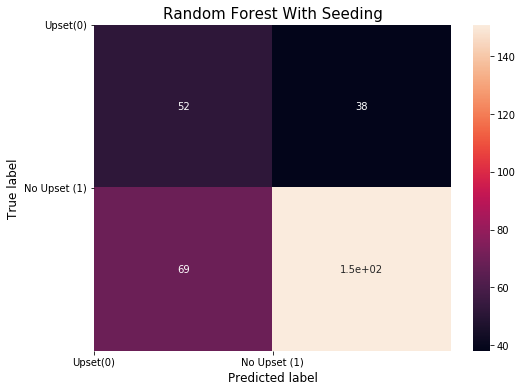

In [261]:
plot_confusion_matrix(y_test, gs.predict(test))
plt.title("Random Forest With Seeding", fontsize = 15)
plt.show()
#THIS IS THE MATRIX OF OUR RANDOM SAMPLE THAT USES SEEDING

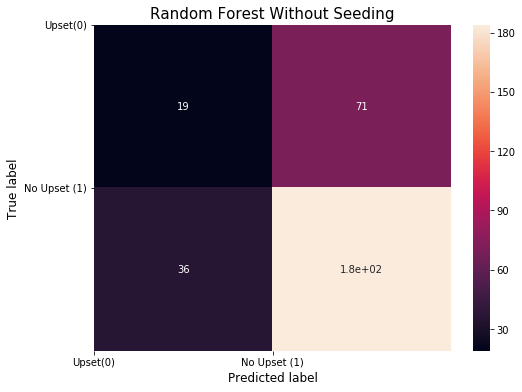

In [259]:
plot_confusion_matrix(y_test, gs2.predict(test2))

plt.title("Random Forest Without Seeding", fontsize = 15)
plt.show()
#THIS IS THE MATRIX OF OUR RANDOM FOREST THAT DOES NOT USES SEEDING

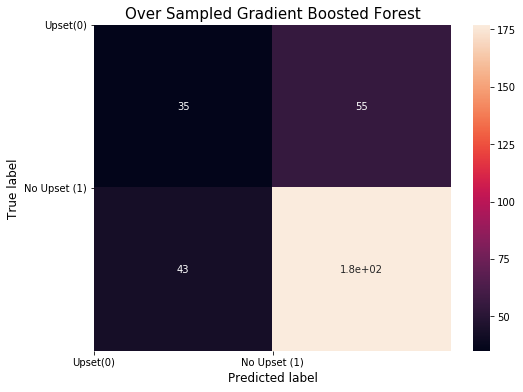

In [258]:
plot_confusion_matrix(y_test, gsg.predict(test))

plt.title("Over Sampled Gradient Boosted Forest", fontsize = 15)
plt.show()
#THIS IS THE MATRIX OF OUR OVERSAMPLED GRADIENTBOOSTED FOREST

   # Creating my 2019 testing data to run the true test on. 

In [188]:
## reading in data 

reg2019 = pd.read_csv("Prelim2019_RegularSeasonDetailedResults.csv")
reg2019.head()
reg2019 = reg2019[reg2019["Season"] ==2019]
reg2019.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
82041,2019,1,1104,82,1380,62,H,0,27,55,...,17,17,30,11,20,8,15,7,2,28
82042,2019,1,1113,102,1168,94,H,0,33,78,...,24,19,26,7,35,7,17,7,3,36
82043,2019,1,1119,73,1265,69,H,0,22,51,...,15,12,24,9,27,8,12,4,0,23
82044,2019,1,1120,101,1375,58,H,0,38,74,...,22,17,22,8,19,9,22,4,5,17
82045,2019,1,1123,86,1232,69,H,0,32,65,...,12,11,18,18,20,11,11,6,5,20


In [189]:
conf2019 = pd.read_csv("PreLim2019_ConferenceTourneyGames.csv")
conf2019.head()

,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2001,a_sun,121,1194,1144
1,2001,a_sun,121,1416,1240
2,2001,a_sun,122,1209,1194
3,2001,a_sun,122,1359,1239
4,2001,a_sun,122,1391,1273


In [190]:
#tournament data frame set up 

data = pd.read_csv("2019FristRoundPS.csv")
data.head()

,LTeamID,LTeam,WTeamID,WTeam,round_64,round_32,sweet_16,eleit_8,final_4,champ,Season,LPSeed,LTeamSeed,WPSeed,WTeamSeed
0,1140,BYU,1295,N Dakota St,1,0,0,0,0,0,2019,1,1,64,16
1,1416,UCF,1433,VA Commonwealth,1,0,0,0,0,0,2019,32,8,36,9
2,1251,Liberty,1280,Mississippi St,1,0,0,0,0,0,2019,48,12,20,5
3,1387,St Louis,1439,Virginia Tech,1,0,0,0,0,0,2019,52,13,16,4
4,1125,Belmont,1268,Maryland,1,0,0,0,0,0,2019,44,11,24,6


In [191]:
data =  pd.merge(conf, data, left_on = ["TeamID", "Season"], right_on = ["WTeamID", 'Season'])

data.head()

,Season,TeamID,ConfAbbrev,p6,LTeamID,LTeam,WTeamID,WTeam,round_64,round_32,sweet_16,eleit_8,final_4,champ,LPSeed,LTeamSeed,WPSeed,WTeamSeed
0,2019,1433,a_ten,0,1416,UCF,1433,VA Commonwealth,1,0,0,0,0,0,32,8,36,9
1,2019,1222,aac,0,1209,Georgia St,1222,Houston,1,0,0,0,0,0,54,14,10,3
2,2019,1314,acc,1,1233,Iona,1314,North Carolina,1,0,0,0,0,0,62,16,3,1
3,2019,1393,acc,1,1124,Baylor,1393,Syracuse,1,0,0,0,0,0,33,9,29,8
4,2019,1438,acc,1,1205,Gardner Webb,1438,Virginia,1,0,0,0,0,0,63,16,2,1


In [192]:
data = data.rename(columns = {'p6': 'WP6'})
data = data.drop(axis = 1, columns = ["ConfAbbrev", "TeamID"])


data =  pd.merge(conf, data, left_on = ["TeamID", "Season"], right_on = ["LTeamID", 'Season'])
data = data.rename(columns = {'p6': 'LP6'})
data = data.drop(axis = 1, columns = ["ConfAbbrev", "TeamID"])
data.head()

,Season,LP6,WP6,LTeamID,LTeam,WTeamID,WTeam,round_64,round_32,sweet_16,eleit_8,final_4,champ,LPSeed,LTeamSeed,WPSeed,WTeamSeed
0,2019,0,1,1251,Liberty,1280,Mississippi St,1,0,0,0,0,0,48,12,20,5
1,2019,0,1,1387,St Louis,1439,Virginia Tech,1,0,0,0,0,0,52,13,16,4
2,2019,0,1,1153,Cincinnati,1234,Iowa,1,0,0,0,0,0,27,7,39,10
3,2019,0,0,1416,UCF,1433,VA Commonwealth,1,0,0,0,0,0,32,8,36,9
4,2019,1,0,1199,Florida St,1436,Vermont,1,0,0,0,0,0,13,4,49,13


In [193]:
#creating conference champion data 
c2019champ = conf2019.groupby(["Season", "ConfAbbrev"])["DayNum"].max() 
c2019champ = pd.DataFrame(c2019champ)

c2019champ = pd.merge(c2019champ, conf2019, left_on = ["Season", "ConfAbbrev", "DayNum"], right_on = ["Season", "ConfAbbrev", "DayNum"])

In [194]:
#creating 1 to indicate champion 
c2019champ["ConfChamp"] = 1
c2019champ.head()

,Season,ConfAbbrev,DayNum,WTeamID,LTeamID,ConfChamp
0,2001,a_sun,124,1209,1407,1
1,2001,a_ten,131,1396,1269,1
2,2001,acc,132,1181,1314,1
3,2001,aec,131,1220,1174,1
4,2001,big_east,131,1130,1338,1


In [195]:
#merging tables 
data = pd.merge(data, conf_champ, on = ["Season", "WTeamID"], how = "left")
data.head()

,Season,LP6,WP6,LTeamID_x,LTeam,WTeamID,WTeam,round_64,round_32,sweet_16,...,final_4,champ,LPSeed,LTeamSeed,WPSeed,WTeamSeed,ConfAbbrev,DayNum,LTeamID_y,ConfChamp
0,2019,0,1,1251,Liberty,1280,Mississippi St,1,0,0,...,0,0,48,12,20,5,NaN,NaN,NaN,NaN
1,2019,0,1,1387,St Louis,1439,Virginia Tech,1,0,0,...,0,0,52,13,16,4,NaN,NaN,NaN,NaN
2,2019,0,1,1153,Cincinnati,1234,Iowa,1,0,0,...,0,0,27,7,39,10,NaN,NaN,NaN,NaN
3,2019,0,0,1416,UCF,1433,VA Commonwealth,1,0,0,...,0,0,32,8,36,9,NaN,NaN,NaN,NaN
4,2019,1,0,1199,Florida St,1436,Vermont,1,0,0,...,0,0,13,4,49,13,NaN,NaN,NaN,NaN


In [196]:
#cleaning merge 

data = data.drop(axis = 1, columns = ["ConfAbbrev", "DayNum", "LTeamID_y"])
data.loc[data["ConfChamp"].isnull(), "ConfChamp"] = 0
data = data.rename(columns = {'ConfChamp': 'WConfChamp', "LTeamID_x": "LTeamID"})

data.head()

,Season,LP6,WP6,LTeamID,LTeam,WTeamID,WTeam,round_64,round_32,sweet_16,eleit_8,final_4,champ,LPSeed,LTeamSeed,WPSeed,WTeamSeed,WConfChamp
0,2019,0,1,1251,Liberty,1280,Mississippi St,1,0,0,0,0,0,48,12,20,5,0.0
1,2019,0,1,1387,St Louis,1439,Virginia Tech,1,0,0,0,0,0,52,13,16,4,0.0
2,2019,0,1,1153,Cincinnati,1234,Iowa,1,0,0,0,0,0,27,7,39,10,0.0
3,2019,0,0,1416,UCF,1433,VA Commonwealth,1,0,0,0,0,0,32,8,36,9,0.0
4,2019,1,0,1199,Florida St,1436,Vermont,1,0,0,0,0,0,13,4,49,13,0.0


In [197]:
#merging for losing team 

data = pd.merge(data, conf_champ, on = ["Season", "LTeamID"], how = "left")
data.head()

,Season,LP6,WP6,LTeamID,LTeam,WTeamID_x,WTeam,round_64,round_32,sweet_16,...,champ,LPSeed,LTeamSeed,WPSeed,WTeamSeed,WConfChamp,ConfAbbrev,DayNum,WTeamID_y,ConfChamp
0,2019,0,1,1251,Liberty,1280,Mississippi St,1,0,0,...,0,48,12,20,5,0.0,NaN,NaN,NaN,NaN
1,2019,0,1,1387,St Louis,1439,Virginia Tech,1,0,0,...,0,52,13,16,4,0.0,NaN,NaN,NaN,NaN
2,2019,0,1,1153,Cincinnati,1234,Iowa,1,0,0,...,0,27,7,39,10,0.0,NaN,NaN,NaN,NaN
3,2019,0,0,1416,UCF,1433,VA Commonwealth,1,0,0,...,0,32,8,36,9,0.0,NaN,NaN,NaN,NaN
4,2019,1,0,1199,Florida St,1436,Vermont,1,0,0,...,0,13,4,49,13,0.0,NaN,NaN,NaN,NaN


In [198]:
#cleaning merge for conference Champions for both losing and winning teams 
data = data.drop(axis = 1, columns = ["ConfAbbrev", "DayNum", "WTeamID_y"])

data.loc[data["ConfChamp"].isnull(), "ConfChamp"] = 0

data = data.rename(columns = {'ConfChamp': 'LConfChamp', "WTeamID_x": "WTeamID"})
data.head()

,Season,LP6,WP6,LTeamID,LTeam,WTeamID,WTeam,round_64,round_32,sweet_16,eleit_8,final_4,champ,LPSeed,LTeamSeed,WPSeed,WTeamSeed,WConfChamp,LConfChamp
0,2019,0,1,1251,Liberty,1280,Mississippi St,1,0,0,0,0,0,48,12,20,5,0.0,0.0
1,2019,0,1,1387,St Louis,1439,Virginia Tech,1,0,0,0,0,0,52,13,16,4,0.0,0.0
2,2019,0,1,1153,Cincinnati,1234,Iowa,1,0,0,0,0,0,27,7,39,10,0.0,0.0
3,2019,0,0,1416,UCF,1433,VA Commonwealth,1,0,0,0,0,0,32,8,36,9,0.0,0.0
4,2019,1,0,1199,Florida St,1436,Vermont,1,0,0,0,0,0,13,4,49,13,0.0,0.0


###### Creating regular Season record 

In [199]:
#creating regular seaosn record 

reg_WT_wins = reg2019.groupby(["Season", "WTeamID"])["WTeamID"].count() 
reg_WT_wins = pd.DataFrame(reg_WT_wins)
reg_WT_wins.head()


#re name column so we can merge 
reg_WT_wins = reg_WT_wins.rename(columns = {'WTeamID': 'W_NumWins'})
reg_WT_wins.head()



W_NumWins
Season WTeamID           
2019   1101            21
       1102            13
       1103            15
       1104            17
       1105             5

In [200]:
data = pd.merge(data, reg_WT_wins, on = ["Season", "WTeamID"], how = "left")
data.head()

,Season,LP6,WP6,LTeamID,LTeam,WTeamID,WTeam,round_64,round_32,sweet_16,eleit_8,final_4,champ,LPSeed,LTeamSeed,WPSeed,WTeamSeed,WConfChamp,LConfChamp,W_NumWins
0,2019,0,1,1251,Liberty,1280,Mississippi St,1,0,0,0,0,0,48,12,20,5,0.0,0.0,22
1,2019,0,1,1387,St Louis,1439,Virginia Tech,1,0,0,0,0,0,52,13,16,4,0.0,0.0,24
2,2019,0,1,1153,Cincinnati,1234,Iowa,1,0,0,0,0,0,27,7,39,10,0.0,0.0,21
3,2019,0,0,1416,UCF,1433,VA Commonwealth,1,0,0,0,0,0,32,8,36,9,0.0,0.0,25
4,2019,1,0,1199,Florida St,1436,Vermont,1,0,0,0,0,0,13,4,49,13,0.0,0.0,25


In [201]:
#now seeing how many times they lost 

reg_WT_loss = reg2019.groupby(["Season", "LTeamID"])["WTeamID"].count() 
reg_WT_loss = pd.DataFrame(reg_WT_loss)
reg_WT_loss.head()
reg_WT_loss = reg_WT_loss.rename(columns = {'WTeamID': 'W_NumLoss'})
reg_WT_loss.head()


# winning team losing and winning record now in, 

data = pd.merge(reg_WT_loss, data, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])

data.head()

,Season,W_NumLoss,LP6,WP6,LTeamID,LTeam,WTeamID,WTeam,round_64,round_32,...,eleit_8,final_4,champ,LPSeed,LTeamSeed,WPSeed,WTeamSeed,WConfChamp,LConfChamp,W_NumWins
0,2019,3,1,0,1113,Arizona St,1138,Buffalo,1,0,...,0,0,0,41,11,21,6,0.0,0.0,27
1,2019,13,0,0,1211,Gonzaga,1192,F Dickinson,1,0,...,0,0,0,4,1,61,16,0.0,0.0,18
2,2019,2,0,0,1209,Georgia St,1222,Houston,1,0,...,0,0,0,54,14,10,3,0.0,0.0,29
3,2019,10,0,1,1153,Cincinnati,1234,Iowa,1,0,...,0,0,0,27,7,39,10,0.0,0.0,21
4,2019,5,0,1,1101,Abilene Chr,1246,Kentucky,1,0,...,0,0,0,58,15,6,2,0.0,0.0,26


In [202]:
#Now getting Losing Team season record 

# again group by season, teamID how mayn times they won 

reg_LT_wins = reg2019.groupby(["Season", "WTeamID"])["WTeamID"].count() 
reg_LT_wins = pd.DataFrame(reg_LT_wins)
reg_LT_wins = reg_LT_wins.rename(columns = {'WTeamID': 'L_NumWins'})
reg_LT_wins.head()

#and merge 
data = pd.merge(reg_LT_wins, data, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
data.head()

,Season,L_NumWins,W_NumLoss,LP6,WP6,LTeamID,LTeam,WTeamID,WTeam,round_64,...,eleit_8,final_4,champ,LPSeed,LTeamSeed,WPSeed,WTeamSeed,WConfChamp,LConfChamp,W_NumWins
0,2019,21,5,0,1,1101,Abilene Chr,1246,Kentucky,1,...,0,0,0,58,15,6,2,0.0,0.0,26
1,2019,21,3,1,0,1113,Arizona St,1138,Buffalo,1,...,0,0,0,41,11,21,6,0.0,0.0,27
2,2019,21,4,1,0,1120,Auburn,1308,New Mexico St,1,...,0,0,0,18,5,46,12,0.0,0.0,25
3,2019,19,12,1,1,1124,Baylor,1393,Syracuse,1,...,0,0,0,33,9,29,8,0.0,0.0,20
4,2019,25,9,0,1,1125,Belmont,1268,Maryland,1,...,0,0,0,44,11,24,6,0.0,0.0,22


In [203]:
#and coung the losses for the losing team in the regular season 


reg_LT_loss = reg2019.groupby(["Season", "LTeamID"])["WTeamID"].count() 
reg_LT_loss = pd.DataFrame(reg_LT_loss)
reg_LT_loss.head()

reg_LT_loss = reg_LT_loss.rename(columns = {'WTeamID': 'L_Numlosses'})
reg_LT_loss.head()


#merge 

data = pd.merge(reg_LT_loss, data, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,eleit_8,final_4,champ,LPSeed,LTeamSeed,WPSeed,WTeamSeed,WConfChamp,LConfChamp,W_NumWins
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0,0,0,58,15,6,2,0.0,0.0,26
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0,0,0,41,11,21,6,0.0,0.0,27
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0,0,0,18,5,46,12,0.0,0.0,25
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0,0,0,33,9,29,8,0.0,0.0,20
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0,0,0,44,11,24,6,0.0,0.0,22


In [204]:
# creating field goal percengage 


#going into regular season details, grouping by season and WteamID, which will tell me in the games that 
#each team won, how many Feild goals did they attempt, then take the mean of that 

W_season_FGA_in_wins = reg2019.groupby(["Season", "WTeamID"])["WFGA"].mean() 
W_season_FGA_in_wins = pd.DataFrame(W_season_FGA_in_wins)
W_season_FGA_in_wins.head()


# same as above, how many fgs did the winning team make on average when they win 

W_season_FGM_in_wins = reg2019.groupby(["Season", "WTeamID"])["WFGM"].mean() 
W_season_FGM_in_wins = pd.DataFrame(W_season_FGM_in_wins)
W_season_FGM_in_wins.head()


# now for the games that they lost,if a team were to ever go undefeated in the regular season, we would fill in a zero
# but this hasn't happend Since indiana did it in 1976 

L_season_FGM_in_loss = reg2019.groupby(["Season", "LTeamID"])["LFGM"].mean() 
L_season_FGM_in_loss = pd.DataFrame(L_season_FGM_in_loss)
#L_season_FGPM_in_loss = L_season_FGPM_in_loss.rename(columns = {'LTeamID': 'WTeamID'})

L_season_FGM_in_loss.head()


L_season_FGA_in_loss = reg2019.groupby(["Season", "LTeamID"])["LFGA"].mean() 
L_season_FGA_in_loss = pd.DataFrame(L_season_FGA_in_loss)
L_season_FGA_in_loss.head()

LFGA
Season LTeamID           
2019   1101     54.833333
       1102     53.058824
       1103     61.533333
       1104     55.785714
       1105     56.518519

In [205]:
#merging tables to create features 
data = pd.merge(data, W_season_FGM_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
# feild goals made and missed for the winning team, now we need to weight those by record to find their true 
# feild goal percentage 
data = pd.merge(data, L_season_FGM_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])

data["AVG_FGM"] = (data["WFGM"]*data["W_NumWins"] + data["LFGM"]*data["W_NumLoss"])/(data["W_NumWins"]+data["W_NumLoss"])

data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,LPSeed,LTeamSeed,WPSeed,WTeamSeed,WConfChamp,LConfChamp,W_NumWins,WFGM,LFGM,AVG_FGM
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,58,15,6,2,0.0,0.0,26,26.923077,24.000000,26.451613
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,41,11,21,6,0.0,0.0,27,30.629630,27.333333,30.300000
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,18,5,46,12,0.0,0.0,25,27.840000,22.000000,27.034483
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,33,9,29,8,0.0,0.0,20,25.400000,21.166667,23.812500
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,44,11,24,6,0.0,0.0,22,26.409091,23.111111,25.451613


In [206]:
# attempts in wins 
data = pd.merge(data, W_season_FGA_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])


data = pd.merge(data, L_season_FGA_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])


# true average feild goals attempted weighted by wins and losses in the regular season, 

data["AVG_FGA"] = (data["WFGA"]*data["W_NumWins"] + data["LFGA"]*data["W_NumLoss"])/(data["W_NumWins"]+data["W_NumLoss"])

data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,WTeamSeed,WConfChamp,LConfChamp,W_NumWins,WFGM,LFGM,AVG_FGM,WFGA,LFGA,AVG_FGA
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,2,0.0,0.0,26,26.923077,24.000000,26.451613,55.000000,58.000000,55.483871
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,6,0.0,0.0,27,30.629630,27.333333,30.300000,65.888889,65.000000,65.800000
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,12,0.0,0.0,25,27.840000,22.000000,27.034483,58.760000,61.250000,59.103448
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,8,0.0,0.0,20,25.400000,21.166667,23.812500,56.200000,56.666667,56.375000
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,6,0.0,0.0,22,26.409091,23.111111,25.451613,55.954545,55.111111,55.709677


In [207]:
#these columns now tell me the same thing, so I wil drop them 
data = data.drop(axis = 1, columns = ["WFGM", "LFGM", "WFGA", "LFGA"])
data.head()


# feature for Winning team regular season fg% now created -- wow that was more work than I thought it would be 
data["W_FG%"] = data["AVG_FGM"] / data["AVG_FGA"]
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,LPSeed,LTeamSeed,WPSeed,WTeamSeed,WConfChamp,LConfChamp,W_NumWins,AVG_FGM,AVG_FGA,W_FG%
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,58,15,6,2,0.0,0.0,26,26.451613,55.483871,0.476744
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,41,11,21,6,0.0,0.0,27,30.300000,65.800000,0.460486
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,18,5,46,12,0.0,0.0,25,27.034483,59.103448,0.457410
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,33,9,29,8,0.0,0.0,20,23.812500,56.375000,0.422395
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,44,11,24,6,0.0,0.0,22,25.451613,55.709677,0.456862


In [208]:
## merging table to get the average winning field goal percentage for the team that lost in march

data = pd.merge(data, W_season_FGM_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
data.head()

# going to re name this so I don't get this mixed up 
# Losing teams Winning FG Made 
data = data.rename(columns = {'WFGM': 'LWFGM'})
data.head()



#creating the losing team in march regular season fgm for when they lost 
data = pd.merge(data, L_season_FGM_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,WPSeed,WTeamSeed,WConfChamp,LConfChamp,W_NumWins,AVG_FGM,AVG_FGA,W_FG%,LWFGM,LFGM
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,6,2,0.0,0.0,26,26.451613,55.483871,0.476744,25.952381,23.000000
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,21,6,0.0,0.0,27,30.300000,65.800000,0.460486,28.142857,23.111111
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,46,12,0.0,0.0,25,27.034483,59.103448,0.457410,28.619048,24.333333
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,29,8,0.0,0.0,20,23.812500,56.375000,0.422395,26.421053,24.083333
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,24,6,0.0,0.0,22,25.451613,55.709677,0.456862,32.440000,27.800000


In [209]:
#Losing team feild goal attempts in losses 

data = pd.merge(data, L_season_FGA_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
data.head()

# losing teams feild goal percentage in wins 

L_season_FGA_in_wins = reg2019.groupby(["Season", "WTeamID"])["WFGA"].mean() 
L_season_FGA_in_wins = pd.DataFrame(L_season_FGA_in_wins)

L_season_FGA_in_wins = L_season_FGA_in_wins.rename(columns = {'WFGA': 'LWFGA'})
L_season_FGA_in_wins.head()

#creating that last feature to then be able to create the true feild goal percentage for the losing team 

data = pd.merge(data, L_season_FGA_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
data.head()


,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,WConfChamp,LConfChamp,W_NumWins,AVG_FGM,AVG_FGA,W_FG%,LWFGM,LFGM,LFGA,LWFGA
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.0,0.0,26,26.451613,55.483871,0.476744,25.952381,23.000000,54.833333,55.476190
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.0,0.0,27,30.300000,65.800000,0.460486,28.142857,23.111111,62.666667,58.238095
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.0,0.0,25,27.034483,59.103448,0.457410,28.619048,24.333333,59.444444,61.619048
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.0,0.0,20,23.812500,56.375000,0.422395,26.421053,24.083333,58.750000,57.368421
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.0,0.0,22,25.451613,55.709677,0.456862,32.440000,27.800000,69.800000,62.520000


In [210]:
data.L_Numlosses.head()

0     6
1     9
2     9
3    12
4     5
Name: L_Numlosses, dtype: int64

In [211]:

data["L_FG%"] = ( (data["LWFGM"]*data["L_NumWins"]+data["LFGM"]*data["L_Numlosses"]) /( data["LWFGA"]*data["L_NumWins"] + data["LFGA"]*data["L_Numlosses"]) ) 



#because we do not want to over fit, and there is't really any new
#information gained from columns that give the output of our FG% 
#averages, we will drop these from our data set. 

data = data.drop(axis = 1, columns = ["AVG_FGM", "AVG_FGA", "LWFGM", "LFGM", "LFGA", "LWFGA"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,champ,LPSeed,LTeamSeed,WPSeed,WTeamSeed,WConfChamp,LConfChamp,W_NumWins,W_FG%,L_FG%
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0,58,15,6,2,0.0,0.0,26,0.476744,0.457162
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0,41,11,21,6,0.0,0.0,27,0.460486,0.447118
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0,18,5,46,12,0.0,0.0,25,0.457410,0.448332
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0,33,9,29,8,0.0,0.0,20,0.422395,0.440669
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0,44,11,24,6,0.0,0.0,22,0.456862,0.496862


In [212]:
### Creating free throw percentage

#again using regular season stats, grouping by WTeamID, taking the mean of 
# made free throws of games won 

W_season_FTM_in_wins = reg2019.groupby(["Season", "WTeamID"])["WFTM"].mean() 
W_season_FTM_in_wins = pd.DataFrame(W_season_FTM_in_wins)
W_season_FTM_in_wins.head()

# and the average attempts for games won 

W_season_FTA_in_wins = reg2019.groupby(["Season", "WTeamID"])["WFTA"].mean() 
W_season_FTA_in_wins = pd.DataFrame(W_season_FTA_in_wins)
W_season_FTA_in_wins.head()

# average number of attempts when lost 

L_season_FTA_in_loss = reg2019.groupby(["Season", "LTeamID"])["LFTA"].mean() 
L_season_FTA_in_loss = pd.DataFrame(L_season_FTA_in_loss)
L_season_FTA_in_loss.head()

# average made free throws when lost 

L_season_FTM_in_loss = reg2019.groupby(["Season", "LTeamID"])["LFTM"].mean() 
L_season_FTM_in_loss = pd.DataFrame(L_season_FTM_in_loss)
L_season_FTM_in_loss.head()

LFTM
Season LTeamID           
2019   1101     12.166667
       1102      9.647059
       1103     10.666667
       1104     11.642857
       1105      8.333333

In [213]:

#merging with FTM from winning teams onto the winning team 

data = pd.merge(data, W_season_FTM_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])

#re-naiming the column so I don't get lost, Wining team Winning Free Throws Made 
data = data.rename(columns = {'WFTM': 'WWFTM'})
data.head()

# now getting the attempts from winning games in regular season

data = pd.merge(data, W_season_FTA_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])

data.head()

# makes from losses for winning team 
data = pd.merge(data, L_season_FTM_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])

#attempts from losses for winning team 
data = pd.merge(data, L_season_FTA_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,WTeamSeed,WConfChamp,LConfChamp,W_NumWins,W_FG%,L_FG%,WWFTM,WFTA,LFTM,LFTA
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,2,0.0,0.0,26,0.476744,0.457162,17.423077,23.423077,20.200000,27.400000
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,6,0.0,0.0,27,0.460486,0.447118,14.185185,20.555556,17.000000,25.000000
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,12,0.0,0.0,25,0.457410,0.448332,13.720000,20.240000,14.750000,23.000000
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,8,0.0,0.0,20,0.422395,0.440669,14.450000,20.350000,13.583333,21.166667
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,6,0.0,0.0,22,0.456862,0.496862,15.090909,19.954545,9.555556,13.555556


In [214]:
#creating feature for winning teams FT%
data["WFT%"] = (data["WWFTM"]*data["W_NumWins"] + data["LFTM"]*data["W_NumLoss"])/(data["W_NumWins"]*data["WFTA"]+data["W_NumLoss"]*data["LFTA"])

data.head()

#dropping columns for wining team 

data = data.drop(axis = 1, columns = ["WWFTM", "WFTA", "LFTM", "LFTA"])

In [215]:
# now doing the same but for losing teams in the regular season. 
#games where the losing team in march won in the regular season, mean of 
# FGA and FGM 
L_season_FTA_in_wins = reg2019.groupby(["Season", "WTeamID"])["WFTA"].mean() 
L_season_FTA_in_wins = pd.DataFrame(L_season_FTA_in_wins)

L_season_FTM_in_wins = reg2019.groupby(["Season", "WTeamID"])["WFTM"].mean() 
L_season_FTM_in_wins = pd.DataFrame(L_season_FTM_in_wins)

L_season_FTM_in_wins.head()


#games where the losing team in march lost in the regular season, mean of 
# FGA and FGM 

L_season_FTA_in_loss = reg2019.groupby(["Season", "LTeamID"])["LFTA"].mean() 
L_season_FTA_in_loss = pd.DataFrame(L_season_FTA_in_loss)

L_season_FTM_in_loss = reg2019.groupby(["Season", "LTeamID"])["LFTM"].mean() 
L_season_FTM_in_loss = pd.DataFrame(L_season_FTM_in_loss)

L_season_FTM_in_loss.head()

#merging with FTM from losing teams onto the winning team 

data = pd.merge(data, L_season_FTA_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
data = pd.merge(data, L_season_FTM_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
data.head()

data = data.rename(columns = {'WFTM': 'LWFTM', "WFTA":"LWFTA"})
data.head()

#now for games they lost 
data = pd.merge(data, L_season_FTM_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
data = pd.merge(data, L_season_FTA_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,WConfChamp,LConfChamp,W_NumWins,W_FG%,L_FG%,WFT%,LWFTA,LWFTM,LFTM,LFTA
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.0,0.0,26,0.476744,0.457162,0.742627,19.476190,14.095238,12.166667,17.000000
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.0,0.0,27,0.460486,0.447118,0.688889,26.428571,17.904762,15.555556,24.111111
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.0,0.0,25,0.457410,0.448332,0.672241,19.857143,14.047619,12.111111,17.111111
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.0,0.0,20,0.422395,0.440669,0.683812,19.052632,13.105263,12.583333,19.333333
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.0,0.0,22,0.456862,0.496862,0.745098,18.800000,13.680000,10.600000,13.400000


In [216]:
#creating total free throw percentage for losing team 

data["LFT%"] = (data["LWFTM"]*data["L_NumWins"] + data["LFTM"]*data["L_Numlosses"])/(data["LWFTA"]*data["L_NumWins"] + data["LFTA"]*data["L_Numlosses"])
data.head()
data = data.drop(axis = 1, columns = ["LWFTA", "LWFTM", "LFTM", "LFTA"])

In [217]:
#three point stats 

#grouping by season and team id for 3point feild goals 

W_season_3PM_in_wins = reg2019.groupby(["Season", "WTeamID"])["WFGM3"].mean() 
W_season_3PM_in_wins = pd.DataFrame(W_season_3PM_in_wins)

W_season_3PA_in_wins = reg2019.groupby(["Season", "WTeamID"])["WFGA3"].mean() 
W_season_3PA_in_wins = pd.DataFrame(W_season_3PA_in_wins)

W_season_3PA_in_wins.head()


#winning team in march averages in regular season losses 
W_season_3PM_in_loss = reg2019.groupby(["Season", "LTeamID"])["LFGM3"].mean() 
W_season_3PM_in_loss = pd.DataFrame(W_season_3PM_in_loss)

W_season_3PA_in_loss = reg2019.groupby(["Season", "LTeamID"])["LFGA3"].mean() 
W_season_3PA_in_loss = pd.DataFrame(W_season_3PA_in_loss)

W_season_3PA_in_loss.head()


#merging winning teams with winning games 

data = pd.merge(data, W_season_3PM_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
data = pd.merge(data, W_season_3PA_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
data.head()


#merging 
data = pd.merge(data, W_season_3PM_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
data = pd.merge(data, W_season_3PA_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
data.head()


#create feature for winning team
data["W3%"] = (data["WFGM3"]*data["W_NumWins"]+data["LFGM3"]*data["W_NumLoss"])/(data["WFGA3"]*data["W_NumWins"]+data["LFGA3"]*data["W_NumLoss"])
data = data.drop(axis = 1, columns = ["WFGM3", "WFGA3", "LFGA3", "LFGM3"])
data.head()


,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,WPSeed,WTeamSeed,WConfChamp,LConfChamp,W_NumWins,W_FG%,L_FG%,WFT%,LFT%,W3%
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,6,2,0.0,0.0,26,0.476744,0.457162,0.742627,0.722114,0.358925
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,21,6,0.0,0.0,27,0.460486,0.447118,0.688889,0.668394,0.340302
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,46,12,0.0,0.0,25,0.457410,0.448332,0.672241,0.707531,0.335045
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,29,8,0.0,0.0,20,0.422395,0.440669,0.683812,0.673401,0.326873
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,24,6,0.0,0.0,22,0.456862,0.496862,0.745098,0.735568,0.354788


In [218]:

#Now calculating 3P% for losing team 
# start by grouping by season again and by the games that team won 
L_season_3PM_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WFGM3"].mean() 
L_season_3PM_in_wins = pd.DataFrame(L_season_3PM_in_wins)

L_season_3PA_in_wins = reg_deets.groupby(["Season", "WTeamID"])["WFGA3"].mean() 
L_season_3PA_in_wins = pd.DataFrame(L_season_3PA_in_wins)

L_season_3PA_in_wins.head()

WFGA3
Season WTeamID           
2003   1102     21.583333
       1103     14.384615
       1104     20.823529
       1105     22.428571
       1106     15.923077

In [219]:
#Now calculating 3P% for losing team 
# start by grouping by season again and by the games that team won 
L_season_3PM_in_wins = reg2019.groupby(["Season", "WTeamID"])["WFGM3"].mean() 
L_season_3PM_in_wins = pd.DataFrame(L_season_3PM_in_wins)

L_season_3PA_in_wins = reg2019.groupby(["Season", "WTeamID"])["WFGA3"].mean() 
L_season_3PA_in_wins = pd.DataFrame(L_season_3PA_in_wins)

L_season_3PA_in_wins.head()

#winning team in march averages in regular season losses 
L_season_3PM_in_loss = reg2019.groupby(["Season", "LTeamID"])["LFGM3"].mean() 
L_season_3PM_in_loss = pd.DataFrame(L_season_3PM_in_loss)

L_season_3PA_in_loss = reg2019.groupby(["Season", "LTeamID"])["LFGA3"].mean() 
L_season_3PA_in_loss = pd.DataFrame(L_season_3PA_in_loss)

L_season_3PA_in_loss.head()

#merging winning team with their winning regular season average 

data = pd.merge(data, L_season_3PM_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
data = pd.merge(data, L_season_3PA_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
data.head()


data = pd.merge(data, L_season_3PM_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
data.head()


data = pd.merge(data, L_season_3PA_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
data.head()


#creating feature 

data["L3%"] = (data["WFGM3"]*data["L_NumWins"]+data["LFGM3"]*data["L_Numlosses"])/(data["WFGA3"]*data["L_NumWins"]+data["LFGA3"]*data["L_Numlosses"])
#data.drop(axis = 1, columns = ["WFGM3", "WFGA3", "LFGM3", "LFGA3"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,W_FG%,L_FG%,WFT%,LFT%,W3%,WFGM3,WFGA3,LFGM3,LFGA3,L3%
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.476744,0.457162,0.742627,0.722114,0.358925,7.571429,19.238095,6.666667,18.666667,0.385659
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.460486,0.447118,0.688889,0.668394,0.340302,7.571429,20.857143,6.555556,23.111111,0.337461
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.457410,0.448332,0.672241,0.707531,0.335045,11.666667,29.761905,10.000000,28.555556,0.379819
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.422395,0.440669,0.683812,0.673401,0.326873,9.210526,23.947368,5.833333,22.333333,0.338866
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.456862,0.496862,0.745098,0.735568,0.354788,10.800000,27.040000,8.200000,32.600000,0.370679


In [220]:
data = data.drop(axis = 1, columns = 'WFGM3')
data = data.drop(axis = 1, columns = 'WFGA3')
data = data.drop(axis = 1, columns = 'LFGA3')
data = data.drop(axis = 1, columns = 'LFGM3')
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,WTeamSeed,WConfChamp,LConfChamp,W_NumWins,W_FG%,L_FG%,WFT%,LFT%,W3%,L3%
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,2,0.0,0.0,26,0.476744,0.457162,0.742627,0.722114,0.358925,0.385659
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,6,0.0,0.0,27,0.460486,0.447118,0.688889,0.668394,0.340302,0.337461
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,12,0.0,0.0,25,0.457410,0.448332,0.672241,0.707531,0.335045,0.379819
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,8,0.0,0.0,20,0.422395,0.440669,0.683812,0.673401,0.326873,0.338866
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,6,0.0,0.0,22,0.456862,0.496862,0.745098,0.735568,0.354788,0.370679


Rebounding/ assists, other statistical categories

winning team regular season average devensive rebounds in wins

In [221]:
W_season_DR_in_wins = reg2019.groupby(["Season", "WTeamID"])["WDR"].mean() 
W_season_DR_in_wins = pd.DataFrame(W_season_DR_in_wins) 
W_season_DR_in_wins.head()


#winning team average defensive rebounds in losses 

W_season_DR_in_loss = reg2019.groupby(["Season", "WTeamID"])["LDR"].mean() 
W_season_DR_in_loss = pd.DataFrame(W_season_DR_in_loss)
W_season_DR_in_loss.head()


#merging tables with DR in wins 
data = pd.merge(data, W_season_DR_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
data.head()

#merging with DR in losses 
data = pd.merge(data, W_season_DR_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
data.head()

#Winning team averaage rebounds 
data["W_Avg_DR"] = (data["WDR"]*data["W_NumWins"]+data["LDR"]*data["W_NumLoss"])/(data["W_NumWins"]+data["W_NumLoss"])
data.head()

data = data.drop(axis = 1, columns = ["WDR", "LDR"])
data.head()


,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,WConfChamp,LConfChamp,W_NumWins,W_FG%,L_FG%,WFT%,LFT%,W3%,L3%,W_Avg_DR
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.0,0.0,26,0.476744,0.457162,0.742627,0.722114,0.358925,0.385659,25.717122
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.0,0.0,27,0.460486,0.447118,0.688889,0.668394,0.340302,0.337461,28.022222
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.0,0.0,25,0.457410,0.448332,0.672241,0.707531,0.335045,0.379819,24.448276
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.0,0.0,20,0.422395,0.440669,0.683812,0.673401,0.326873,0.338866,25.556250
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.0,0.0,22,0.456862,0.496862,0.745098,0.735568,0.354788,0.370679,27.214076


In [222]:

#Creating the same for our losers in march, starting wiht them winning in reg season
L_season_DR_in_wins = reg2019.groupby(["Season", "WTeamID"])["WDR"].mean() 
L_season_DR_in_wins = pd.DataFrame(L_season_DR_in_wins)
L_season_DR_in_wins = L_season_DR_in_wins.rename(columns = {'WDR': 'LWDR'})
L_season_DR_in_wins.head()

# losiong team games lost 

L_season_DR_in_loss = reg2019.groupby(["Season", "WTeamID"])["LDR"].mean() 
L_season_DR_in_loss = pd.DataFrame(W_season_DR_in_loss)
L_season_DR_in_loss = L_season_DR_in_loss.rename(columns = {'LDR': 'LLDR'})
L_season_DR_in_loss.head()



#merging 
data = pd.merge(data, L_season_DR_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
data = pd.merge(data, L_season_DR_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
data.head()


data["L_Avg_DR"] = (data["LWDR"]*data["L_NumWins"]+data["LLDR"]*data["L_Numlosses"])/(data["L_NumWins"]+data["L_Numlosses"])

data = data.drop(axis =1, columns = ["LWDR", "LLDR"])

data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,LConfChamp,W_NumWins,W_FG%,L_FG%,WFT%,LFT%,W3%,L3%,W_Avg_DR,L_Avg_DR
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.0,26,0.476744,0.457162,0.742627,0.722114,0.358925,0.385659,25.717122,23.751323
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.0,27,0.460486,0.447118,0.688889,0.668394,0.340302,0.337461,28.022222,27.123810
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.0,25,0.457410,0.448332,0.672241,0.707531,0.335045,0.379819,24.448276,22.723810
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.0,20,0.422395,0.440669,0.683812,0.673401,0.326873,0.338866,25.556250,23.456706
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.0,22,0.456862,0.496862,0.745098,0.735568,0.354788,0.370679,27.214076,29.320000


In [223]:
### offensive rebounds 

#finding the average offensive boards for winning teams in march when they won in 
# the regular season 

W_season_OR_in_wins = reg2019.groupby(["Season", "WTeamID"])["WOR"].mean() 
W_season_OR_in_wins = pd.DataFrame(W_season_OR_in_wins)
W_season_OR_in_wins.head()

#winning team average offensive rebounds in losses 

W_season_OR_in_loss = reg2019.groupby(["Season", "WTeamID"])["LOR"].mean() 
W_season_OR_in_loss = pd.DataFrame(W_season_OR_in_loss)
W_season_OR_in_loss.head()

#merging tables with OR in wins 
data = pd.merge(data, W_season_OR_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
data.head()

#merging with OR in losses 
data = pd.merge(data, W_season_OR_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,W_FG%,L_FG%,WFT%,LFT%,W3%,L3%,W_Avg_DR,L_Avg_DR,WOR,LOR
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.476744,0.457162,0.742627,0.722114,0.358925,0.385659,25.717122,23.751323,11.769231,9.230769
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.460486,0.447118,0.688889,0.668394,0.340302,0.337461,28.022222,27.123810,12.814815,10.740741
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.457410,0.448332,0.672241,0.707531,0.335045,0.379819,24.448276,22.723810,12.000000,7.280000
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.422395,0.440669,0.683812,0.673401,0.326873,0.338866,25.556250,23.456706,10.550000,12.150000
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.456862,0.496862,0.745098,0.735568,0.354788,0.370679,27.214076,29.320000,11.090909,9.590909


In [224]:

#creating feature for average offensive rebounds in regular season weighted by record 
data["W_Avg_OR"] = (data["WOR"]*data["W_NumWins"]+data["LOR"]*data["W_NumLoss"])/(data["W_NumWins"]+data["W_NumLoss"])
data.head()

data= data.drop(axis = 1, columns = ["WOR", "LOR"])

In [225]:
#Creating the same for our losers in march, starting wiht them winning in reg season
L_season_OR_in_wins = reg2019.groupby(["Season", "WTeamID"])["WOR"].mean() 
L_season_OR_in_wins = pd.DataFrame(L_season_OR_in_wins)
#L_season_OR_in_wins = L_season_OR_in_wins.rename(columns = {'WDR': 'LWOR'})
L_season_OR_in_wins.head()


# losiong team games lost 

L_season_OR_in_loss = reg2019.groupby(["Season", "WTeamID"])["LOR"].mean() 
L_season_OR_in_loss = pd.DataFrame(L_season_OR_in_loss)
L_season_OR_in_loss = L_season_OR_in_loss.rename(columns = {'LOR': 'LLOR'})
L_season_OR_in_loss.head()



#merging 
data = pd.merge(data, L_season_OR_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
data = pd.merge(data, L_season_OR_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,L_FG%,WFT%,LFT%,W3%,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,WOR,LLOR
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.457162,0.742627,0.722114,0.358925,0.385659,25.717122,23.751323,11.359801,9.190476,8.904762
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.447118,0.688889,0.668394,0.340302,0.337461,28.022222,27.123810,12.607407,11.666667,10.380952
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.448332,0.672241,0.707531,0.335045,0.379819,24.448276,22.723810,11.348966,12.380952,10.666667
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.440669,0.683812,0.673401,0.326873,0.338866,25.556250,23.456706,11.150000,13.000000,10.000000
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.496862,0.745098,0.735568,0.354788,0.370679,27.214076,29.320000,10.655425,8.640000,9.240000


In [226]:
#create feature 

data["L_Avg_OR"] = (data["WOR"]*data["L_NumWins"]+data["LLOR"]*data["L_Numlosses"])/(data["L_NumWins"]+data["L_Numlosses"])

In [227]:
data = data.drop(axis =1, columns = ["WOR", "LLOR"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,W_FG%,L_FG%,WFT%,LFT%,W3%,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.476744,0.457162,0.742627,0.722114,0.358925,0.385659,25.717122,23.751323,11.359801,9.126984
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.460486,0.447118,0.688889,0.668394,0.340302,0.337461,28.022222,27.123810,12.607407,11.280952
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.457410,0.448332,0.672241,0.707531,0.335045,0.379819,24.448276,22.723810,11.348966,11.866667
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.422395,0.440669,0.683812,0.673401,0.326873,0.338866,25.556250,23.456706,11.150000,11.838710
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.456862,0.496862,0.745098,0.735568,0.354788,0.370679,27.214076,29.320000,10.655425,8.740000


There is a platitude in basketball that "Defense wins championships" to see if this is indeed the case we will also include steals and opponents turnovers as our last features before we test our model. If we need to come back, we will in order to better tune our model.


In [228]:
# I am going to group by season, and winning team and find how many turnovers the other team had 

W_OP_TO_avg_in_wins = reg2019.groupby(["Season", "WTeamID"])["LTO"].mean() 
W_OP_TO_avg_in_wins = pd.DataFrame(W_OP_TO_avg_in_wins)
W_OP_TO_avg_in_wins = W_OP_TO_avg_in_wins.rename(columns = {'LTO': 'W_Op_turn'})
W_OP_TO_avg_in_wins.head()


# winning teams opposition of turnovers when they lose 

W_OP_TO_avg_in_loss = reg2019.groupby(["Season", "LTeamID"])["WTO"].mean() 
W_OP_TO_avg_in_loss = pd.DataFrame(W_OP_TO_avg_in_loss)
#W_OP_TO_avg_in_loss = W_steals_avg.rename(columns = {'LTO': 'W_Op_turn_L'})
W_OP_TO_avg_in_loss.head()

#merging on wteamid and season

data = pd.merge(data, W_OP_TO_avg_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,L_FG%,WFT%,LFT%,W3%,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_Op_turn
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.457162,0.742627,0.722114,0.358925,0.385659,25.717122,23.751323,11.359801,9.126984,13.346154
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.447118,0.688889,0.668394,0.340302,0.337461,28.022222,27.123810,12.607407,11.280952,16.037037
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.448332,0.672241,0.707531,0.335045,0.379819,24.448276,22.723810,11.348966,11.866667,13.280000
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.440669,0.683812,0.673401,0.326873,0.338866,25.556250,23.456706,11.150000,11.838710,15.150000
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.496862,0.745098,0.735568,0.354788,0.370679,27.214076,29.320000,10.655425,8.740000,10.363636


In [229]:
#merging 
data = pd.merge(data, W_OP_TO_avg_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,WFT%,LFT%,W3%,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_Op_turn,WTO
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.742627,0.722114,0.358925,0.385659,25.717122,23.751323,11.359801,9.126984,13.346154,10.000000
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.688889,0.668394,0.340302,0.337461,28.022222,27.123810,12.607407,11.280952,16.037037,13.333333
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.672241,0.707531,0.335045,0.379819,24.448276,22.723810,11.348966,11.866667,13.280000,13.000000
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.683812,0.673401,0.326873,0.338866,25.556250,23.456706,11.150000,11.838710,15.150000,16.333333
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.745098,0.735568,0.354788,0.370679,27.214076,29.320000,10.655425,8.740000,10.363636,7.555556


In [230]:
data["W_op_avg_to"] = (data["W_Op_turn"]*data["W_NumWins"]+data["WTO"]*data["L_Numlosses"])/(data["W_NumWins"]+ data["L_Numlosses"])

data.head()

data = data.drop(axis = 1, columns = ["W_Op_turn", "WTO"])

data.head()




,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,L_FG%,WFT%,LFT%,W3%,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.457162,0.742627,0.722114,0.358925,0.385659,25.717122,23.751323,11.359801,9.126984,12.718750
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.447118,0.688889,0.668394,0.340302,0.337461,28.022222,27.123810,12.607407,11.280952,15.361111
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.448332,0.672241,0.707531,0.335045,0.379819,24.448276,22.723810,11.348966,11.866667,13.205882
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.440669,0.683812,0.673401,0.326873,0.338866,25.556250,23.456706,11.150000,11.838710,15.593750
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.496862,0.745098,0.735568,0.354788,0.370679,27.214076,29.320000,10.655425,8.740000,9.843621


In [231]:
# #getting averages for losing team first in games they won 
L_OP_TO_avg_in_wins = reg2019.groupby(["Season", "WTeamID"])["LTO"].mean() 
L_OP_TO_avg_in_wins = pd.DataFrame(L_OP_TO_avg_in_wins)
L_OP_TO_avg_in_wins = L_OP_TO_avg_in_wins.rename(columns = {'LTO': 'L_Op_turn'})
L_OP_TO_avg_in_wins.head()


# # #and when they lost 

L_OP_TO_avg_in_loss = reg2019.groupby(["Season", "LTeamID"])["WTO"].mean() 
L_OP_TO_avg_in_loss = pd.DataFrame(L_OP_TO_avg_in_loss)
L_OP_TO_avg_in_loss = L_OP_TO_avg_in_loss.rename(columns = {'LTO': 'W_Op_turn_L'})
L_OP_TO_avg_in_loss.head()

#merge tables 
data = pd.merge(data, L_OP_TO_avg_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])

data = pd.merge(data, L_OP_TO_avg_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
data.head()


,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,LFT%,W3%,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_Op_turn,WTO
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.722114,0.358925,0.385659,25.717122,23.751323,11.359801,9.126984,12.718750,13.346154,10.000000
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.668394,0.340302,0.337461,28.022222,27.123810,12.607407,11.280952,15.361111,16.037037,13.333333
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.707531,0.335045,0.379819,24.448276,22.723810,11.348966,11.866667,13.205882,13.280000,13.000000
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.673401,0.326873,0.338866,25.556250,23.456706,11.150000,11.838710,15.593750,15.150000,16.333333
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.735568,0.354788,0.370679,27.214076,29.320000,10.655425,8.740000,9.843621,10.363636,7.555556


In [232]:
#creating feature 
data["L_op_avg_to"] = (data["L_Op_turn"]*data["L_NumWins"]+data["WTO"]*data["L_Numlosses"])/(data["L_NumWins"]+data["L_Numlosses"])
data = data.drop(axis = 1, columns = ["WTO", "L_Op_turn"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,WFT%,LFT%,W3%,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.742627,0.722114,0.358925,0.385659,25.717122,23.751323,11.359801,9.126984,12.718750,12.602564
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.688889,0.668394,0.340302,0.337461,28.022222,27.123810,12.607407,11.280952,15.361111,15.225926
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.672241,0.707531,0.335045,0.379819,24.448276,22.723810,11.348966,11.866667,13.205882,13.196000
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.683812,0.673401,0.326873,0.338866,25.556250,23.456706,11.150000,11.838710,15.593750,15.608065
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.745098,0.735568,0.354788,0.370679,27.214076,29.320000,10.655425,8.740000,9.843621,9.895623


In [233]:
#again grouping by season, and winning team ID and seeing on average 
#how much the losing team scored 

W_OP_PTS_avg_in_wins = reg2019.groupby(["Season", "WTeamID"])["LScore"].mean() 
W_OP_PTS_avg_in_wins = pd.DataFrame(W_OP_PTS_avg_in_wins)
W_OP_PTS_avg_in_wins = W_OP_PTS_avg_in_wins.rename(columns = {'LScore': 'W_op_pts_w'})
W_OP_PTS_avg_in_wins.head()

#essentially the same but when they lose 

W_OP_PTS_avg_in_loss = reg2019.groupby(["Season", "LTeamID"])["WScore"].mean() 
W_OP_PTS_avg_in_loss = pd.DataFrame(W_OP_PTS_avg_in_loss)
W_OP_PTS_avg_in_loss = W_OP_PTS_avg_in_loss.rename(columns = {'WScore': 'W_op_pts_l'})
W_OP_PTS_avg_in_loss.head()


#merging tables for winning teams oppos points when they win

data = pd.merge(data, W_OP_PTS_avg_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
data.head()

#merging with the winners in march when they lost 
data = pd.merge(data, W_OP_PTS_avg_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,W3%,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_op_pts_w,W_op_pts_l
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.358925,0.385659,25.717122,23.751323,11.359801,9.126984,12.718750,12.602564,61.500000,84.600000
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.340302,0.337461,28.022222,27.123810,12.607407,11.280952,15.361111,15.225926,69.296296,90.666667
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.335045,0.379819,24.448276,22.723810,11.348966,11.866667,13.205882,13.196000,64.480000,71.000000
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.326873,0.338866,25.556250,23.456706,11.150000,11.838710,15.593750,15.608065,58.200000,76.666667
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.354788,0.370679,27.214076,29.320000,10.655425,8.740000,9.843621,9.895623,62.227273,71.555556


In [234]:
#creating feature 

data["W_ops_avg_pts"] = (data["W_op_pts_w"]*data["W_NumWins"]+data["W_op_pts_l"]*data["W_NumLoss"])/(data["W_NumWins"]+data["W_NumLoss"])
data.head()
data = data.drop(axis = 1, columns = ["W_op_pts_l", "W_op_pts_w"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,LFT%,W3%,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.722114,0.358925,0.385659,25.717122,23.751323,11.359801,9.126984,12.718750,12.602564,65.225806
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.668394,0.340302,0.337461,28.022222,27.123810,12.607407,11.280952,15.361111,15.225926,71.433333
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.707531,0.335045,0.379819,24.448276,22.723810,11.348966,11.866667,13.205882,13.196000,65.379310
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.673401,0.326873,0.338866,25.556250,23.456706,11.150000,11.838710,15.593750,15.608065,65.125000
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.735568,0.354788,0.370679,27.214076,29.320000,10.655425,8.740000,9.843621,9.895623,64.935484


In [235]:
#now for losing team 

L_OP_PTS_avg_in_wins = reg2019.groupby(["Season", "WTeamID"])["LScore"].mean() 
L_OP_PTS_avg_in_wins = pd.DataFrame(L_OP_PTS_avg_in_wins)
L_OP_PTS_avg_in_wins = L_OP_PTS_avg_in_wins.rename(columns = {'LScore': 'L_op_pts_w'})
L_OP_PTS_avg_in_wins.head()


#essentially the same but when they lose 

L_OP_PTS_avg_in_loss = reg2019.groupby(["Season", "LTeamID"])["WScore"].mean() 
L_OP_PTS_avg_in_loss = pd.DataFrame(L_OP_PTS_avg_in_loss)
L_OP_PTS_avg_in_loss = L_OP_PTS_avg_in_loss.rename(columns = {'WScore': 'L_op_pts_l'})
L_OP_PTS_avg_in_loss.head()


data = pd.merge(data, L_OP_PTS_avg_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
data.head()



#merging with the winners in march when they lost 
data = pd.merge(data, L_OP_PTS_avg_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts,L_op_pts_w,L_op_pts_l
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.385659,25.717122,23.751323,11.359801,9.126984,12.718750,12.602564,65.225806,61.500000,84.600000
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.337461,28.022222,27.123810,12.607407,11.280952,15.361111,15.225926,71.433333,69.296296,90.666667
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.379819,24.448276,22.723810,11.348966,11.866667,13.205882,13.196000,65.379310,64.480000,71.000000
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.338866,25.556250,23.456706,11.150000,11.838710,15.593750,15.608065,65.125000,58.200000,76.666667
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.370679,27.214076,29.320000,10.655425,8.740000,9.843621,9.895623,64.935484,62.227273,71.555556


In [236]:
data["L_ops_avg_pts"] = (data["L_op_pts_w"]*data["L_NumWins"]+data["L_op_pts_l"]*data["L_Numlosses"])/(data["L_NumWins"]+data["L_Numlosses"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts,L_op_pts_w,L_op_pts_l,L_ops_avg_pts
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,25.717122,23.751323,11.359801,9.126984,12.718750,12.602564,65.225806,61.500000,84.600000,66.633333
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,28.022222,27.123810,12.607407,11.280952,15.361111,15.225926,71.433333,69.296296,90.666667,75.707407
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,24.448276,22.723810,11.348966,11.866667,13.205882,13.196000,65.379310,64.480000,71.000000,66.436000
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,25.556250,23.456706,11.150000,11.838710,15.593750,15.608065,65.125000,58.200000,76.666667,65.348387
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,27.214076,29.320000,10.655425,8.740000,9.843621,9.895623,64.935484,62.227273,71.555556,63.781987


In [237]:
data = data.drop(axis = 1, columns = "L_op_pts_w")
data = data.drop(axis = 1, columns = "L_op_pts_l")
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,W3%,L3%,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts,L_ops_avg_pts
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,0.358925,0.385659,25.717122,23.751323,11.359801,9.126984,12.718750,12.602564,65.225806,66.633333
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,0.340302,0.337461,28.022222,27.123810,12.607407,11.280952,15.361111,15.225926,71.433333,75.707407
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,0.335045,0.379819,24.448276,22.723810,11.348966,11.866667,13.205882,13.196000,65.379310,66.436000
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,0.326873,0.338866,25.556250,23.456706,11.150000,11.838710,15.593750,15.608065,65.125000,65.348387
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,0.354788,0.370679,27.214076,29.320000,10.655425,8.740000,9.843621,9.895623,64.935484,63.781987


In [238]:
#again grouping by season, and winning team ID and seeing on average 
#how much they scored 

W_avg_pts_in_wins = reg2019.groupby(["Season", "WTeamID"])["WScore"].mean() 
W_avg_pts_in_wins = pd.DataFrame(W_avg_pts_in_wins)
W_avg_pts_in_wins = W_avg_pts_in_wins.rename(columns = {'WScore': 'W_avg_pts_w'})
W_avg_pts_in_wins.head()

#essentially the same but when they lose 

W_avg_pts_in_loss = reg2019.groupby(["Season", "LTeamID"])["LScore"].mean() 
W_avg_pts_in_loss = pd.DataFrame(W_avg_pts_in_loss)
W_avg_pts_in_loss = W_avg_pts_in_loss.rename(columns = {'LScore': 'W_avg_pts_l'})
W_avg_pts_in_loss.head()


#merging tables for winning teams oppos points when they win

data = pd.merge(data, W_avg_pts_in_wins, left_on = ["Season", "WTeamID"], right_on = ["Season", "WTeamID"])
data.head()


#merging tables for winning teams oppos points when they win

data = pd.merge(data, W_avg_pts_in_loss, left_on = ["Season", "WTeamID"], right_on = ["Season", "LTeamID"])
data.head()


,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts,L_ops_avg_pts,W_avg_pts_w,W_avg_pts_l
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,25.717122,23.751323,11.359801,9.126984,12.718750,12.602564,65.225806,66.633333,77.538462,73.000000
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,28.022222,27.123810,12.607407,11.280952,15.361111,15.225926,71.433333,75.707407,85.074074,82.666667
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,24.448276,22.723810,11.348966,11.866667,13.205882,13.196000,65.379310,66.436000,78.960000,64.250000
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,25.556250,23.456706,11.150000,11.838710,15.593750,15.608065,65.125000,65.348387,73.700000,62.916667
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,27.214076,29.320000,10.655425,8.740000,9.843621,9.895623,64.935484,63.781987,75.409091,62.555556


In [239]:
#feature Creation 

data["W_avg_pts"] = (data["W_avg_pts_w"]*data["W_NumWins"]+data["W_avg_pts_l"]*data["W_NumLoss"])/(data["W_NumWins"]+data["W_NumLoss"])
data.head()
data = data.drop(axis = 1, columns = ["W_avg_pts_w", "W_avg_pts_l"])

In [240]:

#average points for losing team when they won regular seaosn 

L_avg_pts_in_wins = reg2019.groupby(["Season", "WTeamID"])["WScore"].mean() 
L_avg_pts_in_wins = pd.DataFrame(L_avg_pts_in_wins)
L_avg_pts_in_wins = L_avg_pts_in_wins.rename(columns = {'WScore': 'L_avg_pts_w'})
L_avg_pts_in_wins.head()


#essentially the same but when they lose 

L_avg_pts_in_loss = reg2019.groupby(["Season", "LTeamID"])["LScore"].mean() 
L_avg_pts_in_loss = pd.DataFrame(L_avg_pts_in_loss)
L_avg_pts_in_loss = L_avg_pts_in_loss.rename(columns = {'LScore': 'L_avg_pts_l'})
L_avg_pts_in_loss.head()


#merging tables for winning teams oppos points when they win

data = pd.merge(data, L_avg_pts_in_wins, left_on = ["Season", "LTeamID"], right_on = ["Season", "WTeamID"])
data.head()

#merge again 
data = pd.merge(data, L_avg_pts_in_loss, left_on = ["Season", "LTeamID"], right_on = ["Season", "LTeamID"])
data.head()


#feature creation
data["L_avg_pts"] = (data["L_avg_pts_w"]*data["L_NumWins"]+data["L_avg_pts_l"]*data["L_Numlosses"])/(data["L_NumWins"]+data["L_Numlosses"])
data.head()
data = data.drop(axis = 1, columns = ["L_avg_pts_w", "L_avg_pts_l"])
data.head()

,Season,LTeamID,L_Numlosses,L_NumWins,W_NumLoss,LP6,WP6,LTeam,WTeamID,WTeam,...,W_Avg_DR,L_Avg_DR,W_Avg_OR,L_Avg_OR,W_op_avg_to,L_op_avg_to,W_ops_avg_pts,L_ops_avg_pts,W_avg_pts,L_avg_pts
0,2019,1101,6,21,5,0,1,Abilene Chr,1246,Kentucky,...,25.717122,23.751323,11.359801,9.126984,12.718750,12.602564,65.225806,66.633333,76.806452,71.629630
1,2019,1113,9,21,3,1,0,Arizona St,1138,Buffalo,...,28.022222,27.123810,12.607407,11.280952,15.361111,15.225926,71.433333,75.707407,84.833333,77.733333
2,2019,1120,9,21,4,1,0,Auburn,1308,New Mexico St,...,24.448276,22.723810,11.348966,11.866667,13.205882,13.196000,65.379310,66.436000,76.931034,79.300000
3,2019,1124,12,19,12,1,1,Baylor,1393,Syracuse,...,25.556250,23.456706,11.150000,11.838710,15.593750,15.608065,65.125000,65.348387,69.656250,71.838710
4,2019,1125,5,25,9,0,1,Belmont,1268,Maryland,...,27.214076,29.320000,10.655425,8.740000,9.843621,9.895623,64.935484,63.781987,71.677419,86.866667


In [241]:
index = 0 
for i in data.columns:
    print(i, index)
    index += 1 
index = 0 
print(x_train.columns)

Season 0
LTeamID 1
L_Numlosses 2
L_NumWins 3
W_NumLoss 4
LP6 5
WP6 6
LTeam 7
WTeamID 8
WTeam 9
round_64 10
round_32 11
sweet_16 12
eleit_8 13
final_4 14
champ 15
LPSeed 16
LTeamSeed 17
WPSeed 18
WTeamSeed 19
WConfChamp 20
LConfChamp 21
W_NumWins 22
W_FG% 23
L_FG% 24
WFT% 25
LFT% 26
W3% 27
L3% 28
W_Avg_DR 29
L_Avg_DR 30
W_Avg_OR 31
L_Avg_OR 32
W_op_avg_to 33
L_op_avg_to 34
W_ops_avg_pts 35
L_ops_avg_pts 36
W_avg_pts 37
L_avg_pts 38
Index(['Season', 'LTeamID', 'L_Numlosses', 'L_NumWins', 'W_NumLoss', 'LP6',
       'WP6', 'LTeamSeed', 'WTeamSeed', 'LPSeed', 'WPSeed', 'WTeamID',
       'WConfChamp', 'LConfChamp', 'W_NumWins', 'W_FG%', 'L_FG%', 'WFT%',
       'LFT%', 'W3%', 'L3%', 'W_Avg_DR', 'L_Avg_DR', 'W_Avg_OR', 'L_Avg_OR',
       'W_op_avg_to', 'L_op_avg_to', 'W_ops_avg_pts', 'L_ops_avg_pts',
       'W_avg_pts', 'L_avg_pts', 'round_64', 'round_32', 'sweet_16', 'eleit_8',
       'final_4', 'champ'],
      dtype='object')


# Predictions

In [242]:
data.to_csv('2019_needs_edit.csv',index = False)

In [243]:
index = 0 
for i in x_train.columns:
    print(i, index)
    index += 1 
index = 0 

Season 0
LTeamID 1
L_Numlosses 2
L_NumWins 3
W_NumLoss 4
LP6 5
WP6 6
LTeamSeed 7
WTeamSeed 8
LPSeed 9
WPSeed 10
WTeamID 11
WConfChamp 12
LConfChamp 13
W_NumWins 14
W_FG% 15
L_FG% 16
WFT% 17
LFT% 18
W3% 19
L3% 20
W_Avg_DR 21
L_Avg_DR 22
W_Avg_OR 23
L_Avg_OR 24
W_op_avg_to 25
L_op_avg_to 26
W_ops_avg_pts 27
L_ops_avg_pts 28
W_avg_pts 29
L_avg_pts 30
round_64 31
round_32 32
sweet_16 33
eleit_8 34
final_4 35
champ 36


In [244]:
ro64 = pd.read_csv('2019roundof64.csv')


In [245]:
param_dictionary = {'class_weight':['balanced'], 'max_depth':[5], 'n_estimators':[300]}
clf = RandomForestClassifier()
gsv = GridSearchCV(clf, param_dictionary, scoring = 'f1', verbose = 2)
gsv.fit(val, y_val)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] class_weight=balanced, max_depth=5, n_estimators=300 ............


C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=balanced, max_depth=5, n_estimators=300, total=   0.3s
[CV] class_weight=balanced, max_depth=5, n_estimators=300 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  class_weight=balanced, max_depth=5, n_estimators=300, total=   0.2s
[CV] class_weight=balanced, max_depth=5, n_estimators=300 ............
[CV]  class_weight=balanced, max_depth=5, n_estimators=300, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'class_weight': ['balanced'], 'max_depth': [5], 'n_estimators': [300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [246]:
# rosv = RandomOverSampler(random_state=0)
# xv_resampled, yv_resampled = rosv.fit_sample(val, y_val)

# clfgv = GradientBoostingClassifier()
# gsgv = GridSearchCV(clfgv, {"learning_rate": [.01], "n_estimators": [500], 
#                                 'max_depth': [5]}, scoring='f1')
# gsgv.fit(xv_resampled, yv_resampled)


In [247]:
# RF64 = gsv.predict(ro64)
# GB64 = gsgv.predict(ro64)
# print(RF64)
# print(GB64)

In [248]:
ro32 = pd.read_csv('2019roundof32.csv')
RF32 = gsv.predict(ro32)
print(RF32)

[1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0]


In [249]:
s16 = pd.read_csv('2019sweet16.csv')
RF16 = gsv.predict(s16)
print(RF16)

[1 0 1 0 1 0 1 1]


In [250]:
e8 = pd.read_csv('2019elite8.csv')
RF8 = gsv.predict(e8)
print(RF8)

[1 0 0 1]


In [251]:
f4 = pd.read_csv('2019final4.csv')
RF4 = gsv.predict(f4)
print(RF4)

[1 0]


In [252]:
champ = pd.read_csv('2019championship.csv')
RFCHAMP = gsv.predict(champ)
print(RFCHAMP)

[0]


In [253]:
gsv.best_estimator_.feature_importances_

array([0.00891878, 0.01733168, 0.02237224, 0.02996706, 0.01122832,
       0.0068592 , 0.00414446, 0.09660362, 0.05373928, 0.10556884,
       0.06460263, 0.02277487, 0.01828622, 0.02895527, 0.01727713,
       0.02922076, 0.02503046, 0.01454795, 0.03079268, 0.02725712,
       0.02018664, 0.01726199, 0.02162642, 0.02180577, 0.015857  ,
       0.03698868, 0.03438404, 0.06197288, 0.06473929, 0.02424781,
       0.02455351, 0.00233872, 0.00089867, 0.00176484, 0.01523478,
       0.00033331, 0.00032711])

In [254]:
print(val.columns)

Index(['Season', 'LTeamID', 'L_Numlosses', 'L_NumWins', 'W_NumLoss', 'LP6',
       'WP6', 'LTeamSeed', 'WTeamSeed', 'LPSeed', 'WPSeed', 'WTeamID',
       'WConfChamp', 'LConfChamp', 'W_NumWins', 'W_FG%', 'L_FG%', 'WFT%',
       'LFT%', 'W3%', 'L3%', 'W_Avg_DR', 'L_Avg_DR', 'W_Avg_OR', 'L_Avg_OR',
       'W_op_avg_to', 'L_op_avg_to', 'W_ops_avg_pts', 'L_ops_avg_pts',
       'W_avg_pts', 'L_avg_pts', 'round_64', 'round_32', 'sweet_16', 'eleit_8',
       'final_4', 'champ'],
      dtype='object')


Text(0.5,1,'Most Important Features')

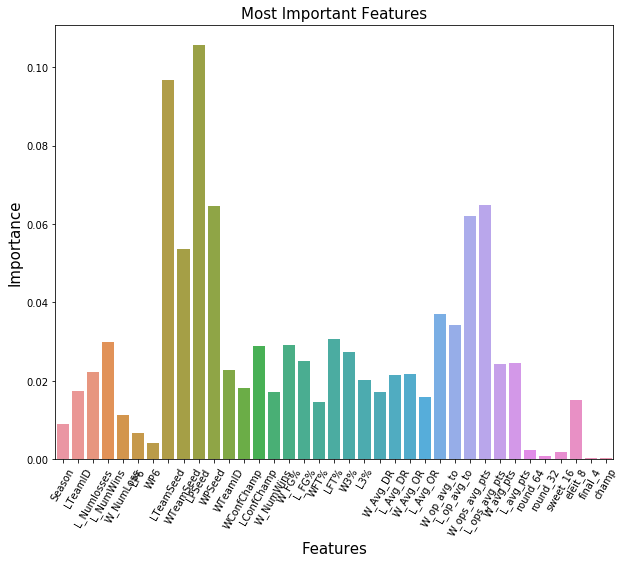

In [257]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=val.columns, y = gsv.best_estimator_.feature_importances_)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Importance', fontsize=15)
plt.xticks(rotation = 60)
plt.title('Most Important Features', fontsize=15)